In [33]:
a = [
    [
        0.1144791692495346,
        0.09479166567325592,
        0.15562500059604645,
        0.16333332657814026,
        0.1796875,
        0.19583334028720856,
        0.21125000715255737,
        0.22499999403953552,
        0.25562500953674316,
        0.32604166865348816,
        0.3518750071525574,
        0.3904166519641876,
        0.42906248569488525,
        0.4621874988079071,
        0.5238541960716248,
        0.5946875214576721,
        0.6371874809265137,
        0.6909375190734863,
        0.6896874904632568,
        0.70333331823349,
        0.7472916841506958,
        0.7559375166893005,
        0.7670833468437195,
        0.7681249976158142,
        0.7852083444595337,
        0.7884374856948853,
        0.7983333468437195,
        0.8073958158493042,
        0.8119791746139526,
        0.8198958039283752,
        0.8192708492279053,
        0.8216666579246521,
        0.8258333206176758,
        0.8335416913032532,
        0.8356249928474426,
        0.8380208611488342,
        0.8453124761581421,
        0.8463541865348816,
        0.8498958349227905,
        0.8525000214576721,
        0.8631250262260437,
        0.8631250262260437,
        0.8557291626930237,
        0.8637499809265137,
        0.8695833086967468,
        0.8770833611488342,
        0.8742708563804626,
        0.8637499809265137,
        0.8849999904632568,
        0.8847916722297668,
        0.8896874785423279,
        0.8831250071525574,
        0.8880208134651184,
        0.8943750262260437,
        0.887499988079071,
        0.9005208611488342,
        0.9012500047683716,
        0.8946874737739563,
        0.901354193687439,
        0.9011458158493042,
        0.9056249856948853,
        0.9092708230018616,
        0.9112499952316284,
        0.91427081823349,
        0.911145806312561,
        0.9192708134651184,
        0.9204166531562805,
        0.9168750047683716,
        0.8984375,
        0.9136458039283752,
        0.917187511920929,
        0.9241666793823242,
        0.92208331823349,
        0.9282291531562805,
        0.911145806312561,
        0.9235416650772095,
        0.9089583158493042,
        0.9316666722297668,
        0.9306250214576721,
        0.9308333396911621,
        0.9307291507720947,
        0.9282291531562805,
        0.92947918176651,
        0.9320833086967468,
        0.932604193687439,
        0.9386458396911621,
        0.9268749952316284,
        0.9293749928474426,
        0.9268749952316284,
        0.9379166960716248,
        0.9387500286102295,
        0.9410416483879089,
        0.9397916793823242,
        0.941979169845581,
        0.9445833563804626,
        0.9379166960716248,
        0.8105208277702332,
        0.885729193687439,
        0.9179166555404663,
        0.9232291579246521,
    ],
    [
        0.1144791692495346,
        0.08489583432674408,
        0.15416666865348816,
        0.16093750298023224,
        0.1756249964237213,
        0.19374999403953552,
        0.1990624964237213,
        0.24906249344348907,
        0.2211458384990692,
        0.3046875,
        0.2918750047683716,
        0.3659375011920929,
        0.39781248569488525,
        0.4801041781902313,
        0.5336458086967468,
        0.6002083420753479,
        0.6491666436195374,
        0.6865624785423279,
        0.6891666650772095,
        0.7311458587646484,
        0.7494791746139526,
        0.7612500190734863,
        0.7671874761581421,
        0.7734375,
        0.7733333110809326,
        0.7880208492279053,
        0.8041666746139526,
        0.8084375262260437,
        0.8106250166893005,
        0.8204166889190674,
        0.8178125023841858,
        0.8106250166893005,
        0.8287500143051147,
        0.8306249976158142,
        0.8332291841506958,
        0.8414583206176758,
        0.8229166865348816,
        0.8410416841506958,
        0.8387500047683716,
        0.8331249952316284,
        0.854479193687439,
        0.8505208492279053,
        0.8660416603088379,
        0.8612499833106995,
        0.8629166483879089,
        0.8717708587646484,
        0.8795833587646484,
        0.8829166889190674,
        0.8784375190734863,
        0.8851041793823242,
        0.8760416507720947,
        0.887291669845581,
        0.8947916626930237,
        0.8936458230018616,
        0.8949999809265137,
        0.9027083516120911,
        0.9035416841506958,
        0.9005208611488342,
        0.9037500023841858,
        0.8994791507720947,
        0.9014583230018616,
        0.9115625023841858,
        0.9056249856948853,
        0.9129166603088379,
        0.9168750047683716,
        0.9166666865348816,
        0.9195833206176758,
        0.92208331823349,
        0.9177083373069763,
        0.9194791913032532,
        0.9192708134651184,
        0.9207291603088379,
        0.9215624928474426,
        0.9282291531562805,
        0.9269791841506958,
        0.9205208420753479,
        0.9280208349227905,
        0.9270833134651184,
        0.9327083230018616,
        0.9322916865348816,
        0.9281250238418579,
        0.9353125095367432,
        0.9125000238418579,
        0.9355208277702332,
        0.93729168176651,
        0.9391666650772095,
        0.9368749856948853,
        0.8646875023841858,
        0.926354169845581,
        0.9380208253860474,
        0.9384375214576721,
        0.9392708539962769,
        0.9417708516120911,
        0.9428125023841858,
        0.9416666626930237,
        0.9441666603088379,
        0.8254166841506958,
        0.8897916674613953,
        0.9163541793823242,
        0.9280208349227905,
    ],
    [
        0.1144791692495346,
        0.08874999731779099,
        0.15583333373069763,
        0.15989583730697632,
        0.1929166615009308,
        0.1795833259820938,
        0.17874999344348907,
        0.19625000655651093,
        0.22833333909511566,
        0.22374999523162842,
        0.3109374940395355,
        0.3545833230018616,
        0.45239582657814026,
        0.4621874988079071,
        0.5479166507720947,
        0.6043750047683716,
        0.64041668176651,
        0.6810416579246521,
        0.6805208325386047,
        0.7235416769981384,
        0.7393749952316284,
        0.7446874976158142,
        0.7647916674613953,
        0.7828124761581421,
        0.7832291722297668,
        0.7998958230018616,
        0.793749988079071,
        0.809583306312561,
        0.8130208253860474,
        0.81270831823349,
        0.8248958587646484,
        0.8263541460037231,
        0.832604169845581,
        0.8348958492279053,
        0.8424999713897705,
        0.8495833277702332,
        0.8416666388511658,
        0.8551041483879089,
        0.8497916460037231,
        0.8527083396911621,
        0.8563541769981384,
        0.8666666746139526,
        0.8590624928474426,
        0.8606250286102295,
        0.8565624952316284,
        0.8773958086967468,
        0.877916693687439,
        0.871666669845581,
        0.87520831823349,
        0.879895806312561,
        0.8849999904632568,
        0.893541693687439,
        0.8886458277702332,
        0.8858333230018616,
        0.8976041674613953,
        0.8966666460037231,
        0.8948958516120911,
        0.9036458134651184,
        0.9057291746139526,
        0.9051041603088379,
        0.9133333563804626,
        0.90625,
        0.9110416769981384,
        0.9179166555404663,
        0.9181249737739563,
        0.9152083396911621,
        0.92208331823349,
        0.9197916388511658,
        0.9197916388511658,
        0.9147916436195374,
        0.9214583039283752,
        0.9241666793823242,
        0.3634375035762787,
        0.8708333373069763,
        0.9286458492279053,
        0.9322916865348816,
        0.9105208516120911,
        0.9309375286102295,
        0.9310416579246521,
        0.6493750214576721,
        0.8984375,
        0.9344791769981384,
        0.9331250190734863,
        0.9362499713897705,
        0.9312499761581421,
        0.9351041913032532,
        0.8817708492279053,
        0.9354166388511658,
        0.9271875023841858,
        0.9360416531562805,
        0.9361458420753479,
        0.9398958086967468,
        0.9415624737739563,
        0.9426041841506958,
        0.9325000047683716,
        0.1144791692495346,
        0.74239581823349,
        0.8631250262260437,
        0.9092708230018616,
        0.9234374761581421,
    ],
    [
        0.1144791692495346,
        0.10458333045244217,
        0.15802083909511566,
        0.1639583259820938,
        0.1795833259820938,
        0.17812499403953552,
        0.1926041692495346,
        0.18958333134651184,
        0.19374999403953552,
        0.27416667342185974,
        0.2798958420753479,
        0.3113541603088379,
        0.3855208456516266,
        0.4490624964237213,
        0.5522916913032532,
        0.6047916412353516,
        0.6364583373069763,
        0.6837499737739563,
        0.69510418176651,
        0.7212499976158142,
        0.7352083325386047,
        0.7519791722297668,
        0.7651041746139526,
        0.7747916579246521,
        0.7890625,
        0.7879166603088379,
        0.8054166436195374,
        0.7906249761581421,
        0.8083333373069763,
        0.8125,
        0.8195833563804626,
        0.8155208230018616,
        0.8292708396911621,
        0.8342708349227905,
        0.8223958611488342,
        0.8428124785423279,
        0.8084375262260437,
        0.8423958420753479,
        0.8424999713897705,
        0.8608333468437195,
        0.8115624785423279,
        0.8611458539962769,
        0.8652083277702332,
        0.8712499737739563,
        0.8523958325386047,
        0.862291693687439,
        0.8686458468437195,
        0.8792708516120911,
        0.8808333277702332,
        0.8795833587646484,
        0.8758333325386047,
        0.8778125047683716,
        0.8938541412353516,
        0.8967708349227905,
        0.8909375071525574,
        0.8901041746139526,
        0.8943750262260437,
        0.9052083492279053,
        0.885937511920929,
        0.8954166769981384,
        0.9001041650772095,
        0.9077083468437195,
        0.9052083492279053,
        0.9056249856948853,
        0.9058333039283752,
        0.9140625,
        0.9195833206176758,
        0.9134374856948853,
        0.9246875047683716,
        0.9108333587646484,
        0.9153125286102295,
        0.9214583039283752,
        0.9172916412353516,
        0.9237499833106995,
        0.9221875071525574,
        0.9303125143051147,
        0.9292708039283752,
        0.9295833110809326,
        0.9251041412353516,
        0.9333333373069763,
        0.9331250190734863,
        0.9318749904632568,
        0.92989581823349,
        0.9358333349227905,
        0.9378125071525574,
        0.9382291436195374,
        0.9378125071525574,
        0.9364583492279053,
        0.9096875190734863,
        0.9348958134651184,
        0.9347916841506958,
        0.9368749856948853,
        0.9436458349227905,
        0.9417708516120911,
        0.9370833039283752,
        0.9438541531562805,
        0.8294791579246521,
        0.8968750238418579,
        0.9192708134651184,
        0.9268749952316284,
    ],
    [
        0.1144791692495346,
        0.10729166865348816,
        0.16187499463558197,
        0.1691666692495346,
        0.1821874976158142,
        0.17812499403953552,
        0.19062499701976776,
        0.2254166603088379,
        0.21666666865348816,
        0.24427083134651184,
        0.2998958230018616,
        0.3361458480358124,
        0.4298958480358124,
        0.4911458194255829,
        0.5290625095367432,
        0.6120833158493042,
        0.6402083039283752,
        0.6803125143051147,
        0.706041693687439,
        0.7327083349227905,
        0.7415624856948853,
        0.7103124856948853,
        0.7632291913032532,
        0.7831249833106995,
        0.791979193687439,
        0.8020833134651184,
        0.8059375286102295,
        0.8056250214576721,
        0.8204166889190674,
        0.8066666722297668,
        0.7971875071525574,
        0.8304166793823242,
        0.8203125,
        0.8263541460037231,
        0.8371875286102295,
        0.8277083039283752,
        0.8108333349227905,
        0.8458333611488342,
        0.8405208587646484,
        0.8570833206176758,
        0.8607291579246521,
        0.8621875047683716,
        0.8634374737739563,
        0.8727083206176758,
        0.8417708277702332,
        0.87479168176651,
        0.8631250262260437,
        0.8776041865348816,
        0.8803125023841858,
        0.8835416436195374,
        0.8883333206176758,
        0.8790624737739563,
        0.8919791579246521,
        0.8773958086967468,
        0.8866666555404663,
        0.8984375,
        0.8969791531562805,
        0.8942708373069763,
        0.90604168176651,
        0.9009374976158142,
        0.9108333587646484,
        0.9024999737739563,
        0.9021875262260437,
        0.9143750071525574,
        0.9153125286102295,
        0.9089583158493042,
        0.9100000262260437,
        0.9165624976158142,
        0.9139583110809326,
        0.9037500023841858,
        0.9236458539962769,
        0.9259374737739563,
        0.9193750023841858,
        0.9227083325386047,
        0.9235416650772095,
        0.9269791841506958,
        0.88260418176651,
        0.9217708110809326,
        0.9308333396911621,
        0.9204166531562805,
        0.9302083253860474,
        0.6990625262260437,
        0.9040625095367432,
        0.9350000023841858,
        0.9108333587646484,
        0.9312499761581421,
        0.9359375238418579,
        0.9344791769981384,
        0.8823958039283752,
        0.9323958158493042,
        0.9366666674613953,
        0.8993750214576721,
        0.9276041388511658,
        0.9391666650772095,
        0.9288541674613953,
        0.9342708587646484,
        0.8347916603088379,
        0.8823958039283752,
        0.917395830154419,
        0.9280208349227905,
    ],
    [
        0.1144791692495346,
        0.09218750149011612,
        0.15166667103767395,
        0.18802084028720856,
        0.17802083492279053,
        0.2055208384990692,
        0.18791666626930237,
        0.2278124988079071,
        0.2641666531562805,
        0.3071874976158142,
        0.3072916567325592,
        0.3688541650772095,
        0.4164583384990692,
        0.4646874964237213,
        0.5177083611488342,
        0.6120833158493042,
        0.6444791555404663,
        0.6819791793823242,
        0.7057291865348816,
        0.7278125286102295,
        0.7323958277702332,
        0.7508333325386047,
        0.7604166865348816,
        0.7798958420753479,
        0.7822916507720947,
        0.7956249713897705,
        0.7959374785423279,
        0.8077083230018616,
        0.8149999976158142,
        0.7936458587646484,
        0.8286458253860474,
        0.8331249952316284,
        0.8228124976158142,
        0.8065624833106995,
        0.8405208587646484,
        0.8381249904632568,
        0.8476041555404663,
        0.8480208516120911,
        0.8492708206176758,
        0.8563541769981384,
        0.8469791412353516,
        0.8550000190734863,
        0.8635416626930237,
        0.8731250166893005,
        0.8492708206176758,
        0.8639583587646484,
        0.8579166531562805,
        0.87520831823349,
        0.8761458396911621,
        0.8836458325386047,
        0.87520831823349,
        0.8811458349227905,
        0.8909375071525574,
        0.8936458230018616,
        0.901354193687439,
        0.8995833396911621,
        0.9003124833106995,
        0.9004166722297668,
        0.9045833349227905,
        0.9086458086967468,
        0.9065625071525574,
        0.9054166674613953,
        0.9084374904632568,
        0.9140625,
        0.9141666889190674,
        0.9117708206176758,
        0.9144791960716248,
        0.9175000190734863,
        0.918958306312561,
        0.9211458563804626,
        0.9094791412353516,
        0.9181249737739563,
        0.9256250262260437,
        0.9302083253860474,
        0.9266666769981384,
        0.9273958206176758,
        0.9292708039283752,
        0.9342708587646484,
        0.932604193687439,
        0.9307291507720947,
        0.9244791865348816,
        0.9361458420753479,
        0.9357291460037231,
        0.9355208277702332,
        0.934583306312561,
        0.9371874928474426,
        0.9241666793823242,
        0.87479168176651,
        0.8384374976158142,
        0.9205208420753479,
        0.93770831823349,
        0.9409375190734863,
        0.9416666626930237,
        0.9416666626930237,
        0.9403125047683716,
        0.9458333253860474,
        0.8004166483879089,
        0.8940625190734863,
        0.9153125286102295,
        0.9288541674613953,
    ],
    [
        0.09875000268220901,
        0.10593750327825546,
        0.1587499976158142,
        0.1355208307504654,
        0.16885416209697723,
        0.18593749403953552,
        0.17937499284744263,
        0.22343750298023224,
        0.22343750298023224,
        0.22218750417232513,
        0.3043749928474426,
        0.3402083218097687,
        0.4129166603088379,
        0.4362500011920929,
        0.5317708253860474,
        0.5977083444595337,
        0.6308333277702332,
        0.676770806312561,
        0.7011458277702332,
        0.7217708230018616,
        0.7461458444595337,
        0.7570833563804626,
        0.770104169845581,
        0.7733333110809326,
        0.7866666913032532,
        0.7882291674613953,
        0.8089583516120911,
        0.7954166531562805,
        0.8077083230018616,
        0.815833330154419,
        0.8161458373069763,
        0.82010418176651,
        0.8271874785423279,
        0.8233333230018616,
        0.8355208039283752,
        0.8348958492279053,
        0.8424999713897705,
        0.8344791531562805,
        0.8494791388511658,
        0.8568750023841858,
        0.8522916436195374,
        0.8472916483879089,
        0.8339583277702332,
        0.8547916412353516,
        0.8722916841506958,
        0.8708333373069763,
        0.872083306312561,
        0.8792708516120911,
        0.8759375214576721,
        0.87479168176651,
        0.879895806312561,
        0.8910416960716248,
        0.893541693687439,
        0.8964583277702332,
        0.893958330154419,
        0.8930208086967468,
        0.9003124833106995,
        0.8999999761581421,
        0.9012500047683716,
        0.9003124833106995,
        0.8854166865348816,
        0.8961458206176758,
        0.90625,
        0.9088541865348816,
        0.9110416769981384,
        0.9162499904632568,
        0.9132291674613953,
        0.9214583039283752,
        0.9086458086967468,
        0.9125000238418579,
        0.9271875023841858,
        0.9238541722297668,
        0.926770806312561,
        0.9266666769981384,
        0.9233333468437195,
        0.925000011920929,
        0.9292708039283752,
        0.9309375286102295,
        0.9339583516120911,
        0.9310416579246521,
        0.9322916865348816,
        0.9344791769981384,
        0.9314583539962769,
        0.9356250166893005,
        0.9334375262260437,
        0.9385416507720947,
        0.9311458468437195,
        0.9305208325386047,
        0.9197916388511658,
        0.42927083373069763,
        0.9211458563804626,
        0.9369791746139526,
        0.9412500262260437,
        0.9255208373069763,
        0.9441666603088379,
        0.9460416436195374,
        0.8456249833106995,
        0.8938541412353516,
        0.9152083396911621,
        0.9277083277702332,
    ],
    [
        0.06468749791383743,
        0.09541666507720947,
        0.15666666626930237,
        0.16729167103767395,
        0.17614583671092987,
        0.17927083373069763,
        0.24385416507720947,
        0.2241666615009308,
        0.28322917222976685,
        0.2888541519641876,
        0.35624998807907104,
        0.3987500071525574,
        0.41364583373069763,
        0.4637500047683716,
        0.4989583194255829,
        0.5936458110809326,
        0.6402083039283752,
        0.691979169845581,
        0.6981250047683716,
        0.7228124737739563,
        0.7469791769981384,
        0.7139583230018616,
        0.7617708444595337,
        0.7778124809265137,
        0.7865625023841858,
        0.7847916483879089,
        0.7986458539962769,
        0.8066666722297668,
        0.8070833086967468,
        0.815625011920929,
        0.8291666507720947,
        0.7981250286102295,
        0.8183333277702332,
        0.8342708349227905,
        0.8302083611488342,
        0.8401041626930237,
        0.8454166650772095,
        0.8473958373069763,
        0.8336458206176758,
        0.8508333563804626,
        0.856458306312561,
        0.8637499809265137,
        0.863854169845581,
        0.8663541674613953,
        0.8528125286102295,
        0.8711458444595337,
        0.8590624928474426,
        0.8621875047683716,
        0.8816666603088379,
        0.8882291913032532,
        0.8812500238418579,
        0.8888541460037231,
        0.893750011920929,
        0.8849999904632568,
        0.8947916626930237,
        0.8824999928474426,
        0.895520806312561,
        0.9016666412353516,
        0.895104169845581,
        0.9061458110809326,
        0.8995833396911621,
        0.9115625023841858,
        0.9126041531562805,
        0.9105208516120911,
        0.917395830154419,
        0.918541669845581,
        0.9182291626930237,
        0.909583330154419,
        0.9211458563804626,
        0.917395830154419,
        0.9215624928474426,
        0.9243749976158142,
        0.9280208349227905,
        0.9270833134651184,
        0.9260416626930237,
        0.9304166436195374,
        0.926562488079071,
        0.8161458373069763,
        0.918958306312561,
        0.9116666913032532,
        0.9306250214576721,
        0.9311458468437195,
        0.934583306312561,
        0.9260416626930237,
        0.934583306312561,
        0.9370833039283752,
        0.9364583492279053,
        0.9361458420753479,
        0.9323958158493042,
        0.9360416531562805,
        0.9385416507720947,
        0.9381250143051147,
        0.9405208230018616,
        0.9415624737739563,
        0.9401041865348816,
        0.9435416460037231,
        0.8210416436195374,
        0.8967708349227905,
        0.9196875095367432,
        0.9286458492279053,
    ],
    [
        0.1144791692495346,
        0.0845833346247673,
        0.15343749523162842,
        0.17499999701976776,
        0.16333332657814026,
        0.19374999403953552,
        0.19437499344348907,
        0.23989583551883698,
        0.2737500071525574,
        0.31583333015441895,
        0.3264583349227905,
        0.3933333456516266,
        0.4091666638851166,
        0.4728125035762787,
        0.512291669845581,
        0.5694791674613953,
        0.643958330154419,
        0.6789583563804626,
        0.7055208086967468,
        0.7228124737739563,
        0.7367708086967468,
        0.7495833039283752,
        0.768541693687439,
        0.7755208611488342,
        0.7870833277702332,
        0.7908333539962769,
        0.7920833230018616,
        0.8114583492279053,
        0.8014583587646484,
        0.817187488079071,
        0.8203125,
        0.8198958039283752,
        0.8269791603088379,
        0.8254166841506958,
        0.8365625143051147,
        0.8451041579246521,
        0.8396875262260437,
        0.8537499904632568,
        0.8571875095367432,
        0.8527083396911621,
        0.8540624976158142,
        0.8646875023841858,
        0.8647916913032532,
        0.8700000047683716,
        0.8690624833106995,
        0.8776041865348816,
        0.8833333253860474,
        0.879687488079071,
        0.8847916722297668,
        0.8744791746139526,
        0.8865625262260437,
        0.8897916674613953,
        0.8948958516120911,
        0.8931249976158142,
        0.8992708325386047,
        0.8978124856948853,
        0.9011458158493042,
        0.9043750166893005,
        0.9081249833106995,
        0.90645831823349,
        0.9121875166893005,
        0.9123958349227905,
        0.90625,
        0.9094791412353516,
        0.9120833277702332,
        0.9131249785423279,
        0.9194791913032532,
        0.9242708086967468,
        0.9204166531562805,
        0.9227083325386047,
        0.9153125286102295,
        0.9198958277702332,
        0.9229166507720947,
        0.9260416626930237,
        0.9052083492279053,
        0.9258333444595337,
        0.9255208373069763,
        0.9300000071525574,
        0.9346874952316284,
        0.933020830154419,
        0.9338541626930237,
        0.9036458134651184,
        0.932604193687439,
        0.8672916889190674,
        0.9321874976158142,
        0.6397916674613953,
        0.8960416913032532,
        0.9336458444595337,
        0.8998958468437195,
        0.9346874952316284,
        0.9380208253860474,
        0.9394791722297668,
        0.9411458373069763,
        0.9433333277702332,
        0.9405208230018616,
        0.9439583420753479,
        0.8063541650772095,
        0.8849999904632568,
        0.9200000166893005,
        0.9228125214576721,
    ],
    [
        0.1144791692495346,
        0.0910416692495346,
        0.15281249582767487,
        0.18197916448116302,
        0.20010416209697723,
        0.18458333611488342,
        0.2134374976158142,
        0.2096875011920929,
        0.22708334028720856,
        0.2552083432674408,
        0.3151041567325592,
        0.3891666531562805,
        0.4090625047683716,
        0.46958333253860474,
        0.527916669845581,
        0.5910416841506958,
        0.6362500190734863,
        0.6902083158493042,
        0.6881250143051147,
        0.7133333086967468,
        0.7302083373069763,
        0.7594791650772095,
        0.7691666483879089,
        0.7752083539962769,
        0.7880208492279053,
        0.7753124833106995,
        0.7995833158493042,
        0.8104166388511658,
        0.7980208396911621,
        0.8114583492279053,
        0.8103125095367432,
        0.8235416412353516,
        0.8293750286102295,
        0.7998958230018616,
        0.8308333158493042,
        0.8426041603088379,
        0.84354168176651,
        0.8485416769981384,
        0.8433333039283752,
        0.8443750143051147,
        0.856041669845581,
        0.8635416626930237,
        0.8637499809265137,
        0.8713541626930237,
        0.8540624976158142,
        0.8643749952316284,
        0.870312511920929,
        0.8777083158493042,
        0.8797916769981384,
        0.8785416483879089,
        0.8914583325386047,
        0.863854169845581,
        0.8837500214576721,
        0.8987500071525574,
        0.8813541531562805,
        0.8973958492279053,
        0.8920833468437195,
        0.8991666436195374,
        0.8998958468437195,
        0.9094791412353516,
        0.902916669845581,
        0.901770830154419,
        0.9144791960716248,
        0.8961458206176758,
        0.9180208444595337,
        0.910729169845581,
        0.9168750047683716,
        0.9089583158493042,
        0.918749988079071,
        0.9164583086967468,
        0.9233333468437195,
        0.926770806312561,
        0.926354169845581,
        0.9255208373069763,
        0.9291666746139526,
        0.9156249761581421,
        0.9286458492279053,
        0.9281250238418579,
        0.9322916865348816,
        0.9340624809265137,
        0.9357291460037231,
        0.9295833110809326,
        0.9315624833106995,
        0.9337499737739563,
        0.90645831823349,
        0.9348958134651184,
        0.9295833110809326,
        0.9395833611488342,
        0.9119791388511658,
        0.9335416555404663,
        0.9365624785423279,
        0.9383333325386047,
        0.9386458396911621,
        0.9399999976158142,
        0.9438541531562805,
        0.9444791674613953,
        0.8500000238418579,
        0.89864581823349,
        0.9182291626930237,
        0.9264583587646484,
    ],
    [
        0.1144791692495346,
        0.08656249940395355,
        0.15697917342185974,
        0.1615625023841858,
        0.13375000655651093,
        0.1811458319425583,
        0.19312499463558197,
        0.21854166686534882,
        0.23781250417232513,
        0.25197917222976685,
        0.31833332777023315,
        0.3570833206176758,
        0.43947917222976685,
        0.4714583456516266,
        0.5456249713897705,
        0.5981249809265137,
        0.6346874833106995,
        0.6710416674613953,
        0.7143750190734863,
        0.7227083444595337,
        0.7321875095367432,
        0.7577083110809326,
        0.7637500166893005,
        0.7646874785423279,
        0.7912499904632568,
        0.7959374785423279,
        0.7996875047683716,
        0.7961458563804626,
        0.8053125143051147,
        0.807812511920929,
        0.82010418176651,
        0.8231250047683716,
        0.8319791555404663,
        0.8269791603088379,
        0.8309375047683716,
        0.8411458134651184,
        0.8414583206176758,
        0.8394791483879089,
        0.8440625071525574,
        0.8523958325386047,
        0.8628125190734863,
        0.8635416626930237,
        0.870520830154419,
        0.8648958206176758,
        0.8656250238418579,
        0.8679166436195374,
        0.8700000047683716,
        0.8742708563804626,
        0.8675000071525574,
        0.8745833039283752,
        0.8813541531562805,
        0.8892708420753479,
        0.8881250023841858,
        0.8931249976158142,
        0.8928124904632568,
        0.8985416889190674,
        0.9051041603088379,
        0.895104169845581,
        0.903333306312561,
        0.9007291793823242,
        0.9024999737739563,
        0.9045833349227905,
        0.9146875143051147,
        0.91385418176651,
        0.9140625,
        0.9110416769981384,
        0.9162499904632568,
        0.9227083325386047,
        0.8987500071525574,
        0.9217708110809326,
        0.9052083492279053,
        0.9235416650772095,
        0.9206249713897705,
        0.9268749952316284,
        0.9223958253860474,
        0.9237499833106995,
        0.9307291507720947,
        0.9158333539962769,
        0.9269791841506958,
        0.9283333420753479,
        0.8792708516120911,
        0.9270833134651184,
        0.9339583516120911,
        0.9005208611488342,
        0.9329166412353516,
        0.934583306312561,
        0.93729168176651,
        0.9387500286102295,
        0.9306250214576721,
        0.9383333325386047,
        0.9365624785423279,
        0.9336458444595337,
        0.9409375190734863,
        0.93729168176651,
        0.9385416507720947,
        0.9442708492279053,
        0.8270833492279053,
        0.893750011920929,
        0.9129166603088379,
        0.9242708086967468,
    ],
    [
        0.1144791692495346,
        0.10166666656732559,
        0.15208333730697632,
        0.17781250178813934,
        0.15791666507720947,
        0.1899999976158142,
        0.21020832657814026,
        0.2357291728258133,
        0.2136458307504654,
        0.3083333373069763,
        0.33406248688697815,
        0.3695833384990692,
        0.4261458218097687,
        0.4558333456516266,
        0.5215625166893005,
        0.5523958206176758,
        0.6519791483879089,
        0.6717708110809326,
        0.6973958611488342,
        0.7278125286102295,
        0.7400000095367432,
        0.75802081823349,
        0.7702083587646484,
        0.7670833468437195,
        0.791979193687439,
        0.7835416793823242,
        0.801562488079071,
        0.7934374809265137,
        0.8130208253860474,
        0.816979169845581,
        0.8059375286102295,
        0.8125,
        0.82833331823349,
        0.8318750262260437,
        0.8428124785423279,
        0.8352083563804626,
        0.8445833325386047,
        0.8483333587646484,
        0.83572918176651,
        0.8494791388511658,
        0.8583333492279053,
        0.8585416674613953,
        0.8417708277702332,
        0.8690624833106995,
        0.8730208277702332,
        0.8677083253860474,
        0.8500000238418579,
        0.8676041960716248,
        0.8630208373069763,
        0.8770833611488342,
        0.8895833492279053,
        0.8835416436195374,
        0.8916666507720947,
        0.885937511920929,
        0.8923958539962769,
        0.9006249904632568,
        0.9001041650772095,
        0.9055208563804626,
        0.8990625143051147,
        0.89822918176651,
        0.9106249809265137,
        0.9075000286102295,
        0.909166693687439,
        0.9125000238418579,
        0.90645831823349,
        0.910729169845581,
        0.9172916412353516,
        0.918958306312561,
        0.9194791913032532,
        0.910937488079071,
        0.916979193687439,
        0.9223958253860474,
        0.8477083444595337,
        0.9212499856948853,
        0.9210416674613953,
        0.9284374713897705,
        0.9290624856948853,
        0.9351041913032532,
        0.9287499785423279,
        0.9310416579246521,
        0.9325000047683716,
        0.9352083206176758,
        0.9241666793823242,
        0.9080208539962769,
        0.9353125095367432,
        0.9360416531562805,
        0.9370833039283752,
        0.9346874952316284,
        0.9316666722297668,
        0.9368749856948853,
        0.9370833039283752,
        0.9385416507720947,
        0.9350000023841858,
        0.9364583492279053,
        0.9417708516120911,
        0.9452083110809326,
        0.824999988079071,
        0.8938541412353516,
        0.9188541769981384,
        0.9271875023841858,
    ],
    [
        0.1144791692495346,
        0.09708333015441895,
        0.14760416746139526,
        0.1588541716337204,
        0.18031249940395355,
        0.21791666746139526,
        0.18552082777023315,
        0.22937500476837158,
        0.21572916209697723,
        0.32249999046325684,
        0.3487499952316284,
        0.3932291567325592,
        0.4386458396911621,
        0.4724999964237213,
        0.4925000071525574,
        0.6016666889190674,
        0.6458333134651184,
        0.6889583468437195,
        0.7057291865348816,
        0.7281249761581421,
        0.7458333373069763,
        0.7660416960716248,
        0.7596874833106995,
        0.768541693687439,
        0.792395830154419,
        0.7929166555404663,
        0.8066666722297668,
        0.8058333396911621,
        0.8177083134651184,
        0.81229168176651,
        0.8008333444595337,
        0.8235416412353516,
        0.8075000047683716,
        0.8366666436195374,
        0.8381249904632568,
        0.8445833325386047,
        0.8387500047683716,
        0.856249988079071,
        0.8334375023841858,
        0.85177081823349,
        0.8511458039283752,
        0.8461458086967468,
        0.8363541960716248,
        0.8655208349227905,
        0.8476041555404663,
        0.8729166388511658,
        0.8620833158493042,
        0.8801041841506958,
        0.8726041913032532,
        0.879479169845581,
        0.8903124928474426,
        0.8886458277702332,
        0.8854166865348816,
        0.8867708444595337,
        0.8888541460037231,
        0.8960416913032532,
        0.8972916603088379,
        0.8949999809265137,
        0.9039583206176758,
        0.9048958420753479,
        0.9066666960716248,
        0.9092708230018616,
        0.9115625023841858,
        0.910729169845581,
        0.9156249761581421,
        0.9146875143051147,
        0.9186458587646484,
        0.9143750071525574,
        0.91385418176651,
        0.9237499833106995,
        0.9237499833106995,
        0.9258333444595337,
        0.9286458492279053,
        0.9286458492279053,
        0.9295833110809326,
        0.9288541674613953,
        0.9264583587646484,
        0.9297916889190674,
        0.9318749904632568,
        0.9311458468437195,
        0.926562488079071,
        0.8321874737739563,
        0.9233333468437195,
        0.9365624785423279,
        0.934583306312561,
        0.9367708563804626,
        0.9115625023841858,
        0.3449999988079071,
        0.48510417342185974,
        0.9061458110809326,
        0.9313541650772095,
        0.9412500262260437,
        0.942187488079071,
        0.9415624737739563,
        0.9440624713897705,
        0.9442708492279053,
        0.7702083587646484,
        0.8764583468437195,
        0.9145833253860474,
        0.9245833158493042,
    ],
    [
        0.10052083432674408,
        0.0846875011920929,
        0.15666666626930237,
        0.15343749523162842,
        0.1678124964237213,
        0.18156249821186066,
        0.1979166716337204,
        0.22583332657814026,
        0.257708340883255,
        0.2750000059604645,
        0.30270832777023315,
        0.3708333373069763,
        0.3813541531562805,
        0.4387499988079071,
        0.5128124952316284,
        0.6090624928474426,
        0.6307291388511658,
        0.6863541603088379,
        0.7131249904632568,
        0.7323958277702332,
        0.7484375238418579,
        0.7528125047683716,
        0.7737500071525574,
        0.7809374928474426,
        0.7902083396911621,
        0.8004166483879089,
        0.7840625047683716,
        0.8096874952316284,
        0.8133333325386047,
        0.8181250095367432,
        0.8196874856948853,
        0.8288541436195374,
        0.8362500071525574,
        0.8064583539962769,
        0.8341666460037231,
        0.8319791555404663,
        0.825208306312561,
        0.8496875166893005,
        0.8539583086967468,
        0.8555208444595337,
        0.862708330154419,
        0.8653125166893005,
        0.8589583039283752,
        0.8743749856948853,
        0.8687499761581421,
        0.8654166460037231,
        0.879479169845581,
        0.8799999952316284,
        0.8873958587646484,
        0.8685416579246521,
        0.8540624976158142,
        0.8929166793823242,
        0.8952083587646484,
        0.8956249952316284,
        0.8952083587646484,
        0.9021875262260437,
        0.901562511920929,
        0.8998958468437195,
        0.9048958420753479,
        0.90625,
        0.9081249833106995,
        0.90604168176651,
        0.8977083563804626,
        0.9121875166893005,
        0.9162499904632568,
        0.9193750023841858,
        0.9180208444595337,
        0.9205208420753479,
        0.9188541769981384,
        0.918749988079071,
        0.7634375095367432,
        0.9201041460037231,
        0.9279166460037231,
        0.9288541674613953,
        0.9253125190734863,
        0.4050000011920929,
        0.8784375190734863,
        0.9039583206176758,
        0.9276041388511658,
        0.9316666722297668,
        0.9344791769981384,
        0.9332291483879089,
        0.5740625262260437,
        0.9101041555404663,
        0.9363541603088379,
        0.8961458206176758,
        0.9259374737739563,
        0.9360416531562805,
        0.9336458444595337,
        0.9356250166893005,
        0.9276041388511658,
        0.9396874904632568,
        0.9401041865348816,
        0.9402083158493042,
        0.8687499761581421,
        0.9399999976158142,
        0.7631250023841858,
        0.879895806312561,
        0.9128124713897705,
        0.9260416626930237,
    ],
    [
        0.1144791692495346,
        0.09364583343267441,
        0.13718749582767487,
        0.15395833551883698,
        0.17770832777023315,
        0.1927083283662796,
        0.20083333551883698,
        0.18666666746139526,
        0.22218750417232513,
        0.27031248807907104,
        0.2920833230018616,
        0.33645832538604736,
        0.4202083349227905,
        0.47197917103767395,
        0.5371875166893005,
        0.6068750023841858,
        0.6304166913032532,
        0.6807291507720947,
        0.6663541793823242,
        0.7015625238418579,
        0.7167708277702332,
        0.7589583396911621,
        0.7688541412353516,
        0.7684375047683716,
        0.7926041483879089,
        0.7882291674613953,
        0.801354169845581,
        0.81229168176651,
        0.792395830154419,
        0.8119791746139526,
        0.8159375190734863,
        0.8265625238418579,
        0.8305208086967468,
        0.8165624737739563,
        0.839062511920929,
        0.8421875238418579,
        0.8359375,
        0.8511458039283752,
        0.8409374952316284,
        0.8485416769981384,
        0.8523958325386047,
        0.8475000262260437,
        0.8637499809265137,
        0.8598958253860474,
        0.8700000047683716,
        0.8585416674613953,
        0.8598958253860474,
        0.8645833134651184,
        0.8738541603088379,
        0.8734375238418579,
        0.8771874904632568,
        0.887499988079071,
        0.8944791555404663,
        0.8905208110809326,
        0.8954166769981384,
        0.8748958110809326,
        0.9034374952316284,
        0.8971874713897705,
        0.8999999761581421,
        0.8957291841506958,
        0.9053124785423279,
        0.9061458110809326,
        0.9043750166893005,
        0.9090625047683716,
        0.9123958349227905,
        0.9162499904632568,
        0.917395830154419,
        0.9208333492279053,
        0.9182291626930237,
        0.9193750023841858,
        0.9097916483879089,
        0.926562488079071,
        0.9009374976158142,
        0.9248958230018616,
        0.918958306312561,
        0.9277083277702332,
        0.8288541436195374,
        0.9194791913032532,
        0.9256250262260437,
        0.5360416769981384,
        0.90625,
        0.9242708086967468,
        0.9348958134651184,
        0.934166669845581,
        0.9141666889190674,
        0.9340624809265137,
        0.9394791722297668,
        0.9375,
        0.9297916889190674,
        0.9348958134651184,
        0.9362499713897705,
        0.9418749809265137,
        0.9405208230018616,
        0.9394791722297668,
        0.9445833563804626,
        0.9456250071525574,
        0.1144791692495346,
        0.8856250047683716,
        0.9118750095367432,
        0.9254166483879089,
    ],
    [
        0.1144791692495346,
        0.08614583313465118,
        0.15520833432674408,
        0.16385416686534882,
        0.18020834028720856,
        0.15833333134651184,
        0.24166665971279144,
        0.22364583611488342,
        0.28208333253860474,
        0.3059374988079071,
        0.3660416603088379,
        0.3839583396911621,
        0.43791666626930237,
        0.4652083218097687,
        0.5369791388511658,
        0.5985416769981384,
        0.6373958587646484,
        0.6293749809265137,
        0.7085416913032532,
        0.7248958349227905,
        0.7519791722297668,
        0.7376041412353516,
        0.770104169845581,
        0.7818750143051147,
        0.7909374833106995,
        0.7931249737739563,
        0.7889583110809326,
        0.8132291436195374,
        0.8096874952316284,
        0.8110416531562805,
        0.8256250023841858,
        0.8194791674613953,
        0.8184375166893005,
        0.8220833539962769,
        0.8332291841506958,
        0.8382291793823242,
        0.8458333611488342,
        0.8453124761581421,
        0.8478124737739563,
        0.8485416769981384,
        0.8580208420753479,
        0.8668749928474426,
        0.8327083587646484,
        0.8713541626930237,
        0.8670833110809326,
        0.8698958158493042,
        0.875,
        0.8771874904632568,
        0.8690624833106995,
        0.8853124976158142,
        0.8687499761581421,
        0.8933333158493042,
        0.8791666626930237,
        0.8926041722297668,
        0.8969791531562805,
        0.8905208110809326,
        0.8907291889190674,
        0.8989583253860474,
        0.9018750190734863,
        0.9041666388511658,
        0.9071875214576721,
        0.9094791412353516,
        0.9144791960716248,
        0.9061458110809326,
        0.9131249785423279,
        0.9202083349227905,
        0.9133333563804626,
        0.9196875095367432,
        0.9120833277702332,
        0.9227083325386047,
        0.9188541769981384,
        0.9257291555404663,
        0.92208331823349,
        0.9193750023841858,
        0.9196875095367432,
        0.9282291531562805,
        0.9159374833106995,
        0.9306250214576721,
        0.9317708611488342,
        0.9346874952316284,
        0.9125000238418579,
        0.92989581823349,
        0.9352083206176758,
        0.9346874952316284,
        0.9353125095367432,
        0.9353125095367432,
        0.9362499713897705,
        0.9346874952316284,
        0.9237499833106995,
        0.9362499713897705,
        0.9378125071525574,
        0.9379166960716248,
        0.9410416483879089,
        0.9420833587646484,
        0.9409375190734863,
        0.9442708492279053,
        0.778333306312561,
        0.8943750262260437,
        0.9198958277702332,
        0.9293749928474426,
    ],
    [
        0.1144791692495346,
        0.08781249821186066,
        0.14687499403953552,
        0.1538541615009308,
        0.1795833259820938,
        0.18833333253860474,
        0.2057291716337204,
        0.23541666567325592,
        0.27666667103767395,
        0.2722916603088379,
        0.2933333218097687,
        0.40156251192092896,
        0.43791666626930237,
        0.4754166603088379,
        0.5328124761581421,
        0.6069791913032532,
        0.6545833349227905,
        0.6895833611488342,
        0.6857291460037231,
        0.7028124928474426,
        0.7289583086967468,
        0.7437499761581421,
        0.7696874737739563,
        0.7742708325386047,
        0.7850000262260437,
        0.8012499809265137,
        0.8020833134651184,
        0.7929166555404663,
        0.8146874904632568,
        0.8187500238418579,
        0.8213541507720947,
        0.8204166889190674,
        0.8153125047683716,
        0.8180208206176758,
        0.8332291841506958,
        0.8341666460037231,
        0.8457291722297668,
        0.828125,
        0.8541666865348816,
        0.8519791960716248,
        0.8633333444595337,
        0.8582291603088379,
        0.863854169845581,
        0.8577083349227905,
        0.8712499737739563,
        0.8685416579246521,
        0.8671875,
        0.8813541531562805,
        0.8663541674613953,
        0.8843749761581421,
        0.8797916769981384,
        0.8870833516120911,
        0.8823958039283752,
        0.8744791746139526,
        0.8851041793823242,
        0.8940625190734863,
        0.9020833373069763,
        0.9010416865348816,
        0.8988541960716248,
        0.9079166650772095,
        0.8996875286102295,
        0.909166693687439,
        0.9105208516120911,
        0.91385418176651,
        0.9118750095367432,
        0.9083333611488342,
        0.9154166579246521,
        0.918749988079071,
        0.9227083325386047,
        0.9170833230018616,
        0.9200000166893005,
        0.9239583611488342,
        0.9200000166893005,
        0.9284374713897705,
        0.9270833134651184,
        0.9295833110809326,
        0.9112499952316284,
        0.9270833134651184,
        0.9322916865348816,
        0.9320833086967468,
        0.9331250190734863,
        0.9323958158493042,
        0.9336458444595337,
        0.9323958158493042,
        0.9321874976158142,
        0.9344791769981384,
        0.7773958444595337,
        0.9209374785423279,
        0.9339583516120911,
        0.9354166388511658,
        0.9375,
        0.9391666650772095,
        0.9392708539962769,
        0.9390624761581421,
        0.9418749809265137,
        0.9443749785423279,
        0.8053125143051147,
        0.8885416388511658,
        0.9122916460037231,
        0.926562488079071,
    ],
    [
        0.09427083283662796,
        0.10052083432674408,
        0.1535416692495346,
        0.17125000059604645,
        0.19625000655651093,
        0.2044791728258133,
        0.19947916269302368,
        0.24802082777023315,
        0.2956250011920929,
        0.26374998688697815,
        0.31958332657814026,
        0.3984375,
        0.43041667342185974,
        0.4664583206176758,
        0.5367708206176758,
        0.6190624833106995,
        0.6495833396911621,
        0.6588541865348816,
        0.7070833444595337,
        0.7368749976158142,
        0.7465624809265137,
        0.739270806312561,
        0.7772916555404663,
        0.7760416865348816,
        0.7886458039283752,
        0.7902083396911621,
        0.8101041913032532,
        0.8032291531562805,
        0.8190624713897705,
        0.8140624761581421,
        0.8265625238418579,
        0.8219791650772095,
        0.831250011920929,
        0.8229166865348816,
        0.8384374976158142,
        0.8338541388511658,
        0.8313541412353516,
        0.8473958373069763,
        0.8257291913032532,
        0.8366666436195374,
        0.8587499856948853,
        0.8635416626930237,
        0.8618749976158142,
        0.8619791865348816,
        0.862291693687439,
        0.8725000023841858,
        0.8671875,
        0.871666669845581,
        0.8765624761581421,
        0.8811458349227905,
        0.8811458349227905,
        0.8746874928474426,
        0.8849999904632568,
        0.8909375071525574,
        0.8889583349227905,
        0.8837500214576721,
        0.8926041722297668,
        0.9041666388511658,
        0.8946874737739563,
        0.9004166722297668,
        0.903333306312561,
        0.9079166650772095,
        0.9021875262260437,
        0.9139583110809326,
        0.9080208539962769,
        0.9182291626930237,
        0.918958306312561,
        0.9184374809265137,
        0.9178125262260437,
        0.8948958516120911,
        0.6160416603088379,
        0.7887499928474426,
        0.8942708373069763,
        0.9260416626930237,
        0.9110416769981384,
        0.926562488079071,
        0.92947918176651,
        0.9271875023841858,
        0.9308333396911621,
        0.8306249976158142,
        0.6241666674613953,
        0.9213541746139526,
        0.9275000095367432,
        0.9336458444595337,
        0.9357291460037231,
        0.9383333325386047,
        0.8730208277702332,
        0.9238541722297668,
        0.9103124737739563,
        0.9351041913032532,
        0.9371874928474426,
        0.8978124856948853,
        0.9398958086967468,
        0.9399999976158142,
        0.9443749785423279,
        0.9443749785423279,
        0.8068749904632568,
        0.8879166841506958,
        0.911145806312561,
        0.9258333444595337,
    ],
    [
        0.1144791692495346,
        0.10270833224058151,
        0.15833333134651184,
        0.13083332777023315,
        0.20385417342185974,
        0.18031249940395355,
        0.2172916680574417,
        0.24927082657814026,
        0.22218750417232513,
        0.2849999964237213,
        0.34447917342185974,
        0.39781248569488525,
        0.40625,
        0.44749999046325684,
        0.53104168176651,
        0.6012499928474426,
        0.6561458110809326,
        0.6870833039283752,
        0.715833306312561,
        0.7302083373069763,
        0.7542708516120911,
        0.7597916722297668,
        0.7747916579246521,
        0.7682291865348816,
        0.785937488079071,
        0.7932291626930237,
        0.7816666960716248,
        0.8011458516120911,
        0.8073958158493042,
        0.8198958039283752,
        0.8181250095367432,
        0.8203125,
        0.8072916865348816,
        0.8065624833106995,
        0.8265625238418579,
        0.8448958396911621,
        0.8450000286102295,
        0.8505208492279053,
        0.840833306312561,
        0.8244791626930237,
        0.8533333539962769,
        0.8572916388511658,
        0.8641666769981384,
        0.8671875,
        0.8687499761581421,
        0.8753125071525574,
        0.8734375238418579,
        0.8786458373069763,
        0.862708330154419,
        0.8528125286102295,
        0.8695833086967468,
        0.8797916769981384,
        0.8894791603088379,
        0.8761458396911621,
        0.8842708468437195,
        0.8947916626930237,
        0.8974999785423279,
        0.9001041650772095,
        0.9036458134651184,
        0.8962500095367432,
        0.9012500047683716,
        0.9071875214576721,
        0.9148958325386047,
        0.9129166603088379,
        0.9162499904632568,
        0.9132291674613953,
        0.9126041531562805,
        0.9162499904632568,
        0.9192708134651184,
        0.9147916436195374,
        0.9184374809265137,
        0.9257291555404663,
        0.9241666793823242,
        0.9243749976158142,
        0.8256250023841858,
        0.9229166507720947,
        0.9317708611488342,
        0.9304166436195374,
        0.9338541626930237,
        0.9331250190734863,
        0.9347916841506958,
        0.9366666674613953,
        0.9316666722297668,
        0.9350000023841858,
        0.9359375238418579,
        0.9355208277702332,
        0.9316666722297668,
        0.9337499737739563,
        0.9153125286102295,
        0.9380208253860474,
        0.9363541603088379,
        0.940416693687439,
        0.9375,
        0.9420833587646484,
        0.9396874904632568,
        0.9465625286102295,
        0.8143749833106995,
        0.8920833468437195,
        0.9197916388511658,
        0.925000011920929,
    ],
    [
        0.13260416686534882,
        0.08062499761581421,
        0.1629166603088379,
        0.15656250715255737,
        0.15562500059604645,
        0.18666666746139526,
        0.1876041740179062,
        0.1966666728258133,
        0.26249998807907104,
        0.29510417580604553,
        0.28447917103767395,
        0.3998958468437195,
        0.4086458384990692,
        0.44999998807907104,
        0.5336458086967468,
        0.5866666436195374,
        0.629895806312561,
        0.6791666746139526,
        0.6949999928474426,
        0.7281249761581421,
        0.7488541603088379,
        0.7595833539962769,
        0.7587500214576721,
        0.770520806312561,
        0.7833333611488342,
        0.7881249785423279,
        0.7946875095367432,
        0.7943750023841858,
        0.8134375214576721,
        0.8027083277702332,
        0.8195833563804626,
        0.8172916769981384,
        0.8271874785423279,
        0.8211458325386047,
        0.8185416460037231,
        0.8053125143051147,
        0.8389583230018616,
        0.8462499976158142,
        0.8446875214576721,
        0.8539583086967468,
        0.8322916626930237,
        0.8611458539962769,
        0.8604166507720947,
        0.8485416769981384,
        0.8554166555404663,
        0.8695833086967468,
        0.8721874952316284,
        0.86739581823349,
        0.8558333516120911,
        0.8824999928474426,
        0.8814583420753479,
        0.8812500238418579,
        0.8907291889190674,
        0.8880208134651184,
        0.8880208134651184,
        0.88302081823349,
        0.901354193687439,
        0.9023958444595337,
        0.9030208587646484,
        0.9088541865348816,
        0.9042708277702332,
        0.9141666889190674,
        0.9125000238418579,
        0.9179166555404663,
        0.910729169845581,
        0.9191666841506958,
        0.9188541769981384,
        0.9167708158493042,
        0.9203125238418579,
        0.9056249856948853,
        0.9212499856948853,
        0.9240624904632568,
        0.9246875047683716,
        0.9280208349227905,
        0.9288541674613953,
        0.9285416603088379,
        0.9271875023841858,
        0.9315624833106995,
        0.9321874976158142,
        0.9359375238418579,
        0.895104169845581,
        0.9153125286102295,
        0.9278125166893005,
        0.9321874976158142,
        0.9365624785423279,
        0.9368749856948853,
        0.8690624833106995,
        0.926354169845581,
        0.9166666865348816,
        0.9352083206176758,
        0.934166669845581,
        0.9413541555404663,
        0.9391666650772095,
        0.9446874856948853,
        0.9435416460037231,
        0.9462500214576721,
        0.7948958277702332,
        0.8912500143051147,
        0.9196875095367432,
        0.9236458539962769,
    ],
]

In [34]:
b = [
    [
        13.960497856140137,
        5.489137649536133,
        2.6502726078033447,
        2.489346742630005,
        2.3612141609191895,
        2.285848617553711,
        2.222382068634033,
        2.162388801574707,
        2.110574722290039,
        2.0581178665161133,
        1.9734114408493042,
        1.9094531536102295,
        1.7624603509902954,
        1.5896687507629395,
        1.4053092002868652,
        1.239260196685791,
        1.0880584716796875,
        0.9738094210624695,
        0.9294130206108093,
        0.9410329461097717,
        0.7994449734687805,
        0.7525508403778076,
        0.7437695264816284,
        0.7066934108734131,
        0.6681284308433533,
        0.6533084511756897,
        0.6248624324798584,
        0.6063882112503052,
        0.5847182869911194,
        0.5724270343780518,
        0.5832968354225159,
        0.5729236602783203,
        0.5474717020988464,
        0.5209812521934509,
        0.5210241675376892,
        0.5092119574546814,
        0.503139078617096,
        0.48736414313316345,
        0.4666214883327484,
        0.4650285243988037,
        0.44371041655540466,
        0.44658955931663513,
        0.4732877016067505,
        0.4356265664100647,
        0.4232504069805145,
        0.39868852496147156,
        0.40856075286865234,
        0.4256807863712311,
        0.3734218180179596,
        0.3767069876194,
        0.3628007769584656,
        0.3753315210342407,
        0.3631315231323242,
        0.3483588695526123,
        0.36285990476608276,
        0.3271087408065796,
        0.32318589091300964,
        0.34047526121139526,
        0.3184346854686737,
        0.3211325407028198,
        0.3068441152572632,
        0.30348384380340576,
        0.29400306940078735,
        0.28363654017448425,
        0.29669618606567383,
        0.2769719064235687,
        0.2723004221916199,
        0.27285444736480713,
        0.3205696642398834,
        0.28810155391693115,
        0.27627694606781006,
        0.2564462423324585,
        0.2533840835094452,
        0.24862155318260193,
        0.289152055978775,
        0.26723435521125793,
        0.2942941188812256,
        0.23013938963413239,
        0.23362945020198822,
        0.22754985094070435,
        0.225576251745224,
        0.2445017248392105,
        0.22916336357593536,
        0.22840695083141327,
        0.22371816635131836,
        0.2048255354166031,
        0.2413850724697113,
        0.22974787652492523,
        0.24906796216964722,
        0.20863740146160126,
        0.2054748237133026,
        0.1956423968076706,
        0.19576911628246307,
        0.19154761731624603,
        0.18320278823375702,
        0.19311293959617615,
        0.6334996819496155,
        0.37138110399246216,
        0.27668365836143494,
        0.25145140290260315,
    ],
    [
        12.782479286193848,
        5.59225606918335,
        2.8788251876831055,
        2.480774402618408,
        2.3753294944763184,
        2.3279953002929688,
        2.2308921813964844,
        2.161750555038452,
        2.124936580657959,
        2.048438549041748,
        1.9921073913574219,
        1.9078809022903442,
        1.727151870727539,
        1.5735796689987183,
        1.375099539756775,
        1.2208685874938965,
        1.0912936925888062,
        0.9874676465988159,
        0.9590733051300049,
        0.8556115627288818,
        0.7841094732284546,
        0.7436608672142029,
        0.7172784805297852,
        0.7017980813980103,
        0.6818325519561768,
        0.6515907645225525,
        0.6221965551376343,
        0.6060571074485779,
        0.5891309380531311,
        0.567471444606781,
        0.5669577121734619,
        0.5744244456291199,
        0.538067102432251,
        0.534313976764679,
        0.5271439552307129,
        0.5018873810768127,
        0.5325738787651062,
        0.4993915855884552,
        0.5036664009094238,
        0.5295530557632446,
        0.45690077543258667,
        0.466973215341568,
        0.43458425998687744,
        0.4366637170314789,
        0.4425860643386841,
        0.4191884994506836,
        0.3958359658718109,
        0.3861556947231293,
        0.40078791975975037,
        0.3789201080799103,
        0.3992086350917816,
        0.37248560786247253,
        0.35311567783355713,
        0.3555687367916107,
        0.34774884581565857,
        0.32602885365486145,
        0.3304792642593384,
        0.3343617618083954,
        0.32143262028694153,
        0.33045071363449097,
        0.32303306460380554,
        0.29786741733551025,
        0.3150233328342438,
        0.29443320631980896,
        0.278526246547699,
        0.27863264083862305,
        0.28207430243492126,
        0.27424484491348267,
        0.28177809715270996,
        0.27625933289527893,
        0.26889148354530334,
        0.27675706148147583,
        0.25761309266090393,
        0.24183252453804016,
        0.2561141848564148,
        0.2612718939781189,
        0.23476780951023102,
        0.24079762399196625,
        0.22417938709259033,
        0.22232311964035034,
        0.23973755538463593,
        0.21628865599632263,
        0.29883456230163574,
        0.21766255795955658,
        0.21254675090312958,
        0.20393425226211548,
        0.20661720633506775,
        0.42495042085647583,
        0.2537005543708801,
        0.20958565175533295,
        0.20647311210632324,
        0.1992529034614563,
        0.1912725269794464,
        0.1863117665052414,
        0.1897980272769928,
        0.17960862815380096,
        0.6127679944038391,
        0.3659300208091736,
        0.28494006395339966,
        0.24763265252113342,
    ],
    [
        9.783035278320312,
        5.703727722167969,
        2.664975881576538,
        2.471017360687256,
        2.4446945190429688,
        2.3074398040771484,
        2.243790626525879,
        2.1737170219421387,
        2.113494396209717,
        2.1006054878234863,
        1.9789857864379883,
        1.873522162437439,
        1.7306386232376099,
        1.6025997400283813,
        1.3888450860977173,
        1.2199252843856812,
        1.0970427989959717,
        0.9899517893791199,
        0.9886568188667297,
        0.8598400950431824,
        0.8014304637908936,
        0.7928274273872375,
        0.7306371331214905,
        0.693073034286499,
        0.6726704835891724,
        0.6420862674713135,
        0.6380505561828613,
        0.5999811887741089,
        0.5853630900382996,
        0.5949811935424805,
        0.5545420050621033,
        0.5493940114974976,
        0.5251785516738892,
        0.5226184129714966,
        0.5008851289749146,
        0.49511831998825073,
        0.5007656812667847,
        0.47930049896240234,
        0.47524455189704895,
        0.4649140536785126,
        0.4610980153083801,
        0.4346679151058197,
        0.44401636719703674,
        0.43963995575904846,
        0.44746240973472595,
        0.39880961179733276,
        0.3988235592842102,
        0.4090973436832428,
        0.39929285645484924,
        0.3882465660572052,
        0.3734743893146515,
        0.3572157323360443,
        0.36553022265434265,
        0.373940110206604,
        0.3410893678665161,
        0.3431171178817749,
        0.3415030539035797,
        0.3219241201877594,
        0.3211049735546112,
        0.3132004737854004,
        0.30002638697624207,
        0.31174859404563904,
        0.3052183985710144,
        0.28275492787361145,
        0.28383997082710266,
        0.29032647609710693,
        0.2665388286113739,
        0.280804842710495,
        0.2732671797275543,
        0.2899356782436371,
        0.26445624232292175,
        0.25543829798698425,
        2.8748369216918945,
        0.4190685451030731,
        0.24062715470790863,
        0.2304295301437378,
        0.2902427017688751,
        0.23411034047603607,
        0.2295677214860916,
        1.2147902250289917,
        0.3311430811882019,
        0.2237309217453003,
        0.2252350151538849,
        0.2166852056980133,
        0.23128001391887665,
        0.21707913279533386,
        0.46587640047073364,
        0.21677640080451965,
        0.24133600294589996,
        0.21426846086978912,
        0.21903492510318756,
        0.19865615665912628,
        0.1928233653306961,
        0.1890365183353424,
        0.22132287919521332,
        11.85839557647705,
        0.8492239713668823,
        0.4773378372192383,
        0.3065309226512909,
        0.2598890960216522,
    ],
    [
        10.386019706726074,
        5.58686637878418,
        2.77956223487854,
        2.5114734172821045,
        2.3710179328918457,
        2.292027473449707,
        2.224853277206421,
        2.171262502670288,
        2.121781826019287,
        2.078805446624756,
        1.996527075767517,
        1.8909977674484253,
        1.7486543655395508,
        1.608123540878296,
        1.3752492666244507,
        1.2034229040145874,
        1.1169050931930542,
        0.9906011819839478,
        0.9367563724517822,
        0.8621829152107239,
        0.8060689568519592,
        0.8027551174163818,
        0.7307383418083191,
        0.6972671747207642,
        0.6677684783935547,
        0.6452340483665466,
        0.6142691373825073,
        0.6459007859230042,
        0.5925339460372925,
        0.5915958881378174,
        0.5710519552230835,
        0.5663577318191528,
        0.5345171093940735,
        0.5223678350448608,
        0.5431835651397705,
        0.4986928701400757,
        0.5702571868896484,
        0.4950639307498932,
        0.48519501090049744,
        0.4528404772281647,
        0.6029547452926636,
        0.4487343728542328,
        0.4336598813533783,
        0.41494107246398926,
        0.46953555941581726,
        0.4422691762447357,
        0.4231570065021515,
        0.39354488253593445,
        0.3922756314277649,
        0.3910236060619354,
        0.3980906009674072,
        0.3894508481025696,
        0.3565373420715332,
        0.3431699573993683,
        0.36163419485092163,
        0.35389187932014465,
        0.34645453095436096,
        0.3215445280075073,
        0.37073957920074463,
        0.3385608494281769,
        0.3315774202346802,
        0.3101833462715149,
        0.3188364803791046,
        0.3177856206893921,
        0.3080085515975952,
        0.28720518946647644,
        0.2665921449661255,
        0.289476215839386,
        0.25392600893974304,
        0.29432013630867004,
        0.29142752289772034,
        0.25503087043762207,
        0.2739299237728119,
        0.26031363010406494,
        0.27297380566596985,
        0.23954002559185028,
        0.2390344738960266,
        0.23669451475143433,
        0.2433900237083435,
        0.2208835929632187,
        0.22800229489803314,
        0.2287251353263855,
        0.23156756162643433,
        0.216044619679451,
        0.20968466997146606,
        0.20571164786815643,
        0.21449768543243408,
        0.20757238566875458,
        0.2981061041355133,
        0.21712496876716614,
        0.21200057864189148,
        0.20681145787239075,
        0.1894814372062683,
        0.18665871024131775,
        0.19974538683891296,
        0.18817415833473206,
        0.5984700918197632,
        0.3418163061141968,
        0.2792266011238098,
        0.2487022429704666,
    ],
    [
        9.455808639526367,
        5.891485691070557,
        2.8309948444366455,
        2.4748010635375977,
        2.375991106033325,
        2.301431179046631,
        2.24448823928833,
        2.17659854888916,
        2.117544651031494,
        2.0709068775177,
        1.9833351373672485,
        1.8695344924926758,
        1.7520809173583984,
        1.5661373138427734,
        1.3724690675735474,
        1.1982892751693726,
        1.1168081760406494,
        0.9949939250946045,
        0.9174107909202576,
        0.8829171657562256,
        0.8245748281478882,
        0.8907774090766907,
        0.7523631453514099,
        0.6917756795883179,
        0.6619497537612915,
        0.6320759654045105,
        0.6316640973091125,
        0.606148898601532,
        0.5849093794822693,
        0.6041150093078613,
        0.6173302531242371,
        0.5498843789100647,
        0.5664460062980652,
        0.555228590965271,
        0.5129972696304321,
        0.5501720905303955,
        0.5854939222335815,
        0.49742141366004944,
        0.5037128925323486,
        0.45965462923049927,
        0.4459504187107086,
        0.44188353419303894,
        0.4381557106971741,
        0.41561222076416016,
        0.5060587525367737,
        0.4102833867073059,
        0.4384942650794983,
        0.4031100571155548,
        0.38761183619499207,
        0.3887993395328522,
        0.36613404750823975,
        0.3983791470527649,
        0.36145472526550293,
        0.40154027938842773,
        0.38350093364715576,
        0.33355721831321716,
        0.3419286012649536,
        0.34941762685775757,
        0.31809887290000916,
        0.32568594813346863,
        0.3035951554775238,
        0.31069818139076233,
        0.3249201774597168,
        0.29269227385520935,
        0.28333088755607605,
        0.3031172752380371,
        0.2960030138492584,
        0.27877160906791687,
        0.28982558846473694,
        0.3080809414386749,
        0.25700515508651733,
        0.24855530261993408,
        0.2722441256046295,
        0.25180676579475403,
        0.2535153031349182,
        0.24369437992572784,
        0.3835182785987854,
        0.2660320997238159,
        0.2306704968214035,
        0.25990092754364014,
        0.23751115798950195,
        1.7408943176269531,
        0.32392337918281555,
        0.217709481716156,
        0.27708256244659424,
        0.2223079949617386,
        0.21062172949314117,
        0.22147122025489807,
        0.3764263093471527,
        0.22965459525585175,
        0.21468932926654816,
        0.32873857021331787,
        0.23344263434410095,
        0.19172200560569763,
        0.23473012447357178,
        0.20970940589904785,
        0.5450936555862427,
        0.3864395022392273,
        0.29103973507881165,
        0.24913594126701355,
    ],
    [
        19.24297332763672,
        5.566515922546387,
        2.861133337020874,
        2.533596992492676,
        2.4013922214508057,
        2.3648521900177,
        2.2485761642456055,
        2.170438766479492,
        2.1161036491394043,
        2.058810234069824,
        2.027440071105957,
        1.8825939893722534,
        1.745387315750122,
        1.583514928817749,
        1.4173883199691772,
        1.193963646888733,
        1.0770297050476074,
        0.9794851541519165,
        0.9157028198242188,
        0.8545664548873901,
        0.8109515309333801,
        0.7649737596511841,
        0.7346406579017639,
        0.692966639995575,
        0.6699694395065308,
        0.6369832158088684,
        0.6261605620384216,
        0.6001248955726624,
        0.587874174118042,
        0.6447166204452515,
        0.5520118474960327,
        0.5352084636688232,
        0.5491892695426941,
        0.5952481627464294,
        0.5105911493301392,
        0.5068678855895996,
        0.48320624232292175,
        0.4843960106372833,
        0.4775199294090271,
        0.45410996675491333,
        0.4752241373062134,
        0.4592665731906891,
        0.4412761926651001,
        0.41385677456855774,
        0.4797748327255249,
        0.43084609508514404,
        0.4428965747356415,
        0.39805588126182556,
        0.402176171541214,
        0.38145968317985535,
        0.4035702347755432,
        0.392498642206192,
        0.3578193783760071,
        0.3482553958892822,
        0.3401809632778168,
        0.33584973216056824,
        0.33719557523727417,
        0.3289227783679962,
        0.318046510219574,
        0.3050248622894287,
        0.30936798453330994,
        0.3114934265613556,
        0.3047812879085541,
        0.2967090904712677,
        0.28625646233558655,
        0.2967514395713806,
        0.2841338813304901,
        0.27824315428733826,
        0.2702791094779968,
        0.2722184658050537,
        0.3071068525314331,
        0.2774716317653656,
        0.2586618959903717,
        0.23790502548217773,
        0.24440963566303253,
        0.2488374263048172,
        0.237937793135643,
        0.22648951411247253,
        0.22394166886806488,
        0.2264014482498169,
        0.24689890444278717,
        0.2160782366991043,
        0.2165357768535614,
        0.21633540093898773,
        0.21888823807239532,
        0.21219131350517273,
        0.25235944986343384,
        0.4348437488079071,
        0.5609704852104187,
        0.2609723210334778,
        0.21052399277687073,
        0.1970011591911316,
        0.19289526343345642,
        0.19079497456550598,
        0.19879774749279022,
        0.17842480540275574,
        0.6634731292724609,
        0.35167843103408813,
        0.29261624813079834,
        0.24478015303611755,
    ],
    [
        10.094496726989746,
        5.564952373504639,
        3.632960319519043,
        2.670457363128662,
        2.412553310394287,
        2.3473408222198486,
        2.274449348449707,
        2.2096009254455566,
        2.1418297290802,
        2.0817325115203857,
        2.0089545249938965,
        1.9141520261764526,
        1.7769170999526978,
        1.6265084743499756,
        1.3932921886444092,
        1.2233766317367554,
        1.114240288734436,
        0.9889829754829407,
        0.929853618144989,
        0.8499855399131775,
        0.813896656036377,
        0.7691199779510498,
        0.7262431979179382,
        0.7008941769599915,
        0.6766765117645264,
        0.6706945896148682,
        0.6206871271133423,
        0.6183204650878906,
        0.591521680355072,
        0.584039568901062,
        0.5760725736618042,
        0.5585392117500305,
        0.5461174845695496,
        0.550507128238678,
        0.5205605030059814,
        0.5131895542144775,
        0.5007863640785217,
        0.5119839906692505,
        0.47621506452560425,
        0.4603004455566406,
        0.4685068130493164,
        0.48404547572135925,
        0.5103257298469543,
        0.45449575781822205,
        0.41658294200897217,
        0.4177219867706299,
        0.4147552251815796,
        0.38995790481567383,
        0.403117299079895,
        0.4055332541465759,
        0.39198753237724304,
        0.36072829365730286,
        0.36085477471351624,
        0.35116899013519287,
        0.3510037362575531,
        0.3588346838951111,
        0.33426809310913086,
        0.3355504870414734,
        0.325039803981781,
        0.33684805035591125,
        0.3642020523548126,
        0.3478078544139862,
        0.31155505776405334,
        0.3088069558143616,
        0.29975205659866333,
        0.28395363688468933,
        0.2925015389919281,
        0.2637883424758911,
        0.3075076639652252,
        0.29562538862228394,
        0.24699103832244873,
        0.2540409564971924,
        0.24497993290424347,
        0.24784144759178162,
        0.2509225010871887,
        0.2475043535232544,
        0.23284757137298584,
        0.23021399974822998,
        0.22302988171577454,
        0.22693076729774475,
        0.22830776870250702,
        0.2178676873445511,
        0.22571776807308197,
        0.21617069840431213,
        0.2178313136100769,
        0.20555344223976135,
        0.22272303700447083,
        0.2312702238559723,
        0.27075430750846863,
        3.339193105697632,
        0.2641175389289856,
        0.2033073902130127,
        0.1923850029706955,
        0.23818999528884888,
        0.1834549456834793,
        0.17745238542556763,
        0.5236812233924866,
        0.36293086409568787,
        0.29080504179000854,
        0.24910861253738403,
    ],
    [
        9.93862533569336,
        5.43356466293335,
        2.7530477046966553,
        2.4841039180755615,
        2.3881163597106934,
        2.3038864135742188,
        2.2255687713623047,
        2.168642282485962,
        2.109250783920288,
        2.0508744716644287,
        1.9799094200134277,
        1.8652266263961792,
        1.7431467771530151,
        1.6020523309707642,
        1.4329079389572144,
        1.22007417678833,
        1.0886296033859253,
        0.9787176251411438,
        0.9333398342132568,
        0.8521757125854492,
        0.7978330850601196,
        0.8851169943809509,
        0.7275099158287048,
        0.7162110805511475,
        0.6691855192184448,
        0.6535455584526062,
        0.6313797235488892,
        0.6027810573577881,
        0.5951967835426331,
        0.5752140283584595,
        0.558955729007721,
        0.6074889898300171,
        0.5612308979034424,
        0.5191170573234558,
        0.5362876653671265,
        0.5006288290023804,
        0.4951043128967285,
        0.49815988540649414,
        0.5187770128250122,
        0.4708055257797241,
        0.4653639793395996,
        0.4359690845012665,
        0.4344703257083893,
        0.43545302748680115,
        0.4575275182723999,
        0.41612061858177185,
        0.4462398290634155,
        0.4368766248226166,
        0.3861270248889923,
        0.3735024929046631,
        0.3848278522491455,
        0.369987428188324,
        0.35374709963798523,
        0.3737604320049286,
        0.347939133644104,
        0.3767302334308624,
        0.3462226390838623,
        0.33161461353302,
        0.34303295612335205,
        0.3125379681587219,
        0.3254760801792145,
        0.29464730620384216,
        0.2948499917984009,
        0.3000291585922241,
        0.2792915403842926,
        0.278128981590271,
        0.27626827359199524,
        0.2959314286708832,
        0.2842845022678375,
        0.2798294723033905,
        0.27076730132102966,
        0.2573390603065491,
        0.2431078404188156,
        0.24590113759040833,
        0.254642516374588,
        0.2357526421546936,
        0.24584704637527466,
        0.5844899415969849,
        0.26622602343559265,
        0.29161983728408813,
        0.24205660820007324,
        0.22718815505504608,
        0.22022581100463867,
        0.24381251633167267,
        0.2222842127084732,
        0.20862115919589996,
        0.21765431761741638,
        0.21265631914138794,
        0.23251742124557495,
        0.21340514719486237,
        0.2095397710800171,
        0.2094547152519226,
        0.19272543489933014,
        0.19251857697963715,
        0.19751428067684174,
        0.18103539943695068,
        0.5799267292022705,
        0.3506166636943817,
        0.2822813391685486,
        0.24867166578769684,
    ],
    [
        9.952640533447266,
        5.665810585021973,
        2.770465135574341,
        2.476309299468994,
        2.3639092445373535,
        2.289663076400757,
        2.225755453109741,
        2.1598269939422607,
        2.104261636734009,
        2.075655698776245,
        2.0018410682678223,
        1.880014419555664,
        1.7436684370040894,
        1.6000179052352905,
        1.451859712600708,
        1.2787655591964722,
        1.084540605545044,
        0.9911994338035583,
        0.9355058670043945,
        0.8521265387535095,
        0.8226588368415833,
        0.783968448638916,
        0.7301034927368164,
        0.6933225393295288,
        0.6680188179016113,
        0.6542008519172668,
        0.627971351146698,
        0.5989461541175842,
        0.623471736907959,
        0.5754681825637817,
        0.5613564848899841,
        0.56552654504776,
        0.5476484894752502,
        0.5496991872787476,
        0.5173385739326477,
        0.4920904040336609,
        0.4979061484336853,
        0.47545892000198364,
        0.459377646446228,
        0.46204397082328796,
        0.4623488485813141,
        0.43185287714004517,
        0.4372982680797577,
        0.421076238155365,
        0.4178577661514282,
        0.401278018951416,
        0.388617604970932,
        0.3894062936306,
        0.37906569242477417,
        0.4096807837486267,
        0.3739719092845917,
        0.36618539690971375,
        0.3482997417449951,
        0.3536946177482605,
        0.33612605929374695,
        0.3343315124511719,
        0.33220797777175903,
        0.32325589656829834,
        0.30863404273986816,
        0.3094030022621155,
        0.29602739214897156,
        0.2923618257045746,
        0.31802046298980713,
        0.2966459095478058,
        0.2955603003501892,
        0.2865813374519348,
        0.2740439474582672,
        0.2641214430332184,
        0.2678896188735962,
        0.2592898905277252,
        0.2820100784301758,
        0.2721211016178131,
        0.26526182889938354,
        0.2498967945575714,
        0.28898265957832336,
        0.2493191510438919,
        0.244571253657341,
        0.22925502061843872,
        0.22224560379981995,
        0.22083702683448792,
        0.22628776729106903,
        0.30528557300567627,
        0.22340181469917297,
        0.4019642770290375,
        0.23140914738178253,
        3.480377197265625,
        0.3354720175266266,
        0.21653693914413452,
        0.3215562403202057,
        0.2188713550567627,
        0.2081092894077301,
        0.19862791895866394,
        0.19164131581783295,
        0.18796001374721527,
        0.19764059782028198,
        0.18085530400276184,
        0.6342411637306213,
        0.3731934428215027,
        0.27965274453163147,
        0.252826452255249,
    ],
    [
        17.224672317504883,
        5.591038227081299,
        2.767706871032715,
        2.4797604084014893,
        2.39921236038208,
        2.3028364181518555,
        2.238913059234619,
        2.1644747257232666,
        2.1231863498687744,
        2.0620903968811035,
        1.977453589439392,
        1.8829671144485474,
        1.755052089691162,
        1.5927796363830566,
        1.404180645942688,
        1.2180609703063965,
        1.1058040857315063,
        0.9762266874313354,
        0.9519990086555481,
        0.8847509622573853,
        0.8473986387252808,
        0.7670232057571411,
        0.7350154519081116,
        0.6967865824699402,
        0.6683797836303711,
        0.671046257019043,
        0.6210572719573975,
        0.6067419648170471,
        0.6192129254341125,
        0.5869870185852051,
        0.5862206816673279,
        0.5520994663238525,
        0.5411878228187561,
        0.5947869420051575,
        0.5289781093597412,
        0.5067123174667358,
        0.4911922812461853,
        0.48325297236442566,
        0.48876529932022095,
        0.4840501844882965,
        0.4492221474647522,
        0.4356731176376343,
        0.433973491191864,
        0.41524437069892883,
        0.4700546860694885,
        0.4350886046886444,
        0.41367536783218384,
        0.3985775113105774,
        0.39139634370803833,
        0.38957449793815613,
        0.36236292123794556,
        0.4293859899044037,
        0.3748804032802582,
        0.3406010866165161,
        0.377096951007843,
        0.3382638394832611,
        0.3449455499649048,
        0.33544057607650757,
        0.3303688168525696,
        0.30698254704475403,
        0.3129434585571289,
        0.31908607482910156,
        0.2985954284667969,
        0.3510489761829376,
        0.28131887316703796,
        0.2904524803161621,
        0.2810051441192627,
        0.3021732270717621,
        0.2729122042655945,
        0.2770080268383026,
        0.2532443702220917,
        0.2510433793067932,
        0.24692527949810028,
        0.24577288329601288,
        0.24010248482227325,
        0.2828948199748993,
        0.2380487322807312,
        0.22979265451431274,
        0.22274208068847656,
        0.22068142890930176,
        0.21588821709156036,
        0.23011444509029388,
        0.22571136057376862,
        0.22434620559215546,
        0.30381715297698975,
        0.21883341670036316,
        0.22727671265602112,
        0.20283682644367218,
        0.2922952473163605,
        0.22322914004325867,
        0.21425999701023102,
        0.20143409073352814,
        0.1967058926820755,
        0.1949302703142166,
        0.18358731269836426,
        0.1805686056613922,
        0.5309920310974121,
        0.3323054611682892,
        0.2810971736907959,
        0.2448733001947403,
    ],
    [
        11.457371711730957,
        5.552180767059326,
        2.8356897830963135,
        2.4646003246307373,
        2.3879857063293457,
        2.2926366329193115,
        2.2330446243286133,
        2.1687395572662354,
        2.1161317825317383,
        2.0637505054473877,
        1.9634419679641724,
        1.87474524974823,
        1.7183947563171387,
        1.5629626512527466,
        1.3487857580184937,
        1.1953625679016113,
        1.0923911333084106,
        0.9901513457298279,
        0.8830608129501343,
        0.8407421112060547,
        0.822375476360321,
        0.7659685015678406,
        0.7479636669158936,
        0.7396531701087952,
        0.6650469899177551,
        0.6403734087944031,
        0.6215582489967346,
        0.6283057928085327,
        0.6102691888809204,
        0.6107538342475891,
        0.576574981212616,
        0.5431693196296692,
        0.5322828888893127,
        0.5549495220184326,
        0.5362229943275452,
        0.5152329802513123,
        0.49475574493408203,
        0.4977272152900696,
        0.491385817527771,
        0.4711533486843109,
        0.4433842897415161,
        0.4369383752346039,
        0.4244231879711151,
        0.4250655472278595,
        0.43007537722587585,
        0.41728389263153076,
        0.4216066002845764,
        0.39909130334854126,
        0.41575485467910767,
        0.4108123183250427,
        0.3781648874282837,
        0.36463692784309387,
        0.36240479350090027,
        0.3490694761276245,
        0.3534129559993744,
        0.3333286941051483,
        0.32583537697792053,
        0.3544963300228119,
        0.32269546389579773,
        0.31920361518859863,
        0.3166614770889282,
        0.30729416012763977,
        0.2891721725463867,
        0.2931688129901886,
        0.29358190298080444,
        0.2881453037261963,
        0.2747737467288971,
        0.2600093185901642,
        0.3423173427581787,
        0.26649191975593567,
        0.3162142038345337,
        0.25825488567352295,
        0.2671068012714386,
        0.24668334424495697,
        0.25948771834373474,
        0.2553998827934265,
        0.23490366339683533,
        0.2748042047023773,
        0.24421076476573944,
        0.23501594364643097,
        0.4240429699420929,
        0.24640263617038727,
        0.2158675342798233,
        0.32286861538887024,
        0.2199757844209671,
        0.20893190801143646,
        0.21192649006843567,
        0.2044883519411087,
        0.23219062387943268,
        0.20647920668125153,
        0.2159324437379837,
        0.2079959660768509,
        0.19308701157569885,
        0.20720425248146057,
        0.19908344745635986,
        0.18028974533081055,
        0.5828839540481567,
        0.3481007516384125,
        0.2922554910182953,
        0.24964630603790283,
    ],
    [
        13.205306053161621,
        5.767569065093994,
        2.6329541206359863,
        2.478816509246826,
        2.3763699531555176,
        2.303399085998535,
        2.2486536502838135,
        2.3373470306396484,
        2.1255342960357666,
        2.1240694522857666,
        1.9854453802108765,
        1.8694567680358887,
        1.7459012269973755,
        1.5919134616851807,
        1.3787492513656616,
        1.3246783018112183,
        1.0764195919036865,
        0.9979088306427002,
        0.928052544593811,
        0.8551284670829773,
        0.8212040066719055,
        0.7543421983718872,
        0.7192057967185974,
        0.7008734941482544,
        0.658501148223877,
        0.6579927802085876,
        0.6165152788162231,
        0.6324281692504883,
        0.598098874092102,
        0.5741941928863525,
        0.5931162238121033,
        0.5783414244651794,
        0.5381837487220764,
        0.525497555732727,
        0.5029295086860657,
        0.5160874128341675,
        0.4909811019897461,
        0.47604691982269287,
        0.5074551105499268,
        0.47029805183410645,
        0.45034709572792053,
        0.45103758573532104,
        0.4899981617927551,
        0.4247964024543762,
        0.4089994430541992,
        0.4240584075450897,
        0.4696052670478821,
        0.42368462681770325,
        0.4367167055606842,
        0.39904695749282837,
        0.3699984848499298,
        0.3743676543235779,
        0.3582547903060913,
        0.3678451180458069,
        0.352290540933609,
        0.327297568321228,
        0.3282230794429779,
        0.3159669041633606,
        0.32688450813293457,
        0.32373178005218506,
        0.30638575553894043,
        0.30370959639549255,
        0.3015277683734894,
        0.2908024787902832,
        0.3129878640174866,
        0.2941373288631439,
        0.28711748123168945,
        0.2762773633003235,
        0.2740420401096344,
        0.3041397035121918,
        0.27947965264320374,
        0.25350451469421387,
        0.4765609800815582,
        0.2616123557090759,
        0.2740936577320099,
        0.24257682263851166,
        0.23514708876609802,
        0.22687487304210663,
        0.23217499256134033,
        0.2239769548177719,
        0.22543233633041382,
        0.21915972232818604,
        0.24288465082645416,
        0.28943851590156555,
        0.21413511037826538,
        0.21257703006267548,
        0.20852172374725342,
        0.2146187573671341,
        0.22295443713665009,
        0.21027812361717224,
        0.20548763871192932,
        0.2038787454366684,
        0.20962165296077728,
        0.2010311484336853,
        0.18848161399364471,
        0.18107283115386963,
        0.5843736529350281,
        0.34488698840141296,
        0.2763383090496063,
        0.24350807070732117,
    ],
    [
        20.23689842224121,
        5.714903354644775,
        2.9009928703308105,
        2.495534658432007,
        2.3967885971069336,
        2.297158718109131,
        2.231926918029785,
        2.1653800010681152,
        2.127671003341675,
        2.04723858833313,
        1.9703567028045654,
        1.877095103263855,
        1.723692774772644,
        1.5972338914871216,
        1.437088966369629,
        1.2262259721755981,
        1.081608533859253,
        0.9783335328102112,
        0.9332859516143799,
        0.8609973192214966,
        0.7964675426483154,
        0.7510417103767395,
        0.7500908374786377,
        0.7128685712814331,
        0.6594638824462891,
        0.6469783186912537,
        0.6242483258247375,
        0.6142061352729797,
        0.5825048089027405,
        0.596196174621582,
        0.6085420846939087,
        0.5740347504615784,
        0.5726979374885559,
        0.5201795101165771,
        0.5168253183364868,
        0.495820015668869,
        0.5030798316001892,
        0.4783877432346344,
        0.5228740572929382,
        0.4718558192253113,
        0.47140035033226013,
        0.4781090319156647,
        0.517217755317688,
        0.4354599416255951,
        0.48231226205825806,
        0.4073644280433655,
        0.4341643750667572,
        0.3919869065284729,
        0.41332128643989563,
        0.39023956656455994,
        0.3674124479293823,
        0.36722105741500854,
        0.3711448013782501,
        0.37248075008392334,
        0.36295557022094727,
        0.34331679344177246,
        0.33114853501319885,
        0.3430356979370117,
        0.31713077425956726,
        0.3160555064678192,
        0.3139409124851227,
        0.3007952570915222,
        0.29592397809028625,
        0.296857625246048,
        0.2899205982685089,
        0.2888292372226715,
        0.2717423439025879,
        0.29043465852737427,
        0.29156294465065,
        0.2608851194381714,
        0.25827452540397644,
        0.2504919171333313,
        0.24550427496433258,
        0.24225959181785583,
        0.24323582649230957,
        0.24004414677619934,
        0.24599604308605194,
        0.2334737330675125,
        0.22798238694667816,
        0.22878092527389526,
        0.24606935679912567,
        0.5341660380363464,
        0.2509499490261078,
        0.2178366631269455,
        0.21220046281814575,
        0.21318167448043823,
        0.3058116137981415,
        4.688816547393799,
        1.963071346282959,
        0.3093665838241577,
        0.23129193484783173,
        0.19774006307125092,
        0.1930311769247055,
        0.19269713759422302,
        0.18427935242652893,
        0.17984002828598022,
        0.7658470273017883,
        0.4010118246078491,
        0.2935633957386017,
        0.2510856091976166,
    ],
    [
        12.16668701171875,
        5.688236236572266,
        2.8241829872131348,
        2.515280246734619,
        2.384359359741211,
        2.3103537559509277,
        2.225717067718506,
        2.17199969291687,
        2.117095470428467,
        2.0767672061920166,
        2.0440757274627686,
        1.8900489807128906,
        1.756496787071228,
        1.6035935878753662,
        1.4135078191757202,
        1.203560471534729,
        1.1200237274169922,
        0.9831063747406006,
        0.9117920994758606,
        0.8470034003257751,
        0.800990641117096,
        0.7638100981712341,
        0.7197217345237732,
        0.6884422302246094,
        0.6661590337753296,
        0.6361813545227051,
        0.676246702671051,
        0.6194794774055481,
        0.5862546563148499,
        0.5815839767456055,
        0.5724159479141235,
        0.5461855530738831,
        0.5302379131317139,
        0.5800687670707703,
        0.5242841839790344,
        0.5203787088394165,
        0.5446674823760986,
        0.4770360291004181,
        0.46876949071884155,
        0.4589231312274933,
        0.44567015767097473,
        0.43889760971069336,
        0.44900384545326233,
        0.4121003746986389,
        0.4279351234436035,
        0.4320351183414459,
        0.3976728916168213,
        0.3913947343826294,
        0.3772982060909271,
        0.42049089074134827,
        0.458417147397995,
        0.3604450821876526,
        0.35107290744781494,
        0.3492294251918793,
        0.34582844376564026,
        0.33859461545944214,
        0.3316481411457062,
        0.34364423155784607,
        0.3145603835582733,
        0.3170052468776703,
        0.31326329708099365,
        0.3173961341381073,
        0.33817318081855774,
        0.2941950559616089,
        0.2851411700248718,
        0.2747095823287964,
        0.28209564089775085,
        0.2764950394630432,
        0.27621039748191833,
        0.27698272466659546,
        0.8446317315101624,
        0.27163147926330566,
        0.24743656814098358,
        0.24071726202964783,
        0.2555678188800812,
        2.4312822818756104,
        0.4000087082386017,
        0.3233242332935333,
        0.25167012214660645,
        0.2276953160762787,
        0.22437195479869843,
        0.22746551036834717,
        1.7735849618911743,
        0.3245605528354645,
        0.21450477838516235,
        0.3490650951862335,
        0.2473314106464386,
        0.20443017780780792,
        0.22211217880249023,
        0.22310371696949005,
        0.2411404401063919,
        0.20169800519943237,
        0.1949722319841385,
        0.1974610537290573,
        0.49607476592063904,
        0.1985064148902893,
        0.7333413362503052,
        0.41120028495788574,
        0.2995206415653229,
        0.2562336027622223,
    ],
    [
        10.964035987854004,
        5.43269157409668,
        2.8595287799835205,
        2.4693617820739746,
        2.416247606277466,
        2.3194096088409424,
        2.232346534729004,
        2.2218828201293945,
        2.108455181121826,
        2.058053493499756,
        1.9918984174728394,
        1.8927254676818848,
        1.7561429738998413,
        1.5917108058929443,
        1.4146391153335571,
        1.201573133468628,
        1.1127711534500122,
        0.9837575554847717,
        0.99554443359375,
        0.9075478911399841,
        0.8380428552627563,
        0.7551724314689636,
        0.7203606963157654,
        0.7169225215911865,
        0.6616917848587036,
        0.6490545868873596,
        0.630095899105072,
        0.5997043251991272,
        0.6364433169364929,
        0.6007329225540161,
        0.5713372826576233,
        0.5455372929573059,
        0.5424512624740601,
        0.5722690224647522,
        0.5187512636184692,
        0.5013249516487122,
        0.5128707885742188,
        0.48181310296058655,
        0.5027936697006226,
        0.47898611426353455,
        0.4748080372810364,
        0.48165175318717957,
        0.4368061423301697,
        0.4482493996620178,
        0.41837257146835327,
        0.44243717193603516,
        0.4466685950756073,
        0.42184680700302124,
        0.4058876037597656,
        0.40109094977378845,
        0.39518770575523376,
        0.3685648441314697,
        0.3524174392223358,
        0.3617412745952606,
        0.3514499366283417,
        0.4014337360858917,
        0.3299619257450104,
        0.3359021842479706,
        0.33369702100753784,
        0.33301475644111633,
        0.3170585334300995,
        0.30025577545166016,
        0.3149305582046509,
        0.29735448956489563,
        0.29480215907096863,
        0.2770892083644867,
        0.27949556708335876,
        0.26995402574539185,
        0.2720107436180115,
        0.2869494557380676,
        0.3003956973552704,
        0.24943196773529053,
        0.33147525787353516,
        0.24732661247253418,
        0.2677391469478607,
        0.24736984074115753,
        0.52061927318573,
        0.27173691987991333,
        0.24398018419742584,
        1.4064698219299316,
        0.3095284700393677,
        0.25201424956321716,
        0.21812225878238678,
        0.21853294968605042,
        0.27462038397789,
        0.219681516289711,
        0.20779763162136078,
        0.2078871726989746,
        0.2323044091463089,
        0.2227640002965927,
        0.20927248895168304,
        0.19903232157230377,
        0.19580821692943573,
        0.19515927135944366,
        0.18488900363445282,
        0.17967037856578827,
        10.312003135681152,
        0.39347589015960693,
        0.29477477073669434,
        0.2575320303440094,
    ],
    [
        16.327346801757812,
        5.586102485656738,
        2.6966285705566406,
        2.4929897785186768,
        2.3710777759552,
        2.3314437866210938,
        2.2420880794525146,
        2.1762077808380127,
        2.1133873462677,
        2.054719924926758,
        1.9797927141189575,
        1.8765161037445068,
        1.7340525388717651,
        1.619121789932251,
        1.3994194269180298,
        1.2093292474746704,
        1.0895766019821167,
        1.1000096797943115,
        0.9111634492874146,
        0.8686785101890564,
        0.79314124584198,
        0.8102467656135559,
        0.7171344757080078,
        0.6861400604248047,
        0.6577015519142151,
        0.646497368812561,
        0.6419023871421814,
        0.6009534597396851,
        0.5955400466918945,
        0.5892655253410339,
        0.5526863932609558,
        0.5566123723983765,
        0.5614032745361328,
        0.5529845952987671,
        0.519935667514801,
        0.5009744167327881,
        0.49029067158699036,
        0.4863743185997009,
        0.4758511483669281,
        0.471427321434021,
        0.45140156149864197,
        0.4344714879989624,
        0.5271705389022827,
        0.41891008615493774,
        0.4263238310813904,
        0.41855335235595703,
        0.4022209942340851,
        0.39794865250587463,
        0.41159260272979736,
        0.3829283118247986,
        0.4166305661201477,
        0.36218884587287903,
        0.3866620659828186,
        0.3595300614833832,
        0.3349442481994629,
        0.3576071262359619,
        0.35508716106414795,
        0.3339376449584961,
        0.32548221945762634,
        0.321382075548172,
        0.30732300877571106,
        0.2951385974884033,
        0.2869231104850769,
        0.31011849641799927,
        0.28794369101524353,
        0.26822277903556824,
        0.29123184084892273,
        0.2660652995109558,
        0.2926974892616272,
        0.26066017150878906,
        0.25943973660469055,
        0.2560490369796753,
        0.27135488390922546,
        0.2684782147407532,
        0.2622538208961487,
        0.2421065717935562,
        0.2803117632865906,
        0.23241981863975525,
        0.2267322987318039,
        0.2179316133260727,
        0.2847581207752228,
        0.2324560582637787,
        0.21782097220420837,
        0.21805313229560852,
        0.2165091633796692,
        0.21235856413841248,
        0.21253575384616852,
        0.21589969098567963,
        0.24855804443359375,
        0.21737678349018097,
        0.2056463211774826,
        0.20454144477844238,
        0.19211463630199432,
        0.19138243794441223,
        0.19168499112129211,
        0.18003450334072113,
        0.7229692935943604,
        0.356356680393219,
        0.2741335928440094,
        0.24174398183822632,
    ],
    [
        13.82957649230957,
        5.631165981292725,
        2.819195032119751,
        2.498185873031616,
        2.3679256439208984,
        2.300264596939087,
        2.2293860912323,
        2.1555964946746826,
        2.1043879985809326,
        2.042086601257324,
        2.0115389823913574,
        1.8677059412002563,
        1.7358508110046387,
        1.5712559223175049,
        1.3724980354309082,
        1.2078317403793335,
        1.0694457292556763,
        0.9750822186470032,
        0.9756576418876648,
        0.9138360619544983,
        0.8430066108703613,
        0.837127149105072,
        0.7471995949745178,
        0.7029725909233093,
        0.6848499178886414,
        0.6346942782402039,
        0.6265729665756226,
        0.6198503971099854,
        0.5995754599571228,
        0.5694622993469238,
        0.5739863514900208,
        0.5642889738082886,
        0.6043627262115479,
        0.567198634147644,
        0.5228632092475891,
        0.5047730803489685,
        0.4897442162036896,
        0.5341567397117615,
        0.46839848160743713,
        0.4681161642074585,
        0.4417828321456909,
        0.4469142258167267,
        0.4301639795303345,
        0.45712748169898987,
        0.4156704246997833,
        0.41555055975914,
        0.41409581899642944,
        0.38558393716812134,
        0.4157944619655609,
        0.3782598078250885,
        0.3919852375984192,
        0.37654832005500793,
        0.3777804672718048,
        0.39303797483444214,
        0.3685929477214813,
        0.35088393092155457,
        0.3297465741634369,
        0.32562094926834106,
        0.32631856203079224,
        0.30798110365867615,
        0.33420294523239136,
        0.30651533603668213,
        0.30509546399116516,
        0.2975248098373413,
        0.2940252125263214,
        0.30551719665527344,
        0.29270684719085693,
        0.27278831601142883,
        0.26671549677848816,
        0.28186237812042236,
        0.27270376682281494,
        0.26224836707115173,
        0.2786804139614105,
        0.2507443428039551,
        0.24627281725406647,
        0.23942507803440094,
        0.28471842408180237,
        0.2490328997373581,
        0.23691821098327637,
        0.23085857927799225,
        0.23611974716186523,
        0.22307027876377106,
        0.22127650678157806,
        0.23040767014026642,
        0.23076769709587097,
        0.21950383484363556,
        0.6895473003387451,
        0.2637694180011749,
        0.22128576040267944,
        0.21697282791137695,
        0.21489694714546204,
        0.2012571394443512,
        0.2021443247795105,
        0.19910188019275665,
        0.19042173027992249,
        0.18485257029533386,
        0.6251435875892639,
        0.3639770448207855,
        0.2884039580821991,
        0.24360962212085724,
    ],
    [
        9.601147651672363,
        5.639749526977539,
        2.643413782119751,
        2.5918967723846436,
        2.389650344848633,
        2.2963736057281494,
        2.22723650932312,
        2.1655845642089844,
        2.1124885082244873,
        2.0653228759765625,
        2.011585235595703,
        1.8990918397903442,
        1.7387948036193848,
        1.5795844793319702,
        1.3677189350128174,
        1.180966854095459,
        1.0721358060836792,
        1.0250170230865479,
        0.9097671508789062,
        0.8453010320663452,
        0.8158608078956604,
        0.7968683838844299,
        0.7240061163902283,
        0.7025879621505737,
        0.6655519604682922,
        0.6650815606117249,
        0.6175680160522461,
        0.610844075679779,
        0.5862837433815002,
        0.5778262615203857,
        0.5683987140655518,
        0.5544147491455078,
        0.5321354866027832,
        0.5426495671272278,
        0.5301842093467712,
        0.5081133842468262,
        0.5309157967567444,
        0.4815787672996521,
        0.5507541298866272,
        0.512679398059845,
        0.4536078870296478,
        0.44231414794921875,
        0.4415649473667145,
        0.4498598277568817,
        0.45453745126724243,
        0.41202491521835327,
        0.42134174704551697,
        0.4070259928703308,
        0.3988325893878937,
        0.38524261116981506,
        0.3835783898830414,
        0.42076051235198975,
        0.3756102919578552,
        0.361942857503891,
        0.357643187046051,
        0.37810051441192627,
        0.3524059057235718,
        0.325318843126297,
        0.33893677592277527,
        0.33516210317611694,
        0.32859236001968384,
        0.30186712741851807,
        0.3357532024383545,
        0.2958627939224243,
        0.30162009596824646,
        0.28220444917678833,
        0.2736109793186188,
        0.27582111954689026,
        0.2784024775028229,
        0.3556697964668274,
        1.3685784339904785,
        0.6928789019584656,
        0.34540265798568726,
        0.24761100113391876,
        0.3096151649951935,
        0.25435882806777954,
        0.2347543090581894,
        0.24499964714050293,
        0.2339935302734375,
        0.6228557825088501,
        1.214106798171997,
        0.2796474099159241,
        0.23613281548023224,
        0.22563201189041138,
        0.219813734292984,
        0.20819851756095886,
        0.4080452024936676,
        0.246408611536026,
        0.28302451968193054,
        0.2162691205739975,
        0.2114046812057495,
        0.3153194487094879,
        0.20143868029117584,
        0.1928124874830246,
        0.18400387465953827,
        0.18294931948184967,
        0.6901914477348328,
        0.3831051290035248,
        0.29683294892311096,
        0.25274524092674255,
    ],
    [
        9.93258285522461,
        5.811013221740723,
        2.835409164428711,
        2.550149440765381,
        2.400559663772583,
        2.3058295249938965,
        2.241175889968872,
        2.1719748973846436,
        2.1149466037750244,
        2.0580596923828125,
        1.9766656160354614,
        1.8708522319793701,
        1.746344804763794,
        1.608207106590271,
        1.3891032934188843,
        1.2093485593795776,
        1.0630333423614502,
        0.9685618281364441,
        0.9029726386070251,
        0.8496131300926208,
        0.776883065700531,
        0.7568628787994385,
        0.7166392803192139,
        0.7083835601806641,
        0.6685683727264404,
        0.6449235081672668,
        0.6620121002197266,
        0.6121657490730286,
        0.6047400832176208,
        0.5704163908958435,
        0.5662243366241455,
        0.5636258125305176,
        0.5899879336357117,
        0.5740482807159424,
        0.536841630935669,
        0.4977511167526245,
        0.4901338815689087,
        0.4809693992137909,
        0.501945972442627,
        0.5307400822639465,
        0.46131211519241333,
        0.44885319471359253,
        0.43330901861190796,
        0.4257509112358093,
        0.41649433970451355,
        0.40711772441864014,
        0.4090439975261688,
        0.3935100734233856,
        0.44103509187698364,
        0.45039862394332886,
        0.4186037480831146,
        0.37893515825271606,
        0.36141490936279297,
        0.3857840597629547,
        0.3679300546646118,
        0.34207555651664734,
        0.33144089579582214,
        0.32566365599632263,
        0.31445565819740295,
        0.3379304111003876,
        0.3226020634174347,
        0.3069930374622345,
        0.2941575050354004,
        0.2876385748386383,
        0.29197514057159424,
        0.2874012291431427,
        0.2947295904159546,
        0.27953433990478516,
        0.27315381169319153,
        0.27910885214805603,
        0.278354287147522,
        0.2533392608165741,
        0.25149309635162354,
        0.24702270328998566,
        0.553565502166748,
        0.253249853849411,
        0.23540227115154266,
        0.22994905710220337,
        0.2220812290906906,
        0.2275460809469223,
        0.21661341190338135,
        0.21598027646541595,
        0.22591865062713623,
        0.21731358766555786,
        0.21229715645313263,
        0.21032807230949402,
        0.22969911992549896,
        0.22690805792808533,
        0.2763912081718445,
        0.20990034937858582,
        0.20533378422260284,
        0.19689512252807617,
        0.2014588862657547,
        0.19003458321094513,
        0.19485312700271606,
        0.1783563494682312,
        0.61015784740448,
        0.3531258702278137,
        0.28123244643211365,
        0.2493642121553421,
    ],
    [
        10.950902938842773,
        5.402641773223877,
        2.766244411468506,
        2.4817426204681396,
        2.385866641998291,
        2.3203799724578857,
        2.251917600631714,
        2.179478645324707,
        2.1324665546417236,
        2.047222137451172,
        2.034015417098999,
        1.8748610019683838,
        1.7554062604904175,
        1.6246341466903687,
        1.400058388710022,
        1.2248905897140503,
        1.1064547300338745,
        0.9936699271202087,
        0.9733149409294128,
        0.8521165251731873,
        0.7885498404502869,
        0.7616909742355347,
        0.7377943992614746,
        0.706787645816803,
        0.6812897324562073,
        0.6468726992607117,
        0.6300832629203796,
        0.6227068901062012,
        0.5898131728172302,
        0.6027780175209045,
        0.5704525709152222,
        0.5712247490882874,
        0.540530264377594,
        0.5431910157203674,
        0.5503385066986084,
        0.5961874127388,
        0.5004175305366516,
        0.49356433749198914,
        0.49144262075424194,
        0.4668172597885132,
        0.52073073387146,
        0.44491490721702576,
        0.43983495235443115,
        0.47182226181030273,
        0.460366427898407,
        0.4153314232826233,
        0.4120873212814331,
        0.42153969407081604,
        0.46776866912841797,
        0.37947380542755127,
        0.38924264907836914,
        0.3800981044769287,
        0.3578159511089325,
        0.3668847382068634,
        0.3699468672275543,
        0.3817306458950043,
        0.3284691274166107,
        0.32700851559638977,
        0.3194848299026489,
        0.30466535687446594,
        0.31957629323005676,
        0.2958124577999115,
        0.29911667108535767,
        0.28477129340171814,
        0.30654701590538025,
        0.2725857198238373,
        0.278780072927475,
        0.28833022713661194,
        0.2740086317062378,
        0.3120657205581665,
        0.25244641304016113,
        0.2533714175224304,
        0.25444895029067993,
        0.2422996312379837,
        0.23975548148155212,
        0.23950274288654327,
        0.24623069167137146,
        0.22789421677589417,
        0.22659826278686523,
        0.2140980213880539,
        0.365931898355484,
        0.27508506178855896,
        0.2390684187412262,
        0.22532884776592255,
        0.21026355028152466,
        0.207604318857193,
        0.46650269627571106,
        0.240933358669281,
        0.2709956765174866,
        0.21697962284088135,
        0.2192632257938385,
        0.1963633894920349,
        0.1963709443807602,
        0.18447345495224,
        0.18264269828796387,
        0.17727136611938477,
        0.6661971807479858,
        0.3590151071548462,
        0.2749556005001068,
        0.25337424874305725,
    ],
]

In [35]:
c = [
    [
        0.09875000268220901,
        0.1067708358168602,
        0.10177083313465118,
        0.07781250029802322,
        0.2019791603088379,
        0.35739582777023315,
        0.4567708373069763,
        0.5917708277702332,
        0.7055208086967468,
        0.7239583134651184,
        0.7710416913032532,
        0.7792708277702332,
        0.8105208277702332,
        0.8115624785423279,
        0.8034374713897705,
        0.8222916722297668,
        0.8334375023841858,
        0.8367708325386047,
        0.8429166674613953,
        0.8144791722297668,
        0.8590624928474426,
        0.7834374904632568,
        0.8519791960716248,
        0.8708333373069763,
        0.8807291388511658,
        0.8793749809265137,
        0.8865625262260437,
        0.8790624737739563,
        0.886145830154419,
        0.8911458253860474,
        0.8946874737739563,
        0.8985416889190674,
        0.8992708325386047,
        0.9047916531562805,
        0.9048958420753479,
        0.909166693687439,
        0.9112499952316284,
        0.9104166626930237,
        0.9105208516120911,
        0.910937488079071,
        0.9210416674613953,
        0.9190624952316284,
        0.92166668176651,
        0.7813541889190674,
        0.9164583086967468,
        0.9225000143051147,
        0.9277083277702332,
        0.9057291746139526,
        0.9207291603088379,
        0.9304166436195374,
        0.9329166412353516,
        0.9308333396911621,
        0.9041666388511658,
        0.9315624833106995,
        0.9354166388511658,
        0.9347916841506958,
        0.9307291507720947,
        0.8596875071525574,
        0.916979193687439,
        0.9300000071525574,
        0.9334375262260437,
        0.9369791746139526,
        0.9443749785423279,
        0.9386458396911621,
        0.9348958134651184,
        0.9366666674613953,
        0.9417708516120911,
        0.9321874976158142,
        0.9391666650772095,
        0.948437511920929,
        0.9548958539962769,
        0.9527083039283752,
        0.9566666483879089,
        0.9546874761581421,
        0.9572916626930237,
        0.9547916650772095,
        0.9596874713897705,
        0.956250011920929,
        0.9610416889190674,
        0.9598958492279053,
        0.9620833396911621,
        0.9622916579246521,
        0.9591666460037231,
        0.9636458158493042,
        0.9649999737739563,
        0.9635416865348816,
        0.9657291769981384,
        0.9646875262260437,
        0.9666666388511658,
        0.9672916531562805,
        0.9672916531562805,
        0.9668750166893005,
        0.9655208587646484,
        0.9707291722297668,
        0.9664583206176758,
        0.9692708253860474,
        0.31072917580604553,
        0.4755208194255829,
        0.5493749976158142,
        0.67208331823349,
    ],
    [
        0.05739583447575569,
        0.09656249731779099,
        0.10197916626930237,
        0.10062500089406967,
        0.14489583671092987,
        0.33687499165534973,
        0.5351041555404663,
        0.6360416412353516,
        0.7293750047683716,
        0.7494791746139526,
        0.7612500190734863,
        0.7748958468437195,
        0.7983333468437195,
        0.8183333277702332,
        0.7778124809265137,
        0.8202083110809326,
        0.8287500143051147,
        0.8355208039283752,
        0.8450000286102295,
        0.8558333516120911,
        0.8536458611488342,
        0.8691666722297668,
        0.8590624928474426,
        0.8759375214576721,
        0.871874988079071,
        0.8695833086967468,
        0.8852083086967468,
        0.8680208325386047,
        0.8870833516120911,
        0.8919791579246521,
        0.8980208039283752,
        0.8997916579246521,
        0.8960416913032532,
        0.8895833492279053,
        0.9059374928474426,
        0.9116666913032532,
        0.9084374904632568,
        0.9101041555404663,
        0.9076041579246521,
        0.9022916555404663,
        0.9078124761581421,
        0.9102083444595337,
        0.9203125238418579,
        0.918749988079071,
        0.921875,
        0.9222916960716248,
        0.9289583563804626,
        0.9253125190734863,
        0.9231250286102295,
        0.9227083325386047,
        0.9248958230018616,
        0.9316666722297668,
        0.9304166436195374,
        0.9335416555404663,
        0.9386458396911621,
        0.9364583492279053,
        0.9327083230018616,
        0.8734375238418579,
        0.7514583468437195,
        0.9201041460037231,
        0.9279166460037231,
        0.9351041913032532,
        0.9439583420753479,
        0.940625011920929,
        0.9346874952316284,
        0.9356250166893005,
        0.9428125023841858,
        0.9350000023841858,
        0.9443749785423279,
        0.9501041769981384,
        0.9516666531562805,
        0.9530208110809326,
        0.9538541436195374,
        0.9537500143051147,
        0.9573958516120911,
        0.9538541436195374,
        0.9571874737739563,
        0.9554166793823242,
        0.9579166769981384,
        0.9591666460037231,
        0.9601041674613953,
        0.9595833420753479,
        0.9614583253860474,
        0.9629166722297668,
        0.9626041650772095,
        0.9627083539962769,
        0.964062511920929,
        0.9635416865348816,
        0.964270830154419,
        0.9593750238418579,
        0.9652083516120911,
        0.964062511920929,
        0.9655208587646484,
        0.9674999713897705,
        0.9672916531562805,
        0.965833306312561,
        0.3279166519641876,
        0.4439583420753479,
        0.5362499952316284,
        0.6847916841506958,
    ],
    [
        0.09875000268220901,
        0.11177083104848862,
        0.10489583015441895,
        0.11531250178813934,
        0.20218749344348907,
        0.38593751192092896,
        0.5375000238418579,
        0.660729169845581,
        0.7226041555404663,
        0.7542708516120911,
        0.6409375071525574,
        0.7878124713897705,
        0.8079166412353516,
        0.8177083134651184,
        0.8211458325386047,
        0.8128125071525574,
        0.8360416889190674,
        0.8465625047683716,
        0.8440625071525574,
        0.8547916412353516,
        0.8611458539962769,
        0.8650000095367432,
        0.8396875262260437,
        0.8667708039283752,
        0.8753125071525574,
        0.8812500238418579,
        0.8856250047683716,
        0.8856250047683716,
        0.8862500190734863,
        0.89083331823349,
        0.893750011920929,
        0.8911458253860474,
        0.9004166722297668,
        0.9012500047683716,
        0.8941666483879089,
        0.9012500047683716,
        0.9075000286102295,
        0.9021875262260437,
        0.9072916507720947,
        0.8973958492279053,
        0.9092708230018616,
        0.9154166579246521,
        0.9177083373069763,
        0.9153125286102295,
        0.9206249713897705,
        0.9238541722297668,
        0.917395830154419,
        0.9226041436195374,
        0.9241666793823242,
        0.6996874809265137,
        0.9209374785423279,
        0.9311458468437195,
        0.9316666722297668,
        0.9340624809265137,
        0.9363541603088379,
        0.9369791746139526,
        0.9329166412353516,
        0.8580208420753479,
        0.9057291746139526,
        0.9246875047683716,
        0.9258333444595337,
        0.9390624761581421,
        0.9378125071525574,
        0.9365624785423279,
        0.93770831823349,
        0.9403125047683716,
        0.9415624737739563,
        0.93729168176651,
        0.9469791650772095,
        0.949791669845581,
        0.9468749761581421,
        0.9506250023841858,
        0.9559375047683716,
        0.9547916650772095,
        0.9551041722297668,
        0.9540625214576721,
        0.9561458230018616,
        0.9548958539962769,
        0.33645832538604736,
        0.9493749737739563,
        0.9626041650772095,
        0.9602083563804626,
        0.965416669845581,
        0.9619791507720947,
        0.9641666412353516,
        0.9652083516120911,
        0.9619791507720947,
        0.9671875238418579,
        0.9648958444595337,
        0.96895831823349,
        0.9521874785423279,
        0.9676041603088379,
        0.9671875238418579,
        0.96875,
        0.9693750143051147,
        0.9706249833106995,
        0.3063541650772095,
        0.44468748569488525,
        0.5613541603088379,
        0.6958333253860474,
    ],
    [
        0.1003125011920929,
        0.078125,
        0.10499999672174454,
        0.1145833358168602,
        0.1860416680574417,
        0.3948958218097687,
        0.5368750095367432,
        0.6656249761581421,
        0.7121875286102295,
        0.7582291960716248,
        0.7718750238418579,
        0.7891666889190674,
        0.809166669845581,
        0.8181250095367432,
        0.8160416483879089,
        0.8263541460037231,
        0.8296874761581421,
        0.7472916841506958,
        0.8434374928474426,
        0.8606250286102295,
        0.8628125190734863,
        0.8675000071525574,
        0.8683333396911621,
        0.8755208253860474,
        0.8818749785423279,
        0.8812500238418579,
        0.8792708516120911,
        0.8842708468437195,
        0.8902083039283752,
        0.862291693687439,
        0.8842708468437195,
        0.9003124833106995,
        0.8990625143051147,
        0.895312488079071,
        0.8987500071525574,
        0.9030208587646484,
        0.9005208611488342,
        0.9077083468437195,
        0.8984375,
        0.9133333563804626,
        0.9175000190734863,
        0.918958306312561,
        0.9163541793823242,
        0.92208331823349,
        0.9168750047683716,
        0.9254166483879089,
        0.9270833134651184,
        0.9260416626930237,
        0.9255208373069763,
        0.9215624928474426,
        0.9295833110809326,
        0.9364583492279053,
        0.9344791769981384,
        0.9303125143051147,
        0.9364583492279053,
        0.9287499785423279,
        0.9289583563804626,
        0.8717708587646484,
        0.9131249785423279,
        0.9238541722297668,
        0.9362499713897705,
        0.9348958134651184,
        0.9387500286102295,
        0.94510418176651,
        0.9335416555404663,
        0.9351041913032532,
        0.9467708468437195,
        0.9376041889190674,
        0.942395806312561,
        0.9514583349227905,
        0.9492708444595337,
        0.9503124952316284,
        0.9548958539962769,
        0.9552083611488342,
        0.9547916650772095,
        0.9495833516120911,
        0.9555208086967468,
        0.9603124856948853,
        0.9597916603088379,
        0.9573958516120911,
        0.9582291841506958,
        0.9593750238418579,
        0.9593750238418579,
        0.9586458206176758,
        0.964270830154419,
        0.9595833420753479,
        0.9629166722297668,
        0.9629166722297668,
        0.9653124809265137,
        0.9613541960716248,
        0.9662500023841858,
        0.965833306312561,
        0.9691666960716248,
        0.9680208563804626,
        0.9643750190734863,
        0.9667708277702332,
        0.30520832538604736,
        0.4429166615009308,
        0.5447916388511658,
        0.6897916793823242,
    ],
    [
        0.10645833611488342,
        0.10906250029802322,
        0.12041666358709335,
        0.12416666746139526,
        0.14135417342185974,
        0.3617708384990692,
        0.5323958396911621,
        0.6295833587646484,
        0.7099999785423279,
        0.7509375214576721,
        0.7829166650772095,
        0.7690625190734863,
        0.8110416531562805,
        0.8152083158493042,
        0.7731249928474426,
        0.8243749737739563,
        0.8351041674613953,
        0.8457291722297668,
        0.8413541913032532,
        0.8456249833106995,
        0.8539583086967468,
        0.8637499809265137,
        0.8704166412353516,
        0.8432291746139526,
        0.8727083206176758,
        0.8780208230018616,
        0.8849999904632568,
        0.887708306312561,
        0.8895833492279053,
        0.8878124952316284,
        0.8927083611488342,
        0.8974999785423279,
        0.8992708325386047,
        0.9028124809265137,
        0.9055208563804626,
        0.9080208539962769,
        0.3316666781902313,
        0.8681250214576721,
        0.9105208516120911,
        0.91385418176651,
        0.9150000214576721,
        0.9009374976158142,
        0.6613541841506958,
        0.8820833563804626,
        0.9221875071525574,
        0.9259374737739563,
        0.9277083277702332,
        0.9283333420753479,
        0.9256250262260437,
        0.9287499785423279,
        0.9317708611488342,
        0.9344791769981384,
        0.9339583516120911,
        0.933020830154419,
        0.9386458396911621,
        0.9335416555404663,
        0.9253125190734863,
        0.7936458587646484,
        0.9020833373069763,
        0.9154166579246521,
        0.9319791793823242,
        0.9360416531562805,
        0.9389583468437195,
        0.9445833563804626,
        0.9346874952316284,
        0.9353125095367432,
        0.9405208230018616,
        0.934166669845581,
        0.9433333277702332,
        0.949999988079071,
        0.9524999856948853,
        0.9501041769981384,
        0.9532291889190674,
        0.9521874785423279,
        0.9554166793823242,
        0.9542708396911621,
        0.9581249952316284,
        0.9559375047683716,
        0.9565625190734863,
        0.9609375,
        0.9597916603088379,
        0.9617708325386047,
        0.9603124856948853,
        0.9636458158493042,
        0.9622916579246521,
        0.9621875286102295,
        0.9628124833106995,
        0.9620833396911621,
        0.9628124833106995,
        0.965624988079071,
        0.965416669845581,
        0.9666666388511658,
        0.9666666388511658,
        0.9662500023841858,
        0.9676041603088379,
        0.9672916531562805,
        0.2862499952316284,
        0.44979166984558105,
        0.5608333349227905,
        0.6995833516120911,
    ],
    [
        0.09875000268220901,
        0.09135416895151138,
        0.09229166805744171,
        0.11645833402872086,
        0.20104166865348816,
        0.40833333134651184,
        0.5685416460037231,
        0.6656249761581421,
        0.7088541388511658,
        0.7471874952316284,
        0.7771875262260437,
        0.7972916960716248,
        0.7990624904632568,
        0.8139583468437195,
        0.8183333277702332,
        0.8188541531562805,
        0.8370833396911621,
        0.8415625095367432,
        0.8086458444595337,
        0.8489583134651184,
        0.8512499928474426,
        0.8557291626930237,
        0.871666669845581,
        0.8768749833106995,
        0.8787500262260437,
        0.8808333277702332,
        0.8862500190734863,
        0.8856250047683716,
        0.8815624713897705,
        0.893958330154419,
        0.8964583277702332,
        0.8976041674613953,
        0.8835416436195374,
        0.8985416889190674,
        0.9073958396911621,
        0.9080208539962769,
        0.9094791412353516,
        0.9123958349227905,
        0.9105208516120911,
        0.9122916460037231,
        0.9092708230018616,
        0.9079166650772095,
        0.9154166579246521,
        0.9237499833106995,
        0.9223958253860474,
        0.926354169845581,
        0.9281250238418579,
        0.9277083277702332,
        0.9331250190734863,
        0.9317708611488342,
        0.9295833110809326,
        0.934374988079071,
        0.9350000023841858,
        0.9351041913032532,
        0.9293749928474426,
        0.9350000023841858,
        0.9320833086967468,
        0.8948958516120911,
        0.9165624976158142,
        0.9295833110809326,
        0.932812511920929,
        0.9360416531562805,
        0.9359375238418579,
        0.9346874952316284,
        0.9379166960716248,
        0.9394791722297668,
        0.9453125,
        0.9376041889190674,
        0.9494791626930237,
        0.9515625238418579,
        0.6383333206176758,
        0.9434375166893005,
        0.9541666507720947,
        0.9566666483879089,
        0.9574999809265137,
        0.9582291841506958,
        0.9602083563804626,
        0.9606249928474426,
        0.9618750214576721,
        0.9618750214576721,
        0.9614583253860474,
        0.9628124833106995,
        0.9621875286102295,
        0.9632291793823242,
        0.9641666412353516,
        0.9644791483879089,
        0.9659374952316284,
        0.9641666412353516,
        0.9672916531562805,
        0.965833306312561,
        0.9664583206176758,
        0.9652083516120911,
        0.9659374952316284,
        0.9669791460037231,
        0.9693750143051147,
        0.965416669845581,
        0.2827083468437195,
        0.4722916781902313,
        0.5626041889190674,
        0.6854166388511658,
    ],
    [
        0.08802083134651184,
        0.10708333551883698,
        0.10249999910593033,
        0.11812499910593033,
        0.23281249403953552,
        0.42531248927116394,
        0.5529166460037231,
        0.6666666865348816,
        0.729479193687439,
        0.7673958539962769,
        0.7802083492279053,
        0.7917708158493042,
        0.7693750262260437,
        0.8085416555404663,
        0.8102083206176758,
        0.8164583444595337,
        0.8346874713897705,
        0.8391666412353516,
        0.8539583086967468,
        0.8565624952316284,
        0.8658333420753479,
        0.8278124928474426,
        0.8620833158493042,
        0.8791666626930237,
        0.8768749833106995,
        0.8824999928474426,
        0.8909375071525574,
        0.8785416483879089,
        0.8940625190734863,
        0.89041668176651,
        0.8954166769981384,
        0.901562511920929,
        0.9059374928474426,
        0.9049999713897705,
        0.8976041674613953,
        0.8956249952316284,
        0.9048958420753479,
        0.9059374928474426,
        0.9119791388511658,
        0.9116666913032532,
        0.9120833277702332,
        0.9197916388511658,
        0.9223958253860474,
        0.9207291603088379,
        0.9172916412353516,
        0.9188541769981384,
        0.9228125214576721,
        0.9288541674613953,
        0.9227083325386047,
        0.9303125143051147,
        0.9160416722297668,
        0.932812511920929,
        0.9318749904632568,
        0.9329166412353516,
        0.9271875023841858,
        0.9318749904632568,
        0.8995833396911621,
        0.8598958253860474,
        0.2617708444595337,
        0.9006249904632568,
        0.9319791793823242,
        0.9376041889190674,
        0.9411458373069763,
        0.9422916769981384,
        0.9401041865348816,
        0.9370833039283752,
        0.9395833611488342,
        0.92166668176651,
        0.9449999928474426,
        0.9526041746139526,
        0.9536458253860474,
        0.9520833492279053,
        0.9558333158493042,
        0.9534375071525574,
        0.9565625190734863,
        0.9556249976158142,
        0.9558333158493042,
        0.957604169845581,
        0.9593750238418579,
        0.9587500095367432,
        0.9613541960716248,
        0.9610416889190674,
        0.9628124833106995,
        0.9643750190734863,
        0.9630208611488342,
        0.963854193687439,
        0.964062511920929,
        0.9634374976158142,
        0.9644791483879089,
        0.965416669845581,
        0.9678124785423279,
        0.9641666412353516,
        0.9653124809265137,
        0.9686458110809326,
        0.9677083492279053,
        0.9678124785423279,
        0.27520832419395447,
        0.4585416615009308,
        0.5477083325386047,
        0.6890624761581421,
    ],
    [
        0.09875000268220901,
        0.0859375,
        0.10510416328907013,
        0.14249999821186066,
        0.1586458384990692,
        0.3646875023841858,
        0.5207291841506958,
        0.635729193687439,
        0.7115625143051147,
        0.7646874785423279,
        0.7704166769981384,
        0.7686458230018616,
        0.7866666913032532,
        0.8176041841506958,
        0.8265625238418579,
        0.8190624713897705,
        0.8299999833106995,
        0.8463541865348816,
        0.8528125286102295,
        0.8618749976158142,
        0.8612499833106995,
        0.8557291626930237,
        0.8656250238418579,
        0.8782291412353516,
        0.8799999952316284,
        0.8888541460037231,
        0.8849999904632568,
        0.8880208134651184,
        0.8899999856948853,
        0.8976041674613953,
        0.8924999833106995,
        0.8801041841506958,
        0.8924999833106995,
        0.902916669845581,
        0.9027083516120911,
        0.9097916483879089,
        0.909166693687439,
        0.8717708587646484,
        0.9113541841506958,
        0.9165624976158142,
        0.9122916460037231,
        0.9184374809265137,
        0.9227083325386047,
        0.918958306312561,
        0.9129166603088379,
        0.4124999940395355,
        0.8545833230018616,
        0.9283333420753479,
        0.9261458516120911,
        0.933020830154419,
        0.823437511920929,
        0.926770806312561,
        0.9358333349227905,
        0.9297916889190674,
        0.9389583468437195,
        0.9376041889190674,
        0.9288541674613953,
        0.8563541769981384,
        0.9077083468437195,
        0.9269791841506958,
        0.9335416555404663,
        0.9363541603088379,
        0.9440624713897705,
        0.9416666626930237,
        0.9416666626930237,
        0.9279166460037231,
        0.9418749809265137,
        0.9373958110809326,
        0.9430208206176758,
        0.9467708468437195,
        0.9470833539962769,
        0.9528124928474426,
        0.9544791579246521,
        0.9537500143051147,
        0.9542708396911621,
        0.9556249976158142,
        0.9563541412353516,
        0.9569791555404663,
        0.9606249928474426,
        0.9605208039283752,
        0.9616666436195374,
        0.9616666436195374,
        0.9608333110809326,
        0.9612500071525574,
        0.9629166722297668,
        0.9641666412353516,
        0.9670833349227905,
        0.9620833396911621,
        0.9648958444595337,
        0.9678124785423279,
        0.965624988079071,
        0.965624988079071,
        0.9669791460037231,
        0.9674999713897705,
        0.9668750166893005,
        0.964270830154419,
        0.2880208194255829,
        0.4321874976158142,
        0.5690624713897705,
        0.6553124785423279,
    ],
    [
        0.039895832538604736,
        0.10520832985639572,
        0.09802083671092987,
        0.11666666716337204,
        0.18052083253860474,
        0.35239583253860474,
        0.5067708492279053,
        0.6161458492279053,
        0.7292708158493042,
        0.73458331823349,
        0.3766666650772095,
        0.6961458325386047,
        0.8054166436195374,
        0.8115624785423279,
        0.38062500953674316,
        0.7672916650772095,
        0.8288541436195374,
        0.8411458134651184,
        0.8448958396911621,
        0.8558333516120911,
        0.856249988079071,
        0.8647916913032532,
        0.8616666793823242,
        0.8721874952316284,
        0.8818749785423279,
        0.8822916746139526,
        0.24916666746139526,
        0.7684375047683716,
        0.8816666603088379,
        0.8927083611488342,
        0.8988541960716248,
        0.8981249928474426,
        0.8991666436195374,
        0.9039583206176758,
        0.9038541913032532,
        0.9103124737739563,
        0.9110416769981384,
        0.9086458086967468,
        0.9141666889190674,
        0.9140625,
        0.9167708158493042,
        0.9167708158493042,
        0.9214583039283752,
        0.925208330154419,
        0.9214583039283752,
        0.9269791841506958,
        0.9262499809265137,
        0.9300000071525574,
        0.9258333444595337,
        0.9323958158493042,
        0.9257291555404663,
        0.932812511920929,
        0.9340624809265137,
        0.9361458420753479,
        0.9329166412353516,
        0.9368749856948853,
        0.9242708086967468,
        0.8278124928474426,
        0.9121875166893005,
        0.9183333516120911,
        0.9333333373069763,
        0.9348958134651184,
        0.9380208253860474,
        0.9442708492279053,
        0.9288541674613953,
        0.9364583492279053,
        0.9315624833106995,
        0.9387500286102295,
        0.9479166865348816,
        0.9505208134651184,
        0.9521874785423279,
        0.95291668176651,
        0.950208306312561,
        0.9536458253860474,
        0.9565625190734863,
        0.9570833444595337,
        0.9561458230018616,
        0.9569791555404663,
        0.957812488079071,
        0.9561458230018616,
        0.9599999785423279,
        0.9595833420753479,
        0.9616666436195374,
        0.9627083539962769,
        0.9619791507720947,
        0.9599999785423279,
        0.9624999761581421,
        0.9585416913032532,
        0.964062511920929,
        0.9659374952316284,
        0.9644791483879089,
        0.9661458134651184,
        0.9670833349227905,
        0.9665625095367432,
        0.9674999713897705,
        0.96875,
        0.28583332896232605,
        0.4636458456516266,
        0.5260416865348816,
        0.65604168176651,
    ],
    [
        0.08802083134651184,
        0.10343749821186066,
        0.09937500208616257,
        0.12854166328907013,
        0.17031249403953552,
        0.3231250047683716,
        0.5072916746139526,
        0.6443750262260437,
        0.7115625143051147,
        0.734375,
        0.7605208158493042,
        0.7884374856948853,
        0.7985416650772095,
        0.7981250286102295,
        0.7882291674613953,
        0.8047916889190674,
        0.8337500095367432,
        0.8464583158493042,
        0.8346874713897705,
        0.8545833230018616,
        0.8634374737739563,
        0.8594791889190674,
        0.8615624904632568,
        0.8710416555404663,
        0.8746874928474426,
        0.817395806312561,
        0.8654166460037231,
        0.88260418176651,
        0.887291669845581,
        0.8933333158493042,
        0.8995833396911621,
        0.8188541531562805,
        0.8969791531562805,
        0.9011458158493042,
        0.9006249904632568,
        0.9059374928474426,
        0.9010416865348816,
        0.9027083516120911,
        0.8984375,
        0.9009374976158142,
        0.8990625143051147,
        0.9172916412353516,
        0.9175000190734863,
        0.9225000143051147,
        0.9239583611488342,
        0.9257291555404663,
        0.9238541722297668,
        0.9285416603088379,
        0.9237499833106995,
        0.9268749952316284,
        0.9334375262260437,
        0.9323958158493042,
        0.9334375262260437,
        0.9333333373069763,
        0.9302083253860474,
        0.9367708563804626,
        0.9295833110809326,
        0.8743749856948853,
        0.9117708206176758,
        0.9279166460037231,
        0.9336458444595337,
        0.9411458373069763,
        0.9393749833106995,
        0.9403125047683716,
        0.09875000268220901,
        0.9392708539962769,
        0.9426041841506958,
        0.9275000095367432,
        0.9471874833106995,
        0.9480208158493042,
        0.9506250023841858,
        0.9537500143051147,
        0.9493749737739563,
        0.9530208110809326,
        0.9577083587646484,
        0.9563541412353516,
        0.9382291436195374,
        0.9577083587646484,
        0.9570833444595337,
        0.96114581823349,
        0.9619791507720947,
        0.9573958516120911,
        0.9602083563804626,
        0.9587500095367432,
        0.9639583230018616,
        0.95333331823349,
        0.9648958444595337,
        0.9677083492279053,
        0.9608333110809326,
        0.9633333086967468,
        0.9670833349227905,
        0.9680208563804626,
        0.9661458134651184,
        0.96875,
        0.9678124785423279,
        0.9644791483879089,
        0.2878125011920929,
        0.42104166746139526,
        0.5518749952316284,
        0.6822916865348816,
    ],
    [
        0.10718750208616257,
        0.10635416954755783,
        0.10249999910593033,
        0.1276041716337204,
        0.20864583551883698,
        0.3656249940395355,
        0.47218748927116394,
        0.6391666531562805,
        0.7042708396911621,
        0.6935416460037231,
        0.7505208253860474,
        0.7727083563804626,
        0.7651041746139526,
        0.8089583516120911,
        0.8244791626930237,
        0.8270833492279053,
        0.8354166746139526,
        0.8489583134651184,
        0.8475000262260437,
        0.8552083373069763,
        0.8602083325386047,
        0.8504166603088379,
        0.8590624928474426,
        0.8721874952316284,
        0.7900000214576721,
        0.8606250286102295,
        0.8819791674613953,
        0.887499988079071,
        0.8899999856948853,
        0.878125011920929,
        0.8945833444595337,
        0.8893749713897705,
        0.8970833420753479,
        0.9018750190734863,
        0.9003124833106995,
        0.903333306312561,
        0.9080208539962769,
        0.9085416793823242,
        0.9110416769981384,
        0.9083333611488342,
        0.9155208468437195,
        0.9058333039283752,
        0.91427081823349,
        0.9143750071525574,
        0.9201041460037231,
        0.9213541746139526,
        0.7965624928474426,
        0.9134374856948853,
        0.9239583611488342,
        0.9295833110809326,
        0.9288541674613953,
        0.9327083230018616,
        0.9359375238418579,
        0.9329166412353516,
        0.9384375214576721,
        0.9375,
        0.926770806312561,
        0.8690624833106995,
        0.9156249761581421,
        0.9242708086967468,
        0.9314583539962769,
        0.9301041960716248,
        0.9376041889190674,
        0.9422916769981384,
        0.9385416507720947,
        0.92947918176651,
        0.9457291960716248,
        0.9362499713897705,
        0.9410416483879089,
        0.9493749737739563,
        0.9492708444595337,
        0.9489583373069763,
        0.9535416960716248,
        0.9504166841506958,
        0.9538541436195374,
        0.9554166793823242,
        0.953125,
        0.9538541436195374,
        0.9582291841506958,
        0.9546874761581421,
        0.9563541412353516,
        0.9615625143051147,
        0.9624999761581421,
        0.9631249904632568,
        0.9609375,
        0.963854193687439,
        0.9616666436195374,
        0.9632291793823242,
        0.9653124809265137,
        0.9628124833106995,
        0.9652083516120911,
        0.9676041603088379,
        0.9680208563804626,
        0.9661458134651184,
        0.9674999713897705,
        0.9679166674613953,
        0.29885417222976685,
        0.4528124928474426,
        0.5327083468437195,
        0.6956250071525574,
    ],
    [
        0.10645833611488342,
        0.10104166716337204,
        0.10437499731779099,
        0.14270833134651184,
        0.19739583134651184,
        0.3642708361148834,
        0.5145833492279053,
        0.6679166555404663,
        0.7003124952316284,
        0.7286458611488342,
        0.7864583134651184,
        0.78885418176651,
        0.8100000023841858,
        0.8174999952316284,
        0.808020830154419,
        0.8254166841506958,
        0.823645830154419,
        0.6584374904632568,
        0.8428124785423279,
        0.8413541913032532,
        0.85135418176651,
        0.8610416650772095,
        0.8634374737739563,
        0.8661458492279053,
        0.8797916769981384,
        0.8785416483879089,
        0.7318750023841858,
        0.8744791746139526,
        0.8932291865348816,
        0.8873958587646484,
        0.8979166746139526,
        0.8981249928474426,
        0.8943750262260437,
        0.8914583325386047,
        0.8995833396911621,
        0.8897916674613953,
        0.8909375071525574,
        0.9132291674613953,
        0.9088541865348816,
        0.9081249833106995,
        0.8540624976158142,
        0.8983333110809326,
        0.9230208396911621,
        0.9183333516120911,
        0.926354169845581,
        0.9245833158493042,
        0.9215624928474426,
        0.9242708086967468,
        0.9315624833106995,
        0.925000011920929,
        0.9226041436195374,
        0.9337499737739563,
        0.9356250166893005,
        0.9269791841506958,
        0.9347916841506958,
        0.7052083611488342,
        0.9139583110809326,
        0.0989583358168602,
        0.8033333420753479,
        0.9110416769981384,
        0.9332291483879089,
        0.9354166388511658,
        0.940625011920929,
        0.9414583444595337,
        0.9344791769981384,
        0.9268749952316284,
        0.8822916746139526,
        0.9297916889190674,
        0.9467708468437195,
        0.9496874809265137,
        0.9519791603088379,
        0.9532291889190674,
        0.9537500143051147,
        0.9542708396911621,
        0.9544791579246521,
        0.9585416913032532,
        0.9591666460037231,
        0.9587500095367432,
        0.9613541960716248,
        0.9608333110809326,
        0.9612500071525574,
        0.9624999761581421,
        0.9643750190734863,
        0.9628124833106995,
        0.9645833373069763,
        0.9637500047683716,
        0.9622916579246521,
        0.9667708277702332,
        0.9369791746139526,
        0.9651041626930237,
        0.9651041626930237,
        0.9683333039283752,
        0.9680208563804626,
        0.9691666960716248,
        0.9683333039283752,
        0.9688541889190674,
        0.3089583218097687,
        0.46802082657814026,
        0.5425000190734863,
        0.6741666793823242,
    ],
    [
        0.09875000268220901,
        0.1002083346247673,
        0.11999999731779099,
        0.15416666865348816,
        0.2369791716337204,
        0.3761458396911621,
        0.5534374713897705,
        0.6287500262260437,
        0.6717708110809326,
        0.731458306312561,
        0.7715625166893005,
        0.7752083539962769,
        0.8051041960716248,
        0.8125,
        0.8286458253860474,
        0.833020806312561,
        0.8340625166893005,
        0.8460416793823242,
        0.8364583253860474,
        0.8579166531562805,
        0.6007291674613953,
        0.8618749976158142,
        0.8715624809265137,
        0.8746874928474426,
        0.8792708516120911,
        0.8854166865348816,
        0.8655208349227905,
        0.8730208277702332,
        0.8934375047683716,
        0.8971874713897705,
        0.8993750214576721,
        0.8993750214576721,
        0.5365625023841858,
        0.8785416483879089,
        0.8967708349227905,
        0.8971874713897705,
        0.9073958396911621,
        0.909166693687439,
        0.5722916722297668,
        0.8966666460037231,
        0.9175000190734863,
        0.9194791913032532,
        0.9101041555404663,
        0.9246875047683716,
        0.9243749976158142,
        0.9232291579246521,
        0.9295833110809326,
        0.9257291555404663,
        0.9304166436195374,
        0.9309375286102295,
        0.801354169845581,
        0.9182291626930237,
        0.9332291483879089,
        0.9278125166893005,
        0.93770831823349,
        0.9347916841506958,
        0.9282291531562805,
        0.8689583539962769,
        0.9157291650772095,
        0.9228125214576721,
        0.9344791769981384,
        0.9311458468437195,
        0.9413541555404663,
        0.9426041841506958,
        0.9361458420753479,
        0.9364583492279053,
        0.9420833587646484,
        0.9295833110809326,
        0.9481250047683716,
        0.9491666555404663,
        0.9495833516120911,
        0.9506250023841858,
        0.9534375071525574,
        0.9548958539962769,
        0.9537500143051147,
        0.9582291841506958,
        0.9591666460037231,
        0.9598958492279053,
        0.9609375,
        0.9584375023841858,
        0.9631249904632568,
        0.9616666436195374,
        0.9589583277702332,
        0.9636458158493042,
        0.9624999761581421,
        0.9649999737739563,
        0.963854193687439,
        0.9655208587646484,
        0.9664583206176758,
        0.9623958468437195,
        0.9681249856948853,
        0.9630208611488342,
        0.9682291746139526,
        0.9692708253860474,
        0.9674999713897705,
        0.9657291769981384,
        0.28312501311302185,
        0.47052082419395447,
        0.565625011920929,
        0.6816666722297668,
    ],
    [
        0.0964583307504654,
        0.07895833253860474,
        0.1042708307504654,
        0.11395833641290665,
        0.17927083373069763,
        0.36802083253860474,
        0.5038541555404663,
        0.6277083158493042,
        0.7174999713897705,
        0.76583331823349,
        0.7920833230018616,
        0.7826041579246521,
        0.8083333373069763,
        0.8144791722297668,
        0.5660416483879089,
        0.5657291412353516,
        0.8276041746139526,
        0.8497916460037231,
        0.8530208468437195,
        0.8604166507720947,
        0.8537499904632568,
        0.8725000023841858,
        0.8733333349227905,
        0.8730208277702332,
        0.8758333325386047,
        0.8840625286102295,
        0.8817708492279053,
        0.8807291388511658,
        0.8864583373069763,
        0.8902083039283752,
        0.4950000047683716,
        0.8866666555404663,
        0.8978124856948853,
        0.9059374928474426,
        0.9076041579246521,
        0.90645831823349,
        0.9100000262260437,
        0.4022916555404663,
        0.9010416865348816,
        0.9114583134651184,
        0.9180208444595337,
        0.9214583039283752,
        0.918541669845581,
        0.9253125190734863,
        0.9227083325386047,
        0.9258333444595337,
        0.9016666412353516,
        0.9239583611488342,
        0.9307291507720947,
        0.9320833086967468,
        0.9313541650772095,
        0.9340624809265137,
        0.934166669845581,
        0.9337499737739563,
        0.9379166960716248,
        0.9364583492279053,
        0.9306250214576721,
        0.8332291841506958,
        0.9129166603088379,
        0.9243749976158142,
        0.92947918176651,
        0.9325000047683716,
        0.940625011920929,
        0.09875000268220901,
        0.9110416769981384,
        0.9132291674613953,
        0.9403125047683716,
        0.9334375262260437,
        0.9471874833106995,
        0.9489583373069763,
        0.9308333396911621,
        0.950208306312561,
        0.9542708396911621,
        0.9566666483879089,
        0.9551041722297668,
        0.9569791555404663,
        0.9595833420753479,
        0.9584375023841858,
        0.9623958468437195,
        0.9593750238418579,
        0.9612500071525574,
        0.9159374833106995,
        0.9597916603088379,
        0.963854193687439,
        0.9647916555404663,
        0.9655208587646484,
        0.9657291769981384,
        0.965833306312561,
        0.9663541913032532,
        0.9652083516120911,
        0.9554166793823242,
        0.9657291769981384,
        0.9673958420753479,
        0.9680208563804626,
        0.9690625071525574,
        0.9692708253860474,
        0.2997916638851166,
        0.4294791519641876,
        0.5335416793823242,
        0.6725000143051147,
    ],
    [
        0.0989583358168602,
        0.0963541641831398,
        0.11093749850988388,
        0.13864582777023315,
        0.2199999988079071,
        0.3747916519641876,
        0.5441666841506958,
        0.6618750095367432,
        0.7282291650772095,
        0.7603124976158142,
        0.7848958373069763,
        0.796875,
        0.7956249713897705,
        0.8186458349227905,
        0.7880208492279053,
        0.8218749761581421,
        0.8346874713897705,
        0.8411458134651184,
        0.8540624976158142,
        0.85177081823349,
        0.8455208539962769,
        0.8635416626930237,
        0.8635416626930237,
        0.8706250190734863,
        0.8753125071525574,
        0.8694791793823242,
        0.8867708444595337,
        0.8918750286102295,
        0.4257291555404663,
        0.8130208253860474,
        0.8853124976158142,
        0.8938541412353516,
        0.8981249928474426,
        0.8971874713897705,
        0.9076041579246521,
        0.9039583206176758,
        0.9135416746139526,
        0.9117708206176758,
        0.9152083396911621,
        0.9184374809265137,
        0.9012500047683716,
        0.9195833206176758,
        0.9245833158493042,
        0.9235416650772095,
        0.926562488079071,
        0.9268749952316284,
        0.8615624904632568,
        0.9270833134651184,
        0.9296875,
        0.9283333420753479,
        0.9334375262260437,
        0.9323958158493042,
        0.9375,
        0.9375,
        0.9390624761581421,
        0.9383333325386047,
        0.9333333373069763,
        0.8670833110809326,
        0.9178125262260437,
        0.9184374809265137,
        0.9310416579246521,
        0.9331250190734863,
        0.9412500262260437,
        0.9300000071525574,
        0.93770831823349,
        0.9364583492279053,
        0.9410416483879089,
        0.9317708611488342,
        0.9483333230018616,
        0.9481250047683716,
        0.9503124952316284,
        0.9546874761581421,
        0.95291668176651,
        0.9546874761581421,
        0.9571874737739563,
        0.956041693687439,
        0.9585416913032532,
        0.9595833420753479,
        0.96072918176651,
        0.9591666460037231,
        0.9620833396911621,
        0.9613541960716248,
        0.9593750238418579,
        0.9597916603088379,
        0.9619791507720947,
        0.96114581823349,
        0.9664583206176758,
        0.9623958468437195,
        0.9603124856948853,
        0.9653124809265137,
        0.9641666412353516,
        0.965624988079071,
        0.9645833373069763,
        0.9653124809265137,
        0.9691666960716248,
        0.10010416805744171,
        0.2332291603088379,
        0.4428125023841858,
        0.5193750262260437,
        0.6351041793823242,
    ],
    [
        0.09875000268220901,
        0.07479166984558105,
        0.09718749672174454,
        0.11947916448116302,
        0.2108333259820938,
        0.3462499976158142,
        0.5199999809265137,
        0.65625,
        0.723437488079071,
        0.7681249976158142,
        0.7673958539962769,
        0.7885416746139526,
        0.8031250238418579,
        0.8020833134651184,
        0.8289583325386047,
        0.8301041722297668,
        0.8358333110809326,
        0.8497916460037231,
        0.8552083373069763,
        0.8391666412353516,
        0.8565624952316284,
        0.8634374737739563,
        0.7519791722297668,
        0.864270806312561,
        0.8666666746139526,
        0.88302081823349,
        0.8893749713897705,
        0.887499988079071,
        0.8921874761581421,
        0.8894791603088379,
        0.8913541436195374,
        0.8956249952316284,
        0.903333306312561,
        0.8972916603088379,
        0.9053124785423279,
        0.9086458086967468,
        0.909375011920929,
        0.895312488079071,
        0.9084374904632568,
        0.9130208492279053,
        0.909166693687439,
        0.9146875143051147,
        0.9123958349227905,
        0.9229166507720947,
        0.9237499833106995,
        0.9215624928474426,
        0.9237499833106995,
        0.9232291579246521,
        0.9281250238418579,
        0.9296875,
        0.9253125190734863,
        0.932604193687439,
        0.9322916865348816,
        0.9353125095367432,
        0.9333333373069763,
        0.9290624856948853,
        0.9355208277702332,
        0.6069791913032532,
        0.9048958420753479,
        0.9188541769981384,
        0.9275000095367432,
        0.9355208277702332,
        0.9376041889190674,
        0.9354166388511658,
        0.9244791865348816,
        0.9380208253860474,
        0.9412500262260437,
        0.9396874904632568,
        0.9465625286102295,
        0.9488541483879089,
        0.95291668176651,
        0.9527083039283752,
        0.9506250023841858,
        0.9570833444595337,
        0.9521874785423279,
        0.9535416960716248,
        0.9498958587646484,
        0.956250011920929,
        0.9585416913032532,
        0.9605208039283752,
        0.96072918176651,
        0.9620833396911621,
        0.9631249904632568,
        0.9615625143051147,
        0.9577083587646484,
        0.9605208039283752,
        0.9627083539962769,
        0.9456250071525574,
        0.9657291769981384,
        0.9634374976158142,
        0.9649999737739563,
        0.9630208611488342,
        0.9663541913032532,
        0.9680208563804626,
        0.96895831823349,
        0.9657291769981384,
        0.32718750834465027,
        0.4776041805744171,
        0.5584375262260437,
        0.6811458468437195,
    ],
    [
        0.09875000268220901,
        0.10718750208616257,
        0.09875000268220901,
        0.12385416775941849,
        0.18531249463558197,
        0.3214583396911621,
        0.4722916781902313,
        0.6447916626930237,
        0.7256249785423279,
        0.746666669845581,
        0.7632291913032532,
        0.7818750143051147,
        0.8061458468437195,
        0.809583306312561,
        0.8231250047683716,
        0.8302083611488342,
        0.8355208039283752,
        0.8480208516120911,
        0.8485416769981384,
        0.801770806312561,
        0.8606250286102295,
        0.8598958253860474,
        0.8632291555404663,
        0.8744791746139526,
        0.8767708539962769,
        0.8696874976158142,
        0.8858333230018616,
        0.8896874785423279,
        0.8773958086967468,
        0.895312488079071,
        0.8979166746139526,
        0.8930208086967468,
        0.8988541960716248,
        0.9001041650772095,
        0.9043750166893005,
        0.9041666388511658,
        0.9032291769981384,
        0.9082291722297668,
        0.911145806312561,
        0.9122916460037231,
        0.9175000190734863,
        0.9156249761581421,
        0.917187511920929,
        0.9151041507720947,
        0.9204166531562805,
        0.9231250286102295,
        0.9275000095367432,
        0.9276041388511658,
        0.9289583563804626,
        0.9315624833106995,
        0.9313541650772095,
        0.9311458468437195,
        0.934374988079071,
        0.9354166388511658,
        0.2576041519641876,
        0.8972916603088379,
        0.9278125166893005,
        0.8659374713897705,
        0.9090625047683716,
        0.9226041436195374,
        0.9332291483879089,
        0.9371874928474426,
        0.94552081823349,
        0.9418749809265137,
        0.9395833611488342,
        0.9353125095367432,
        0.9456250071525574,
        0.9405208230018616,
        0.9448958039283752,
        0.9513541460037231,
        0.9518749713897705,
        0.956041693687439,
        0.9554166793823242,
        0.9568750262260437,
        0.9591666460037231,
        0.9563541412353516,
        0.9589583277702332,
        0.9569791555404663,
        0.9603124856948853,
        0.9608333110809326,
        0.9603124856948853,
        0.9616666436195374,
        0.9649999737739563,
        0.9618750214576721,
        0.9606249928474426,
        0.9643750190734863,
        0.965624988079071,
        0.9660416841506958,
        0.9660416841506958,
        0.9671875238418579,
        0.9673958420753479,
        0.9693750143051147,
        0.9660416841506958,
        0.9690625071525574,
        0.9669791460037231,
        0.96895831823349,
        0.31197917461395264,
        0.42520833015441895,
        0.5286458134651184,
        0.6672916412353516,
    ],
    [
        0.09614583104848862,
        0.10510416328907013,
        0.10468749701976776,
        0.10916666686534882,
        0.1601041704416275,
        0.34833332896232605,
        0.5258333086967468,
        0.653124988079071,
        0.7036458253860474,
        0.7586458325386047,
        0.7670833468437195,
        0.7976041436195374,
        0.8031250238418579,
        0.5716666579246521,
        0.8199999928474426,
        0.8259375095367432,
        0.8261458277702332,
        0.8378124833106995,
        0.8521875143051147,
        0.8442708253860474,
        0.8420833349227905,
        0.7755208611488342,
        0.651770830154419,
        0.8637499809265137,
        0.8787500262260437,
        0.8833333253860474,
        0.8862500190734863,
        0.885729193687439,
        0.8881250023841858,
        0.4166666567325592,
        0.8810416460037231,
        0.9002083539962769,
        0.9011458158493042,
        0.8962500095367432,
        0.9085416793823242,
        0.9009374976158142,
        0.9116666913032532,
        0.84354168176651,
        0.8894791603088379,
        0.9152083396911621,
        0.918749988079071,
        0.9197916388511658,
        0.9213541746139526,
        0.9228125214576721,
        0.7595833539962769,
        0.848645806312561,
        0.9223958253860474,
        0.9286458492279053,
        0.9261458516120911,
        0.9335416555404663,
        0.9308333396911621,
        0.9352083206176758,
        0.9347916841506958,
        0.9359375238418579,
        0.9200000166893005,
        0.3540624976158142,
        0.9083333611488342,
        0.85135418176651,
        0.9085416793823242,
        0.9221875071525574,
        0.9351041913032532,
        0.9386458396911621,
        0.942395806312561,
        0.846666693687439,
        0.933020830154419,
        0.9034374952316284,
        0.10187499970197678,
        0.9248958230018616,
        0.9457291960716248,
        0.9504166841506958,
        0.95333331823349,
        0.95291668176651,
        0.9551041722297668,
        0.9555208086967468,
        0.9557291865348816,
        0.9572916626930237,
        0.9592708349227905,
        0.9592708349227905,
        0.9619791507720947,
        0.96072918176651,
        0.9619791507720947,
        0.9615625143051147,
        0.9621875286102295,
        0.9631249904632568,
        0.965624988079071,
        0.964270830154419,
        0.9644791483879089,
        0.9652083516120911,
        0.96875,
        0.9664583206176758,
        0.9670833349227905,
        0.9684374928474426,
        0.9686458110809326,
        0.9663541913032532,
        0.9694791436195374,
        0.96875,
        0.2971875071525574,
        0.4828124940395355,
        0.5447916388511658,
        0.6760416626930237,
    ],
    [
        0.09875000268220901,
        0.10947916656732559,
        0.09812500327825546,
        0.09947916865348816,
        0.18812499940395355,
        0.3596875071525574,
        0.5369791388511658,
        0.6481249928474426,
        0.7226041555404663,
        0.7639583349227905,
        0.7413541674613953,
        0.7866666913032532,
        0.8023958206176758,
        0.8221874833106995,
        0.8116666674613953,
        0.8264583349227905,
        0.8253124952316284,
        0.8461458086967468,
        0.8519791960716248,
        0.8602083325386047,
        0.8630208373069763,
        0.864270806312561,
        0.8577083349227905,
        0.8763541579246521,
        0.8583333492279053,
        0.8816666603088379,
        0.8894791603088379,
        0.887499988079071,
        0.8897916674613953,
        0.8927083611488342,
        0.8978124856948853,
        0.8993750214576721,
        0.8972916603088379,
        0.9066666960716248,
        0.887291669845581,
        0.8960416913032532,
        0.909375011920929,
        0.9068750143051147,
        0.909375011920929,
        0.9127083420753479,
        0.9154166579246521,
        0.9159374833106995,
        0.9208333492279053,
        0.9178125262260437,
        0.9229166507720947,
        0.9212499856948853,
        0.9253125190734863,
        0.9246875047683716,
        0.9266666769981384,
        0.9269791841506958,
        0.9209374785423279,
        0.9305208325386047,
        0.9331250190734863,
        0.9334375262260437,
        0.9355208277702332,
        0.9337499737739563,
        0.09875000268220901,
        0.8168749809265137,
        0.9030208587646484,
        0.9157291650772095,
        0.9205208420753479,
        0.9347916841506958,
        0.9389583468437195,
        0.9433333277702332,
        0.93770831823349,
        0.9339583516120911,
        0.9392708539962769,
        0.9459375143051147,
        0.9479166865348816,
        0.9523958563804626,
        0.9507291913032532,
        0.9523958563804626,
        0.9547916650772095,
        0.9527083039283752,
        0.9551041722297668,
        0.9573958516120911,
        0.9501041769981384,
        0.9569791555404663,
        0.9595833420753479,
        0.9620833396911621,
        0.9602083563804626,
        0.9614583253860474,
        0.9615625143051147,
        0.9620833396911621,
        0.9644791483879089,
        0.9648958444595337,
        0.965624988079071,
        0.9649999737739563,
        0.9626041650772095,
        0.9641666412353516,
        0.9659374952316284,
        0.9651041626930237,
        0.9668750166893005,
        0.9661458134651184,
        0.9668750166893005,
        0.9698958396911621,
        0.2547916769981384,
        0.4698958396911621,
        0.5631250143051147,
        0.6854166388511658,
    ],
    [
        0.10645833611488342,
        0.10927083343267441,
        0.10833333432674408,
        0.16979166865348816,
        0.21718749403953552,
        0.38854166865348816,
        0.5227083563804626,
        0.6310416460037231,
        0.7281249761581421,
        0.75020831823349,
        0.7403125166893005,
        0.7991666793823242,
        0.8168749809265137,
        0.7745833396911621,
        0.8109375238418579,
        0.8294791579246521,
        0.8381249904632568,
        0.8344791531562805,
        0.8471875190734863,
        0.8504166603088379,
        0.8587499856948853,
        0.5227083563804626,
        0.8293750286102295,
        0.8700000047683716,
        0.8812500238418579,
        0.8795833587646484,
        0.8841666579246521,
        0.8862500190734863,
        0.8938541412353516,
        0.8898958563804626,
        0.8988541960716248,
        0.731458306312561,
        0.8992708325386047,
        0.9048958420753479,
        0.8812500238418579,
        0.9071875214576721,
        0.9115625023841858,
        0.9117708206176758,
        0.9146875143051147,
        0.917395830154419,
        0.9154166579246521,
        0.9045833349227905,
        0.9081249833106995,
        0.9208333492279053,
        0.9237499833106995,
        0.9270833134651184,
        0.9238541722297668,
        0.9279166460037231,
        0.9248958230018616,
        0.9275000095367432,
        0.9317708611488342,
        0.9337499737739563,
        0.9355208277702332,
        0.9346874952316284,
        0.9329166412353516,
        0.934583306312561,
        0.9203125238418579,
        0.856458306312561,
        0.9206249713897705,
        0.9135416746139526,
        0.9332291483879089,
        0.9375,
        0.9420833587646484,
        0.940833330154419,
        0.9356250166893005,
        0.9385416507720947,
        0.9430208206176758,
        0.9405208230018616,
        0.9461458325386047,
        0.9494791626930237,
        0.9506250023841858,
        0.9545833468437195,
        0.9485416412353516,
        0.9552083611488342,
        0.9558333158493042,
        0.9572916626930237,
        0.9583333134651184,
        0.9602083563804626,
        0.9621875286102295,
        0.9594791531562805,
        0.9629166722297668,
        0.9644791483879089,
        0.9623958468437195,
        0.9648958444595337,
        0.9613541960716248,
        0.9609375,
        0.9636458158493042,
        0.9619791507720947,
        0.9649999737739563,
        0.9673958420753479,
        0.9668750166893005,
        0.9666666388511658,
        0.9657291769981384,
        0.9644791483879089,
        0.9661458134651184,
        0.96854168176651,
        0.31166666746139526,
        0.45781248807907104,
        0.5741666555404663,
        0.6827083230018616,
    ],
]

In [36]:
d = [
    [
        3.559502363204956,
        2.701280117034912,
        2.365553855895996,
        2.3068904876708984,
        2.2414920330047607,
        2.0123603343963623,
        1.5743496417999268,
        1.2522869110107422,
        0.8879905939102173,
        0.7936285734176636,
        0.7278798818588257,
        0.7001727819442749,
        0.6028681993484497,
        0.6054849028587341,
        0.5889500379562378,
        0.5509948134422302,
        0.5220231413841248,
        0.508863627910614,
        0.4904496371746063,
        0.5597070455551147,
        0.44792699813842773,
        0.6725242137908936,
        0.46089014410972595,
        0.40763357281684875,
        0.37807443737983704,
        0.3835095465183258,
        0.36255237460136414,
        0.3842555582523346,
        0.35273581743240356,
        0.3423135280609131,
        0.32902848720550537,
        0.32218968868255615,
        0.31368857622146606,
        0.30532577633857727,
        0.3001798391342163,
        0.29472649097442627,
        0.2816731333732605,
        0.287548691034317,
        0.28351089358329773,
        0.28026384115219116,
        0.26155534386634827,
        0.26427575945854187,
        0.2512573301792145,
        1.1036453247070312,
        0.27719852328300476,
        0.2560259699821472,
        0.23513847589492798,
        0.3088282644748688,
        0.25295108556747437,
        0.2235672026872635,
        0.22486621141433716,
        0.22792387008666992,
        0.2949616312980652,
        0.21835489571094513,
        0.20497362315654755,
        0.20708303153514862,
        0.22262227535247803,
        0.4730302393436432,
        0.276728093624115,
        0.23924320936203003,
        0.21985702216625214,
        0.2050504982471466,
        0.1829683780670166,
        0.18918955326080322,
        0.20855045318603516,
        0.20779810845851898,
        0.1824614405632019,
        0.22322259843349457,
        0.18796510994434357,
        0.16427023708820343,
        0.1489763855934143,
        0.15549173951148987,
        0.14084473252296448,
        0.14295636117458344,
        0.13534387946128845,
        0.14420713484287262,
        0.12971840798854828,
        0.13636241853237152,
        0.12578167021274567,
        0.12952043116092682,
        0.12043195217847824,
        0.11962012946605682,
        0.1293092668056488,
        0.11596859991550446,
        0.11272984743118286,
        0.11786266416311264,
        0.11049891263246536,
        0.11440691351890564,
        0.1059168204665184,
        0.10726601630449295,
        0.10437382012605667,
        0.10699911415576935,
        0.10715437680482864,
        0.09665819257497787,
        0.10730092227458954,
        0.09891568124294281,
        2.2165589332580566,
        1.6352930068969727,
        1.349288821220398,
        1.0912394523620605,
    ],
    [
        2.8529717922210693,
        2.5781009197235107,
        2.4009549617767334,
        2.3112499713897705,
        2.2442545890808105,
        2.0533647537231445,
        1.4575629234313965,
        1.0712064504623413,
        0.8332342505455017,
        0.7603293061256409,
        0.719254195690155,
        0.6866979002952576,
        0.625560462474823,
        0.5920523405075073,
        0.681301474571228,
        0.5606415271759033,
        0.5577056407928467,
        0.5274824500083923,
        0.4932556748390198,
        0.46758437156677246,
        0.46571531891822815,
        0.4184226393699646,
        0.45176416635513306,
        0.3925848603248596,
        0.4143703579902649,
        0.3949545621871948,
        0.3665945827960968,
        0.3965834081172943,
        0.3555948734283447,
        0.34486299753189087,
        0.32550254464149475,
        0.320054292678833,
        0.32701027393341064,
        0.33882611989974976,
        0.30935046076774597,
        0.28883278369903564,
        0.2928772270679474,
        0.2867462635040283,
        0.2889213562011719,
        0.3119858503341675,
        0.28475144505500793,
        0.279208779335022,
        0.25553348660469055,
        0.25199925899505615,
        0.2496156096458435,
        0.24732765555381775,
        0.2359214574098587,
        0.2384468913078308,
        0.235293447971344,
        0.24933789670467377,
        0.23154474794864655,
        0.21634577214717865,
        0.2243252545595169,
        0.21311773359775543,
        0.20025725662708282,
        0.20135623216629028,
        0.2125440239906311,
        0.42247942090034485,
        0.8288921117782593,
        0.2709895372390747,
        0.22912731766700745,
        0.21235692501068115,
        0.1839553713798523,
        0.18772143125534058,
        0.21154595911502838,
        0.20967824757099152,
        0.1854182779788971,
        0.20411328971385956,
        0.17338289320468903,
        0.15669962763786316,
        0.150188148021698,
        0.14600230753421783,
        0.14318208396434784,
        0.14421597123146057,
        0.1331712007522583,
        0.14211690425872803,
        0.13160060346126556,
        0.1445230096578598,
        0.1271742433309555,
        0.126225546002388,
        0.12330794334411621,
        0.1268879920244217,
        0.11920671164989471,
        0.11511041224002838,
        0.11632699519395828,
        0.11229821294546127,
        0.11068233847618103,
        0.11564397066831589,
        0.10995528846979141,
        0.12452255189418793,
        0.11206792294979095,
        0.111331507563591,
        0.1059817522764206,
        0.10281595587730408,
        0.10575663298368454,
        0.10506643354892731,
        2.226271390914917,
        1.6631413698196411,
        1.3625966310501099,
        1.0693591833114624,
    ],
    [
        3.598012685775757,
        2.7120392322540283,
        2.3392744064331055,
        2.2919585704803467,
        2.2199997901916504,
        1.986471176147461,
        1.4258286952972412,
        1.022642731666565,
        0.8599643111228943,
        0.758236825466156,
        1.1024726629257202,
        0.6857602000236511,
        0.6202245354652405,
        0.5834009051322937,
        0.5650982856750488,
        0.5598183870315552,
        0.51827472448349,
        0.4966508448123932,
        0.49580684304237366,
        0.46269673109054565,
        0.44309335947036743,
        0.43245646357536316,
        0.48787739872932434,
        0.41224268078804016,
        0.39388954639434814,
        0.3799493908882141,
        0.37127870321273804,
        0.36360985040664673,
        0.3543663024902344,
        0.34092453122138977,
        0.3464180827140808,
        0.3483751714229584,
        0.31672555208206177,
        0.31465867161750793,
        0.3417319059371948,
        0.3075745701789856,
        0.2913574278354645,
        0.32415130734443665,
        0.29522842168807983,
        0.3146764039993286,
        0.28757530450820923,
        0.2661142945289612,
        0.26562148332595825,
        0.2618125379085541,
        0.2608868181705475,
        0.24689854681491852,
        0.26638469099998474,
        0.25761908292770386,
        0.24438239634037018,
        1.2383266687393188,
        0.2699240446090698,
        0.22118021547794342,
        0.21714362502098083,
        0.20925740897655487,
        0.20960982143878937,
        0.20479951798915863,
        0.21736417710781097,
        0.4758746325969696,
        0.33201563358306885,
        0.2488202154636383,
        0.23832328617572784,
        0.20540648698806763,
        0.20437441766262054,
        0.20225141942501068,
        0.19932572543621063,
        0.20217359066009521,
        0.18784287571907043,
        0.20205058157444,
        0.17152562737464905,
        0.16098672151565552,
        0.167862206697464,
        0.15413473546504974,
        0.1437152922153473,
        0.148635134100914,
        0.14597709476947784,
        0.14635571837425232,
        0.13991528749465942,
        0.14054825901985168,
        2.54852294921875,
        0.19179238379001617,
        0.12163403630256653,
        0.12503744661808014,
        0.11634833365678787,
        0.12407898157835007,
        0.11685169488191605,
        0.11145255714654922,
        0.12082003057003021,
        0.10586122423410416,
        0.11190221458673477,
        0.10439883917570114,
        0.15350328385829926,
        0.10718165338039398,
        0.10773356258869171,
        0.10276434570550919,
        0.10083920508623123,
        0.09874720871448517,
        2.3512539863586426,
        1.684948205947876,
        1.3330386877059937,
        1.0503253936767578,
    ],
    [
        3.247647762298584,
        2.6425459384918213,
        2.3343513011932373,
        2.290618419647217,
        2.2412726879119873,
        1.9995172023773193,
        1.4213939905166626,
        1.0028926134109497,
        0.8696852326393127,
        0.7353008389472961,
        0.7007685899734497,
        0.6579675078392029,
        0.609917163848877,
        0.5851026177406311,
        0.5728076696395874,
        0.5497164726257324,
        0.5291508436203003,
        0.8672324419021606,
        0.49055689573287964,
        0.4464687705039978,
        0.4318910241127014,
        0.4220309555530548,
        0.42098939418792725,
        0.40245741605758667,
        0.37900349497795105,
        0.3740335702896118,
        0.375611275434494,
        0.3661409318447113,
        0.35117673873901367,
        0.4711005687713623,
        0.36581575870513916,
        0.3174225389957428,
        0.3237496614456177,
        0.32456982135772705,
        0.31790491938591003,
        0.3048456013202667,
        0.3178800344467163,
        0.2948291003704071,
        0.311771035194397,
        0.27594617009162903,
        0.265267014503479,
        0.25765666365623474,
        0.26630476117134094,
        0.2505791485309601,
        0.26336178183555603,
        0.24028271436691284,
        0.23907344043254852,
        0.23614634573459625,
        0.24048642814159393,
        0.2435070276260376,
        0.22351761162281036,
        0.2110515534877777,
        0.21288105845451355,
        0.22076420485973358,
        0.20253072679042816,
        0.2233833372592926,
        0.2207893431186676,
        0.4223136007785797,
        0.2861882150173187,
        0.2547573745250702,
        0.2100435048341751,
        0.21261072158813477,
        0.19587844610214233,
        0.18279388546943665,
        0.20961077511310577,
        0.2184402197599411,
        0.179574653506279,
        0.20495133101940155,
        0.1860586255788803,
        0.16028304398059845,
        0.165887713432312,
        0.15958693623542786,
        0.14395758509635925,
        0.14325551688671112,
        0.1399848610162735,
        0.16125410795211792,
        0.13878855109214783,
        0.12369940429925919,
        0.1272404044866562,
        0.13802354037761688,
        0.1296331286430359,
        0.1291109025478363,
        0.12212323397397995,
        0.12970657646656036,
        0.11509030312299728,
        0.1270485818386078,
        0.11609158664941788,
        0.11564269661903381,
        0.11314225196838379,
        0.12358060479164124,
        0.10535261780023575,
        0.11161656677722931,
        0.09863273799419403,
        0.10056345909833908,
        0.10953637212514877,
        0.1006801575422287,
        2.261460065841675,
        1.640758752822876,
        1.36428701877594,
        1.0528364181518555,
    ],
    [
        7.183538436889648,
        2.728226661682129,
        2.3344287872314453,
        2.2825822830200195,
        2.2121245861053467,
        1.968198299407959,
        1.446854829788208,
        1.0662373304367065,
        0.900103747844696,
        0.7870620489120483,
        0.6860085725784302,
        0.6988101005554199,
        0.5952292680740356,
        0.5854650139808655,
        0.7535810470581055,
        0.5573521256446838,
        0.5215132832527161,
        0.4936308264732361,
        0.5035005807876587,
        0.48119497299194336,
        0.4729869067668915,
        0.42869216203689575,
        0.4118509590625763,
        0.501227080821991,
        0.40485987067222595,
        0.38849690556526184,
        0.36211517453193665,
        0.3556223213672638,
        0.34997573494911194,
        0.36181142926216125,
        0.34592846035957336,
        0.32818055152893066,
        0.3201122581958771,
        0.3059041500091553,
        0.29778459668159485,
        0.29039132595062256,
        2.9137520790100098,
        0.4353860914707184,
        0.28750064969062805,
        0.27561166882514954,
        0.2696055471897125,
        0.3177299499511719,
        1.2530951499938965,
        0.374343603849411,
        0.25758758187294006,
        0.24269439280033112,
        0.2488870769739151,
        0.24057039618492126,
        0.23919591307640076,
        0.23273450136184692,
        0.22596578299999237,
        0.21957740187644958,
        0.21880373358726501,
        0.21284160017967224,
        0.20669753849506378,
        0.2151198387145996,
        0.23032166063785553,
        0.701340913772583,
        0.3243730068206787,
        0.2724752128124237,
        0.2180532068014145,
        0.21021069586277008,
        0.20089775323867798,
        0.1818019449710846,
        0.21362721920013428,
        0.22958028316497803,
        0.1891406923532486,
        0.2147725224494934,
        0.18140926957130432,
        0.16380774974822998,
        0.15598124265670776,
        0.15851543843746185,
        0.14962562918663025,
        0.1522482931613922,
        0.13980470597743988,
        0.14052750170230865,
        0.13392427563667297,
        0.1441756635904312,
        0.13077913224697113,
        0.12330341339111328,
        0.12780794501304626,
        0.12480120360851288,
        0.12303302437067032,
        0.11614374816417694,
        0.11950793862342834,
        0.12091580778360367,
        0.11963989585638046,
        0.1165112778544426,
        0.11948946863412857,
        0.10804321616888046,
        0.10783977806568146,
        0.10824047029018402,
        0.10343267768621445,
        0.10775173455476761,
        0.10333716124296188,
        0.1042250245809555,
        2.2708866596221924,
        1.6356315612792969,
        1.3175791501998901,
        1.0342026948928833,
    ],
    [
        3.360053062438965,
        2.6396849155426025,
        2.319950580596924,
        2.296741247177124,
        2.2035117149353027,
        1.941938042640686,
        1.4097315073013306,
        1.0089234113693237,
        0.8520280718803406,
        0.7837049961090088,
        0.6926021575927734,
        0.6512331962585449,
        0.6220430731773376,
        0.5840237140655518,
        0.5693537592887878,
        0.5408963561058044,
        0.5146654844284058,
        0.4995596706867218,
        0.5753867626190186,
        0.47683048248291016,
        0.4547517001628876,
        0.4378518760204315,
        0.40949082374572754,
        0.38693055510520935,
        0.38864853978157043,
        0.3752264082431793,
        0.3619292080402374,
        0.35782748460769653,
        0.3775120675563812,
        0.34150809049606323,
        0.329744428396225,
        0.3245355486869812,
        0.3617188632488251,
        0.317576140165329,
        0.2965390384197235,
        0.29376059770584106,
        0.28271180391311646,
        0.28472763299942017,
        0.2868342995643616,
        0.27531686425209045,
        0.28439033031463623,
        0.28648072481155396,
        0.26902657747268677,
        0.24796849489212036,
        0.24673627316951752,
        0.23636767268180847,
        0.23525352776050568,
        0.2358567863702774,
        0.22156186401844025,
        0.22196967899799347,
        0.22444196045398712,
        0.21593737602233887,
        0.2064751237630844,
        0.20993104577064514,
        0.21707166731357574,
        0.2096782624721527,
        0.2174377143383026,
        0.3655153512954712,
        0.2742038071155548,
        0.2321665734052658,
        0.22510971128940582,
        0.1999727338552475,
        0.20771436393260956,
        0.20540326833724976,
        0.20722436904907227,
        0.20550812780857086,
        0.1858227401971817,
        0.19887320697307587,
        0.1675957292318344,
        0.16150061786174774,
        1.3086100816726685,
        0.18770407140254974,
        0.14487485587596893,
        0.13825467228889465,
        0.13709574937820435,
        0.13424330949783325,
        0.12786097824573517,
        0.12536564469337463,
        0.12200645357370377,
        0.12184359133243561,
        0.12578298151493073,
        0.11908164620399475,
        0.11928990483283997,
        0.11715032160282135,
        0.11484376341104507,
        0.11312993615865707,
        0.10867507010698318,
        0.11278325319290161,
        0.10641463845968246,
        0.10926073789596558,
        0.10329846292734146,
        0.10958738625049591,
        0.10422845184803009,
        0.10236633569002151,
        0.09840013831853867,
        0.10729297995567322,
        2.2834112644195557,
        1.655027985572815,
        1.3334741592407227,
        1.062338948249817,
    ],
    [
        3.573986053466797,
        2.697946548461914,
        2.394491195678711,
        2.292762041091919,
        2.212054491043091,
        1.9189176559448242,
        1.4100840091705322,
        1.0078648328781128,
        0.8126450181007385,
        0.7383297681808472,
        0.6899214386940002,
        0.6667242646217346,
        0.6878774762153625,
        0.6024796366691589,
        0.5826320052146912,
        0.5907045006752014,
        0.5186264514923096,
        0.5076726675033569,
        0.4610479176044464,
        0.4501464366912842,
        0.42494696378707886,
        0.5298964977264404,
        0.43286794424057007,
        0.3887568414211273,
        0.3971029222011566,
        0.3680022060871124,
        0.3502309322357178,
        0.3773404061794281,
        0.33806222677230835,
        0.3370538353919983,
        0.32715362310409546,
        0.3165912330150604,
        0.30639639496803284,
        0.303617000579834,
        0.33444109559059143,
        0.3240540623664856,
        0.2948133945465088,
        0.29852959513664246,
        0.28204283118247986,
        0.2856922447681427,
        0.2761043608188629,
        0.2586568295955658,
        0.24992258846759796,
        0.2534714341163635,
        0.2643250524997711,
        0.26040658354759216,
        0.24165989458560944,
        0.23191693425178528,
        0.24105821549892426,
        0.22420862317085266,
        0.25153130292892456,
        0.21348689496517181,
        0.2151697725057602,
        0.21131856739521027,
        0.2236587256193161,
        0.21550697088241577,
        0.3208189606666565,
        0.4677659571170807,
        2.415238618850708,
        0.3347606658935547,
        0.22522476315498352,
        0.20252299308776855,
        0.18735156953334808,
        0.1842433363199234,
        0.1944500058889389,
        0.21096175909042358,
        0.19543585181236267,
        0.24250192940235138,
        0.17460298538208008,
        0.15606294572353363,
        0.15421850979328156,
        0.15226885676383972,
        0.14344540238380432,
        0.14636965095996857,
        0.13740313053131104,
        0.14316613972187042,
        0.13706351816654205,
        0.13594499230384827,
        0.12555524706840515,
        0.13021031022071838,
        0.12120091915130615,
        0.11798068881034851,
        0.12207664549350739,
        0.1217169538140297,
        0.1176113411784172,
        0.11851769685745239,
        0.11326451599597931,
        0.11602745205163956,
        0.10728603601455688,
        0.10915196686983109,
        0.10425534844398499,
        0.11643406003713608,
        0.11379335820674896,
        0.10052371025085449,
        0.10118811577558517,
        0.10047288239002228,
        2.383101224899292,
        1.6685975790023804,
        1.3588072061538696,
        1.0699491500854492,
    ],
    [
        4.853431224822998,
        2.589054584503174,
        2.366250514984131,
        2.3187596797943115,
        2.2230029106140137,
        2.013925313949585,
        1.4658788442611694,
        1.0456026792526245,
        0.8364792466163635,
        0.7170370221138,
        0.6827412843704224,
        0.6751584410667419,
        0.6488062143325806,
        0.5790559649467468,
        0.5488567352294922,
        0.5586392283439636,
        0.5281831622123718,
        0.4882411062717438,
        0.4784642457962036,
        0.4575488865375519,
        0.4378211498260498,
        0.4641610085964203,
        0.42152395844459534,
        0.38951170444488525,
        0.38314497470855713,
        0.3615303933620453,
        0.36628058552742004,
        0.36416640877723694,
        0.3515666127204895,
        0.331990122795105,
        0.34750252962112427,
        0.3842962980270386,
        0.33574581146240234,
        0.3163105845451355,
        0.30457139015197754,
        0.2897522449493408,
        0.2903386950492859,
        0.41225945949554443,
        0.28576165437698364,
        0.27522701025009155,
        0.28888797760009766,
        0.26731443405151367,
        0.2508251368999481,
        0.2613634467124939,
        0.2703136205673218,
        2.031869411468506,
        0.4573422372341156,
        0.244795024394989,
        0.23426055908203125,
        0.22150006890296936,
        0.5628288388252258,
        0.2459259033203125,
        0.21289604902267456,
        0.2231053113937378,
        0.20383235812187195,
        0.2084372490644455,
        0.22811810672283173,
        0.48903095722198486,
        0.3168869912624359,
        0.24411049485206604,
        0.22077693045139313,
        0.2163304090499878,
        0.18910473585128784,
        0.19744397699832916,
        0.1947493851184845,
        0.2388632893562317,
        0.1906549632549286,
        0.1983204036951065,
        0.1872730553150177,
        0.17192497849464417,
        0.16931572556495667,
        0.15600033104419708,
        0.14790144562721252,
        0.14535416662693024,
        0.1464643031358719,
        0.14051565527915955,
        0.14094345271587372,
        0.13769175112247467,
        0.12649287283420563,
        0.12726929783821106,
        0.1269039362668991,
        0.12679387629032135,
        0.12421206384897232,
        0.1266348958015442,
        0.11705932766199112,
        0.12113265693187714,
        0.10806864500045776,
        0.12554456293582916,
        0.11355333030223846,
        0.10804338753223419,
        0.10962124913930893,
        0.10845348238945007,
        0.1089639887213707,
        0.10448954254388809,
        0.10894392430782318,
        0.1117517352104187,
        2.3308351039886475,
        1.6573158502578735,
        1.3334771394729614,
        1.1077922582626343,
    ],
    [
        2.839906692504883,
        2.6555838584899902,
        2.378793478012085,
        2.306393623352051,
        2.2165584564208984,
        1.9876377582550049,
        1.4079382419586182,
        1.117832064628601,
        0.8288056254386902,
        0.7986918687820435,
        2.0245449542999268,
        0.9172170162200928,
        0.6245875954627991,
        0.5907554626464844,
        1.9985976219177246,
        0.7894132733345032,
        0.5446428656578064,
        0.49878010153770447,
        0.4903583228588104,
        0.4534302353858948,
        0.4401625692844391,
        0.4304400682449341,
        0.4244876205921173,
        0.4156194031238556,
        0.37716037034988403,
        0.3740788400173187,
        2.3748183250427246,
        0.7063809037208557,
        0.3814562261104584,
        0.3437687158584595,
        0.32982829213142395,
        0.33255550265312195,
        0.3195362389087677,
        0.3092251718044281,
        0.3050544261932373,
        0.2910335659980774,
        0.2853794991970062,
        0.29265347123146057,
        0.28193199634552,
        0.2756529450416565,
        0.2678007483482361,
        0.263309508562088,
        0.2509384751319885,
        0.24256335198879242,
        0.2482566088438034,
        0.2363830804824829,
        0.24672609567642212,
        0.23652519285678864,
        0.23981048166751862,
        0.21905919909477234,
        0.23766477406024933,
        0.21831250190734863,
        0.2129959762096405,
        0.2111859768629074,
        0.2144668847322464,
        0.2087707817554474,
        0.23669394850730896,
        0.5643635988235474,
        0.3128928244113922,
        0.26666077971458435,
        0.22579315304756165,
        0.21186214685440063,
        0.19717857241630554,
        0.18287864327430725,
        0.21639308333396912,
        0.2209923267364502,
        0.20914286375045776,
        0.1974911093711853,
        0.17208963632583618,
        0.15858431160449982,
        0.1554989367723465,
        0.15357251465320587,
        0.15430299937725067,
        0.1466178447008133,
        0.13822996616363525,
        0.1352367401123047,
        0.13347791135311127,
        0.13238312304019928,
        0.13421961665153503,
        0.133729949593544,
        0.12771020829677582,
        0.12628675997257233,
        0.12069166451692581,
        0.11765222251415253,
        0.12191448360681534,
        0.1264313906431198,
        0.11746641993522644,
        0.12997083365917206,
        0.11326906830072403,
        0.1074974462389946,
        0.1100645437836647,
        0.10800689458847046,
        0.10347744822502136,
        0.10457286983728409,
        0.10260254144668579,
        0.1017402783036232,
        2.3191535472869873,
        1.6293869018554688,
        1.3939437866210938,
        1.1088881492614746,
    ],
    [
        3.193207025527954,
        2.5573766231536865,
        2.3434295654296875,
        2.2951297760009766,
        2.2425482273101807,
        2.0160794258117676,
        1.4548149108886719,
        1.0320192575454712,
        0.8833047747612,
        0.7951647043228149,
        0.7309057712554932,
        0.6652080416679382,
        0.6274918913841248,
        0.6147485375404358,
        0.6184386014938354,
        0.5977281332015991,
        0.529818594455719,
        0.49605345726013184,
        0.5243893265724182,
        0.46358877420425415,
        0.43480610847473145,
        0.4410601258277893,
        0.43402299284935,
        0.40114837884902954,
        0.3900787830352783,
        0.5770019292831421,
        0.4115962088108063,
        0.37767764925956726,
        0.3599417805671692,
        0.3445385992527008,
        0.32922041416168213,
        0.5885663032531738,
        0.3293248414993286,
        0.31622445583343506,
        0.31411466002464294,
        0.30042949318885803,
        0.3171050250530243,
        0.3064350485801697,
        0.3249160647392273,
        0.32353517413139343,
        0.3213804364204407,
        0.2725487947463989,
        0.2617136538028717,
        0.24665972590446472,
        0.24438919126987457,
        0.24274778366088867,
        0.24235476553440094,
        0.23639951646327972,
        0.24282178282737732,
        0.23459675908088684,
        0.2190108448266983,
        0.21679450571537018,
        0.2164025902748108,
        0.21515029668807983,
        0.21804770827293396,
        0.20629097521305084,
        0.23033404350280762,
        0.42083296179771423,
        0.2892911732196808,
        0.24665166437625885,
        0.21878749132156372,
        0.20138750970363617,
        0.19729185104370117,
        0.18699494004249573,
        3.6391499042510986,
        0.24445267021656036,
        0.18885253369808197,
        0.22773800790309906,
        0.173362135887146,
        0.1667635589838028,
        0.15917770564556122,
        0.1485041230916977,
        0.1585729867219925,
        0.14530858397483826,
        0.13641045987606049,
        0.13922721147537231,
        0.20426873862743378,
        0.13462337851524353,
        0.1362275779247284,
        0.12726031243801117,
        0.12896259129047394,
        0.13347235321998596,
        0.126774862408638,
        0.12581196427345276,
        0.11818768829107285,
        0.14835907518863678,
        0.11261628568172455,
        0.10704022645950317,
        0.12031800299882889,
        0.11289568245410919,
        0.10461176931858063,
        0.10313364118337631,
        0.10844466835260391,
        0.10391397774219513,
        0.09989135712385178,
        0.114683598279953,
        2.3131415843963623,
        1.6483713388442993,
        1.3799649477005005,
        1.0681097507476807,
    ],
    [
        3.3056883811950684,
        2.710310459136963,
        2.364780902862549,
        2.295236587524414,
        2.2032089233398438,
        1.9502758979797363,
        1.4962162971496582,
        1.0601502656936646,
        0.8858602643013,
        0.8442636728286743,
        0.7089781761169434,
        0.6922416090965271,
        0.6946073174476624,
        0.5969817638397217,
        0.5505653619766235,
        0.5487728118896484,
        0.5173361301422119,
        0.47733286023139954,
        0.4867658019065857,
        0.4552452564239502,
        0.42951592803001404,
        0.4584146738052368,
        0.43585097789764404,
        0.4013044536113739,
        0.6430638432502747,
        0.4349411129951477,
        0.3790801167488098,
        0.35598617792129517,
        0.34171614050865173,
        0.3744877278804779,
        0.3385772407054901,
        0.3428820073604584,
        0.3190787434577942,
        0.3122560679912567,
        0.3096314072608948,
        0.3040420114994049,
        0.2914170026779175,
        0.28401926159858704,
        0.2810780107975006,
        0.2934584617614746,
        0.26761099696159363,
        0.28969213366508484,
        0.2851748764514923,
        0.2689706087112427,
        0.25264471769332886,
        0.24801449477672577,
        0.6647073030471802,
        0.2745364308357239,
        0.24458636343479156,
        0.22897957265377045,
        0.22559618949890137,
        0.221075639128685,
        0.2069341242313385,
        0.21046213805675507,
        0.20238244533538818,
        0.20173956453800201,
        0.23248286545276642,
        0.4420863389968872,
        0.2757647633552551,
        0.24726031720638275,
        0.22689901292324066,
        0.2143930345773697,
        0.20495490729808807,
        0.18618281185626984,
        0.20117245614528656,
        0.235124871134758,
        0.17591670155525208,
        0.1967843770980835,
        0.18280240893363953,
        0.1616852581501007,
        0.1588231474161148,
        0.1566457450389862,
        0.14456844329833984,
        0.15406137704849243,
        0.14086148142814636,
        0.13850723206996918,
        0.14342756569385529,
        0.1429465264081955,
        0.12803144752979279,
        0.14207033812999725,
        0.1377658098936081,
        0.11919905245304108,
        0.117945097386837,
        0.1166357770562172,
        0.1229296624660492,
        0.11848538368940353,
        0.11966095119714737,
        0.11607716977596283,
        0.1113804504275322,
        0.11897477507591248,
        0.10952208191156387,
        0.10353902727365494,
        0.10551352798938751,
        0.10553669184446335,
        0.10452532768249512,
        0.10890253633260727,
        2.314732313156128,
        1.6524754762649536,
        1.3411037921905518,
        1.0444048643112183,
    ],
    [
        5.694727420806885,
        2.668438196182251,
        2.3231544494628906,
        2.3259453773498535,
        2.2183148860931396,
        2.011096477508545,
        1.4426730871200562,
        1.002548098564148,
        0.8982025384902954,
        0.8162956237792969,
        0.6744779944419861,
        0.6547741293907166,
        0.6041025519371033,
        0.5806896686553955,
        0.5804149508476257,
        0.5476630926132202,
        0.5458152890205383,
        0.9465267062187195,
        0.4915443956851959,
        0.4766380190849304,
        0.45672449469566345,
        0.42725616693496704,
        0.42207908630371094,
        0.40647178888320923,
        0.3850477635860443,
        0.3830582797527313,
        1.000758409500122,
        0.3929252624511719,
        0.338614284992218,
        0.3481059670448303,
        0.32296088337898254,
        0.3206148147583008,
        0.33333978056907654,
        0.33878499269485474,
        0.31176847219467163,
        0.3512880802154541,
        0.3485215902328491,
        0.27718332409858704,
        0.28480446338653564,
        0.28342777490615845,
        0.4463695287704468,
        0.3032567799091339,
        0.24789604544639587,
        0.256777822971344,
        0.23744618892669678,
        0.24144881963729858,
        0.25290447473526,
        0.24050691723823547,
        0.22341160476207733,
        0.23498250544071198,
        0.23970942199230194,
        0.21844042837619781,
        0.20770765841007233,
        0.22574716806411743,
        0.20798592269420624,
        1.0554929971694946,
        0.2661535143852234,
        3.2331299781799316,
        0.7657046914100647,
        0.29412391781806946,
        0.22201204299926758,
        0.20714420080184937,
        0.19176803529262543,
        0.18577565252780914,
        0.21117760241031647,
        0.2381773591041565,
        0.39155587553977966,
        0.24289733171463013,
        0.17661358416080475,
        0.16221414506435394,
        0.15333296358585358,
        0.14833754301071167,
        0.1474093496799469,
        0.14421074092388153,
        0.14054138958454132,
        0.13039736449718475,
        0.13062553107738495,
        0.1286349594593048,
        0.12339845299720764,
        0.12302083522081375,
        0.12203614413738251,
        0.11965741217136383,
        0.11602640897035599,
        0.11564125120639801,
        0.1113061010837555,
        0.11519768089056015,
        0.11450949311256409,
        0.10839793086051941,
        0.20114274322986603,
        0.11273269355297089,
        0.1081472784280777,
        0.1030161902308464,
        0.09861656278371811,
        0.09653860330581665,
        0.09777502715587616,
        0.09737036377191544,
        2.384427070617676,
        1.651827335357666,
        1.357875943183899,
        1.0906119346618652,
    ],
    [
        5.04226541519165,
        2.709200143814087,
        2.318437337875366,
        2.2851693630218506,
        2.2081620693206787,
        1.9358079433441162,
        1.4083976745605469,
        1.0841528177261353,
        0.9536716938018799,
        0.7751036286354065,
        0.7043280601501465,
        0.6866828203201294,
        0.6182356476783752,
        0.5941454172134399,
        0.5555403232574463,
        0.5366946458816528,
        0.5267521739006042,
        0.49890023469924927,
        0.5034610629081726,
        0.4523608386516571,
        1.131867527961731,
        0.4498922824859619,
        0.408170223236084,
        0.39847618341445923,
        0.3826092779636383,
        0.36998480558395386,
        0.4189550280570984,
        0.3978123664855957,
        0.34244486689567566,
        0.33386942744255066,
        0.32627514004707336,
        0.32133597135543823,
        1.3482263088226318,
        0.3899232745170593,
        0.3279936909675598,
        0.3200830817222595,
        0.2923595607280731,
        0.28553709387779236,
        1.1836508512496948,
        0.3598422706127167,
        0.26493963599205017,
        0.2563856244087219,
        0.27404001355171204,
        0.24754363298416138,
        0.24501098692417145,
        0.24909760057926178,
        0.23473873734474182,
        0.24186886847019196,
        0.22600822150707245,
        0.2208484709262848,
        0.5691832900047302,
        0.25184085965156555,
        0.2127128690481186,
        0.2298848181962967,
        0.2018204927444458,
        0.20749741792678833,
        0.22718225419521332,
        0.4489925503730774,
        0.2957795560359955,
        0.255683034658432,
        0.21668726205825806,
        0.22025525569915771,
        0.189162015914917,
        0.18524348735809326,
        0.20394311845302582,
        0.2102111279964447,
        0.18428939580917358,
        0.22204914689064026,
        0.17171406745910645,
        0.16035692393779755,
        0.16379791498184204,
        0.15460547804832458,
        0.14704902470111847,
        0.1476421058177948,
        0.14403638243675232,
        0.1314530372619629,
        0.13006000220775604,
        0.12737949192523956,
        0.12372630834579468,
        0.13300560414791107,
        0.12040307372808456,
        0.12071271240711212,
        0.12590885162353516,
        0.11629462242126465,
        0.11743124574422836,
        0.1111307367682457,
        0.11545326560735703,
        0.11408023536205292,
        0.10682576149702072,
        0.11275969445705414,
        0.1016102209687233,
        0.11529243737459183,
        0.1035018190741539,
        0.09849537163972855,
        0.10149771720170975,
        0.10332413017749786,
        2.2890501022338867,
        1.6550127267837524,
        1.3294024467468262,
        1.0595862865447998,
    ],
    [
        3.021775007247925,
        2.656277894973755,
        2.3391144275665283,
        2.3176562786102295,
        2.2275829315185547,
        2.0265953540802,
        1.476347804069519,
        1.0685805082321167,
        0.8654908537864685,
        0.7382723093032837,
        0.6770257353782654,
        0.6683064103126526,
        0.6089581251144409,
        0.6041271686553955,
        1.6285216808319092,
        1.3466227054595947,
        0.5613505840301514,
        0.49237924814224243,
        0.4776034653186798,
        0.4534126818180084,
        0.45870691537857056,
        0.41419297456741333,
        0.4121248424053192,
        0.4086548984050751,
        0.3935312032699585,
        0.3772646188735962,
        0.37346604466438293,
        0.386613667011261,
        0.36455246806144714,
        0.3510465919971466,
        1.539270043373108,
        0.3766549825668335,
        0.3293374478816986,
        0.3146093785762787,
        0.29540231823921204,
        0.2995608150959015,
        0.28825172781944275,
        2.2335522174835205,
        0.3426412343978882,
        0.28330984711647034,
        0.2653225064277649,
        0.25435903668403625,
        0.25910234451293945,
        0.24550214409828186,
        0.25372952222824097,
        0.2442472130060196,
        0.3309383690357208,
        0.246561661362648,
        0.2247190922498703,
        0.22150248289108276,
        0.22566193342208862,
        0.22149114310741425,
        0.21463477611541748,
        0.20918147265911102,
        0.19928044080734253,
        0.20823495090007782,
        0.22221456468105316,
        0.5419560074806213,
        0.2954443693161011,
        0.2485310435295105,
        0.22554583847522736,
        0.21554572880268097,
        0.19504620134830475,
        3.6035330295562744,
        0.3772375285625458,
        0.27179378271102905,
        0.19013868272304535,
        0.21863240003585815,
        0.1755199134349823,
        0.16280676424503326,
        0.2240074872970581,
        0.15661485493183136,
        0.1463857889175415,
        0.1376212239265442,
        0.14457839727401733,
        0.13602092862129211,
        0.12865689396858215,
        0.13023914396762848,
        0.12580671906471252,
        0.13337749242782593,
        0.11998316645622253,
        0.2823482155799866,
        0.13062185049057007,
        0.11473681032657623,
        0.11123031377792358,
        0.11363436281681061,
        0.10799917578697205,
        0.10796469449996948,
        0.10346949845552444,
        0.11394748836755753,
        0.13694672286510468,
        0.1092798113822937,
        0.10355111211538315,
        0.1039690300822258,
        0.10017605870962143,
        0.0975760817527771,
        2.3592004776000977,
        1.6602636575698853,
        1.3531256914138794,
        1.0909184217453003,
    ],
    [
        3.2534117698669434,
        2.60878324508667,
        2.321225166320801,
        2.297818422317505,
        2.2440567016601562,
        1.9984393119812012,
        1.415307641029358,
        1.0057051181793213,
        0.8226142525672913,
        0.73347008228302,
        0.6839258074760437,
        0.6848618984222412,
        0.6309356093406677,
        0.5783548951148987,
        0.6669973731040955,
        0.5667700171470642,
        0.5249770879745483,
        0.5008973479270935,
        0.4689004123210907,
        0.46457579731941223,
        0.48278218507766724,
        0.427059531211853,
        0.4404614269733429,
        0.413595974445343,
        0.39497268199920654,
        0.40585047006607056,
        0.36509940028190613,
        0.3572250306606293,
        2.0853002071380615,
        0.6176294088363647,
        0.36365851759910583,
        0.34092003107070923,
        0.3288647532463074,
        0.32367366552352905,
        0.30306369066238403,
        0.3105684518814087,
        0.2800351679325104,
        0.2895055413246155,
        0.28077080845832825,
        0.2735702395439148,
        0.3216663897037506,
        0.2607753872871399,
        0.24930353462696075,
        0.2476612627506256,
        0.24128961563110352,
        0.2429608404636383,
        0.451132595539093,
        0.2393459528684616,
        0.23488196730613708,
        0.23750491440296173,
        0.220079243183136,
        0.2207772135734558,
        0.2113799899816513,
        0.20880244672298431,
        0.20370331406593323,
        0.20555897057056427,
        0.21966923773288727,
        0.46107879281044006,
        0.29292458295822144,
        0.27279898524284363,
        0.23232071101665497,
        0.21998433768749237,
        0.1915343850851059,
        0.22912068665027618,
        0.19835121929645538,
        0.20931226015090942,
        0.19939278066158295,
        0.21250908076763153,
        0.17739811539649963,
        0.16866368055343628,
        0.16317276656627655,
        0.15209518373012543,
        0.155917689204216,
        0.146645188331604,
        0.1410771906375885,
        0.14237657189369202,
        0.13392013311386108,
        0.1368502378463745,
        0.12980590760707855,
        0.12820912897586823,
        0.1275004893541336,
        0.12460820376873016,
        0.1296624094247818,
        0.1307016760110855,
        0.12013670802116394,
        0.12576080858707428,
        0.11275244504213333,
        0.12241962552070618,
        0.12527789175510406,
        0.11222754418849945,
        0.11479544639587402,
        0.11863797158002853,
        0.11263523250818253,
        0.11134448647499084,
        0.10217748582363129,
        1290725.25,
        2.7327322959899902,
        1.6478809118270874,
        1.41925048828125,
        1.1653578281402588,
    ],
    [
        4.214158058166504,
        2.6629321575164795,
        2.331050157546997,
        2.3231470584869385,
        2.224438190460205,
        1.9569765329360962,
        1.4239428043365479,
        1.0282533168792725,
        0.8220897316932678,
        0.7358222007751465,
        0.7105134725570679,
        0.6648902297019958,
        0.6345407366752625,
        0.6146500706672668,
        0.550346851348877,
        0.5448728799819946,
        0.520807147026062,
        0.4828513562679291,
        0.4739653468132019,
        0.5189678072929382,
        0.46517643332481384,
        0.43242335319519043,
        0.698895275592804,
        0.4321822226047516,
        0.41894933581352234,
        0.3789795935153961,
        0.3622986972332001,
        0.3586067855358124,
        0.3462802469730377,
        0.3513212502002716,
        0.3485543429851532,
        0.33017832040786743,
        0.3136415481567383,
        0.32488441467285156,
        0.3063143789768219,
        0.2992204427719116,
        0.28413817286491394,
        0.3395450711250305,
        0.29833462834358215,
        0.2761571407318115,
        0.2860254645347595,
        0.26772135496139526,
        0.2739299535751343,
        0.2500310242176056,
        0.24664068222045898,
        0.24930845201015472,
        0.24932284653186798,
        0.24569860100746155,
        0.23674140870571136,
        0.22753873467445374,
        0.23206505179405212,
        0.2253359705209732,
        0.21925069391727448,
        0.20494188368320465,
        0.21095210313796997,
        0.22044336795806885,
        0.2129942923784256,
        1.2305281162261963,
        0.3295511305332184,
        0.2659365236759186,
        0.22708730399608612,
        0.2170865833759308,
        0.20531608164310455,
        0.20715147256851196,
        0.24186444282531738,
        0.20911331474781036,
        0.18936759233474731,
        0.1991683393716812,
        0.1778395175933838,
        0.16138412058353424,
        0.15223680436611176,
        0.15650244057178497,
        0.15306338667869568,
        0.14365120232105255,
        0.15077251195907593,
        0.15093468129634857,
        0.15389013290405273,
        0.13809487223625183,
        0.1347154676914215,
        0.1259659379720688,
        0.1280737966299057,
        0.1238061785697937,
        0.12046434730291367,
        0.1208118423819542,
        0.12976954877376556,
        0.1280408352613449,
        0.11581136286258698,
        0.17749103903770447,
        0.10797996819019318,
        0.12106229364871979,
        0.11420183628797531,
        0.11864262819290161,
        0.10834188759326935,
        0.1070055291056633,
        0.09877979010343552,
        0.10681644082069397,
        2.3300540447235107,
        1.6352012157440186,
        1.3511898517608643,
        1.0748772621154785,
    ],
    [
        8.0049409866333,
        2.65746808052063,
        3.038922071456909,
        2.334871292114258,
        2.2468700408935547,
        2.0792551040649414,
        1.5672504901885986,
        1.0717297792434692,
        0.8467069268226624,
        0.7859335541725159,
        0.7015789151191711,
        0.6656845808029175,
        0.6178844571113586,
        0.6050389409065247,
        0.5625455975532532,
        0.5429048538208008,
        0.5289469361305237,
        0.48527002334594727,
        0.48251262307167053,
        0.6110623478889465,
        0.44803160429000854,
        0.43839773535728455,
        0.4312288463115692,
        0.40100887417793274,
        0.38389259576797485,
        0.43592870235443115,
        0.36349260807037354,
        0.3555167019367218,
        0.3829653263092041,
        0.3394468128681183,
        0.32909178733825684,
        0.33341073989868164,
        0.3226112127304077,
        0.3171765208244324,
        0.3031689524650574,
        0.30447036027908325,
        0.30912545323371887,
        0.2892037332057953,
        0.29123902320861816,
        0.27988681197166443,
        0.2746579051017761,
        0.26405417919158936,
        0.26242151856422424,
        0.26529863476753235,
        0.2512163519859314,
        0.24847562611103058,
        0.23877482116222382,
        0.2423458844423294,
        0.2350773811340332,
        0.22307665646076202,
        0.22285573184490204,
        0.22899574041366577,
        0.21515408158302307,
        0.21703773736953735,
        2.05802059173584,
        0.3666593134403229,
        0.23296384513378143,
        0.43590524792671204,
        0.3354329466819763,
        0.26031696796417236,
        0.22289873659610748,
        0.21150967478752136,
        0.187747985124588,
        0.18565158545970917,
        0.2088121771812439,
        0.23218640685081482,
        0.18060395121574402,
        0.19524063169956207,
        0.18310976028442383,
        0.16078755259513855,
        0.15751931071281433,
        0.14754758775234222,
        0.14205414056777954,
        0.14356642961502075,
        0.13573674857616425,
        0.13899517059326172,
        0.1322874128818512,
        0.1372634917497635,
        0.12764714658260345,
        0.127931147813797,
        0.12975384294986725,
        0.12487643212080002,
        0.11401725560426712,
        0.12008725851774216,
        0.1228615939617157,
        0.11540785431861877,
        0.11319304257631302,
        0.10714086890220642,
        0.10971377044916153,
        0.10749068856239319,
        0.10628329962491989,
        0.10247396677732468,
        0.1097693145275116,
        0.10048479586839676,
        0.10817746818065643,
        0.10043475776910782,
        2.2798588275909424,
        1.6843039989471436,
        1.354384422302246,
        1.0870270729064941,
    ],
    [
        4.691342830657959,
        2.6929421424865723,
        2.3478221893310547,
        2.3030049800872803,
        2.2480406761169434,
        2.0271003246307373,
        1.4354504346847534,
        1.030368685722351,
        0.8593339920043945,
        0.7465456128120422,
        0.7110714912414551,
        0.6581783294677734,
        0.6359902620315552,
        1.2892670631408691,
        0.5826094746589661,
        0.547775387763977,
        0.5350919365882874,
        0.49909499287605286,
        0.4684724807739258,
        0.47240498661994934,
        0.46960774064064026,
        0.7074326872825623,
        1.056307315826416,
        0.4480721652507782,
        0.38795438408851624,
        0.37271544337272644,
        0.36085543036460876,
        0.3593755066394806,
        0.35200610756874084,
        2.0025529861450195,
        0.39445191621780396,
        0.32139840722084045,
        0.3169616162776947,
        0.3284519612789154,
        0.29804280400276184,
        0.30636677145957947,
        0.28182253241539,
        0.479669451713562,
        0.3387625515460968,
        0.27525269985198975,
        0.2679142653942108,
        0.25945430994033813,
        0.2545081377029419,
        0.2473432421684265,
        1.1382194757461548,
        0.4891636073589325,
        0.25640958547592163,
        0.23611867427825928,
        0.23677141964435577,
        0.21956418454647064,
        0.2241521179676056,
        0.21374140679836273,
        0.2085237354040146,
        0.21360796689987183,
        0.25641930103302,
        2.481097459793091,
        0.3536708354949951,
        0.5041168332099915,
        0.345537394285202,
        0.25954654812812805,
        0.2234131097793579,
        0.2026454359292984,
        0.18717822432518005,
        0.588340699672699,
        0.22720646858215332,
        0.28688284754753113,
        3.558706521987915,
        0.32380351424217224,
        0.18425098061561584,
        0.1649875044822693,
        0.15211334824562073,
        0.15367498993873596,
        0.1414903998374939,
        0.14113683998584747,
        0.13782770931720734,
        0.13283857703208923,
        0.12996242940425873,
        0.12736518681049347,
        0.12375509738922119,
        0.12754441797733307,
        0.12427137792110443,
        0.11871195584535599,
        0.12082936614751816,
        0.11770316958427429,
        0.11188926547765732,
        0.11586230248212814,
        0.11047190427780151,
        0.11331386864185333,
        0.1048281267285347,
        0.10610250383615494,
        0.10818912833929062,
        0.10380148887634277,
        0.10201644897460938,
        0.107765793800354,
        0.09843220561742783,
        0.0991467610001564,
        2.443142890930176,
        1.6514919996261597,
        1.3582748174667358,
        1.0834591388702393,
    ],
    [
        6.874167442321777,
        2.711871862411499,
        2.354336977005005,
        2.2958319187164307,
        2.2145631313323975,
        1.957302212715149,
        1.3910248279571533,
        1.024499773979187,
        0.8752333521842957,
        0.7481798529624939,
        0.7816752195358276,
        0.6505842804908752,
        0.6324425935745239,
        0.5785791873931885,
        0.5945123434066772,
        0.5632492899894714,
        0.5354945659637451,
        0.5004647970199585,
        0.4694676697254181,
        0.4497006833553314,
        0.4392171800136566,
        0.4306386709213257,
        0.4382514953613281,
        0.401091068983078,
        0.4410251975059509,
        0.3780387043952942,
        0.35991141200065613,
        0.36202508211135864,
        0.3596471846103668,
        0.34507453441619873,
        0.327035516500473,
        0.32478028535842896,
        0.3302861154079437,
        0.3094320297241211,
        0.3555559515953064,
        0.3252330422401428,
        0.29105642437934875,
        0.3035612106323242,
        0.29493263363838196,
        0.27945762872695923,
        0.2753993570804596,
        0.2760741710662842,
        0.25709763169288635,
        0.265743613243103,
        0.25125399231910706,
        0.25182461738586426,
        0.2386019378900528,
        0.24596825242042542,
        0.23516906797885895,
        0.23663021624088287,
        0.24669858813285828,
        0.22451753914356232,
        0.21973638236522675,
        0.21501919627189636,
        0.20899733901023865,
        0.21534037590026855,
        3.794355869293213,
        0.8156906962394714,
        0.34608495235443115,
        0.28402361273765564,
        0.2534865438938141,
        0.21076415479183197,
        0.1975613832473755,
        0.18892569839954376,
        0.2033778727054596,
        0.2275034785270691,
        0.19429899752140045,
        0.17987212538719177,
        0.1745252162218094,
        0.1585131138563156,
        0.16209068894386292,
        0.15057699382305145,
        0.14728499948978424,
        0.15493671596050262,
        0.14482979476451874,
        0.1361766755580902,
        0.1522461324930191,
        0.1358785480260849,
        0.1288454383611679,
        0.12330643832683563,
        0.12848111987113953,
        0.12463635951280594,
        0.12552404403686523,
        0.11903465539216995,
        0.11259687691926956,
        0.11227910220623016,
        0.10745271295309067,
        0.11251654475927353,
        0.11532356590032578,
        0.11051741242408752,
        0.10955895483493805,
        0.11022873222827911,
        0.10424298793077469,
        0.10423726588487625,
        0.10017552971839905,
        0.09567785263061523,
        2.3452858924865723,
        1.6115601062774658,
        1.3849214315414429,
        1.0688889026641846,
    ],
    [
        4.408326625823975,
        2.7221181392669678,
        2.323888063430786,
        2.283998966217041,
        2.2011008262634277,
        1.9449050426483154,
        1.4135602712631226,
        1.1186703443527222,
        0.8260648846626282,
        0.7673797011375427,
        0.7578383684158325,
        0.6571326851844788,
        0.5971039533615112,
        0.7322219014167786,
        0.5842151045799255,
        0.5420037508010864,
        0.5265050530433655,
        0.536716639995575,
        0.48414042592048645,
        0.47117146849632263,
        0.44534048438072205,
        1.8678808212280273,
        0.5268906950950623,
        0.40972524881362915,
        0.3791341483592987,
        0.38014981150627136,
        0.37185433506965637,
        0.36463338136672974,
        0.34940341114997864,
        0.3495197892189026,
        0.3283248245716095,
        1.0530034303665161,
        0.33086177706718445,
        0.30619582533836365,
        0.3573557436466217,
        0.2990744113922119,
        0.2824968099594116,
        0.28283753991127014,
        0.27869755029678345,
        0.2724844217300415,
        0.26693040132522583,
        0.2941179573535919,
        0.2827799618244171,
        0.2506117820739746,
        0.24336184561252594,
        0.23941431939601898,
        0.2470923662185669,
        0.23843024671077728,
        0.23390470445156097,
        0.2320781946182251,
        0.22272391617298126,
        0.2163444459438324,
        0.21206365525722504,
        0.20896807312965393,
        0.21523404121398926,
        0.211552232503891,
        0.2571076452732086,
        0.4611414670944214,
        0.2727504372596741,
        0.27432915568351746,
        0.22101949155330658,
        0.2085322141647339,
        0.19234533607959747,
        0.1917988359928131,
        0.21398396790027618,
        0.21533441543579102,
        0.18873563408851624,
        0.1906626671552658,
        0.17437303066253662,
        0.16455958783626556,
        0.1630314141511917,
        0.14925475418567657,
        0.16882415115833282,
        0.14598537981510162,
        0.1400594413280487,
        0.13867154717445374,
        0.1315268874168396,
        0.1307646483182907,
        0.12679390609264374,
        0.1320221722126007,
        0.12180430442094803,
        0.12030371278524399,
        0.12285040318965912,
        0.11807139217853546,
        0.12479663640260696,
        0.1216830164194107,
        0.11543729156255722,
        0.12312743067741394,
        0.1104809045791626,
        0.10847124457359314,
        0.10883913934230804,
        0.10648360848426819,
        0.11350566893815994,
        0.1122947558760643,
        0.10766774415969849,
        0.10394718497991562,
        2.294081926345825,
        1.6076812744140625,
        1.3398492336273193,
        1.0688438415527344,
    ],
]

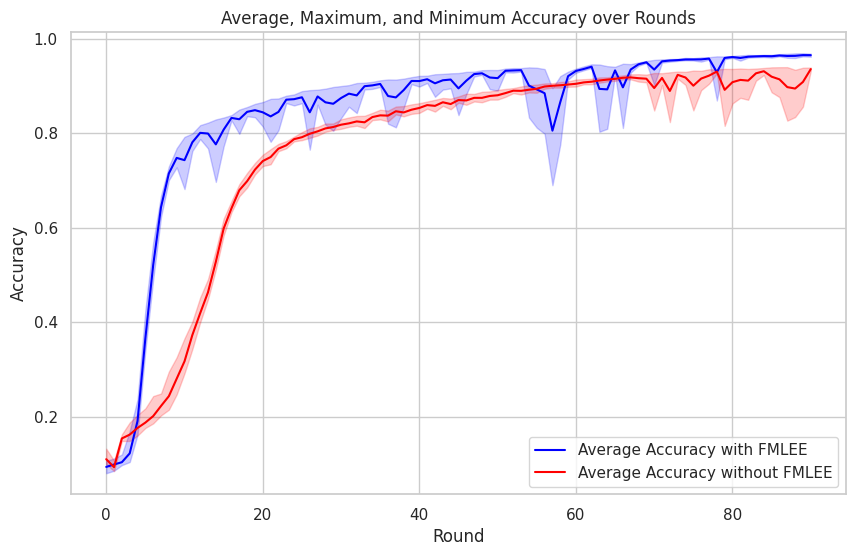

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predefined data lists a, b, c, and d
# a: accuracy_without_fmlee
# b: loss_without_fmlee
# c: accuracy_with_fmlee
# d: loss_with_fmlee

# Convert lists of lists to numpy arrays for easier manipulation
accuracy_with_fmlee = np.array(c)[:, :91]
accuracy_without_fmlee = np.array(a)[:, :91]

# Calculate average, max, and min (average of lowest 3 clients) accuracy per round
avg_accuracy_with_fmlee = np.mean(accuracy_with_fmlee, axis=0)
max_accuracy_with_fmlee = np.max(accuracy_with_fmlee, axis=0)
min_accuracy_with_fmlee = np.mean(np.sort(accuracy_with_fmlee, axis=0)[:7], axis=0)

avg_accuracy_without_fmlee = np.mean(accuracy_without_fmlee, axis=0)
max_accuracy_without_fmlee = np.max(accuracy_without_fmlee, axis=0)
min_accuracy_without_fmlee = np.mean(
    np.sort(accuracy_without_fmlee, axis=0)[:7], axis=0
)

# Plot average, max, and min (average of lowest 3 clients) accuracy over rounds
plt.figure(figsize=(10, 6))

# With FMLEE scheme
plt.fill_between(
    np.arange(accuracy_with_fmlee.shape[1]),
    min_accuracy_with_fmlee,
    max_accuracy_with_fmlee,
    color="blue",
    alpha=0.2,
)
sns.lineplot(
    x=np.arange(accuracy_with_fmlee.shape[1]),
    y=avg_accuracy_with_fmlee,
    label="Average Accuracy with FMLEE",
    color="blue",
)

# Without FMLEE scheme
plt.fill_between(
    np.arange(accuracy_without_fmlee.shape[1]),
    min_accuracy_without_fmlee,
    max_accuracy_without_fmlee,
    color="red",
    alpha=0.2,
)
sns.lineplot(
    x=np.arange(accuracy_without_fmlee.shape[1]),
    y=avg_accuracy_without_fmlee,
    label="Average Accuracy without FMLEE",
    color="red",
)

plt.title(
    "Average, Maximum, and Minimum Accuracy over Rounds"
)
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

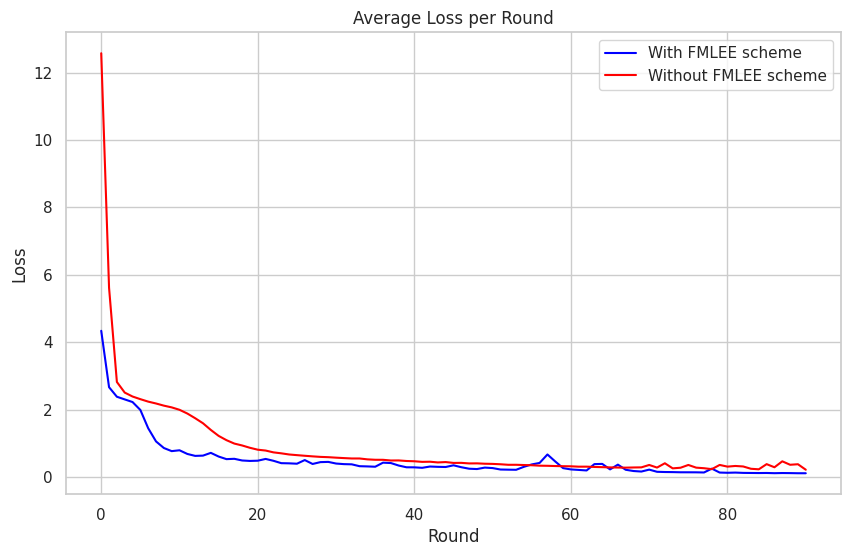

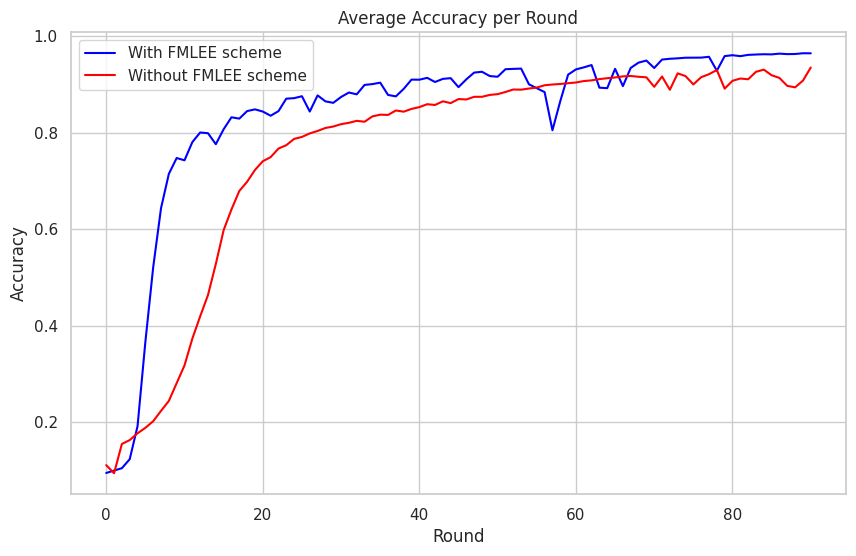

/tmp/ipykernel_2098917/726784916.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(20), y=loss_diff, palette="viridis")


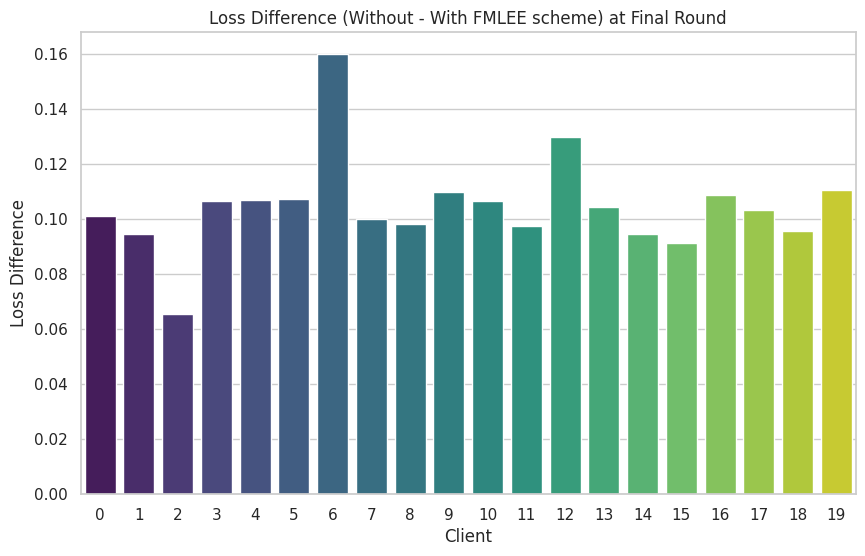

/tmp/ipykernel_2098917/726784916.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(20), y=accuracy_diff, palette="magma")


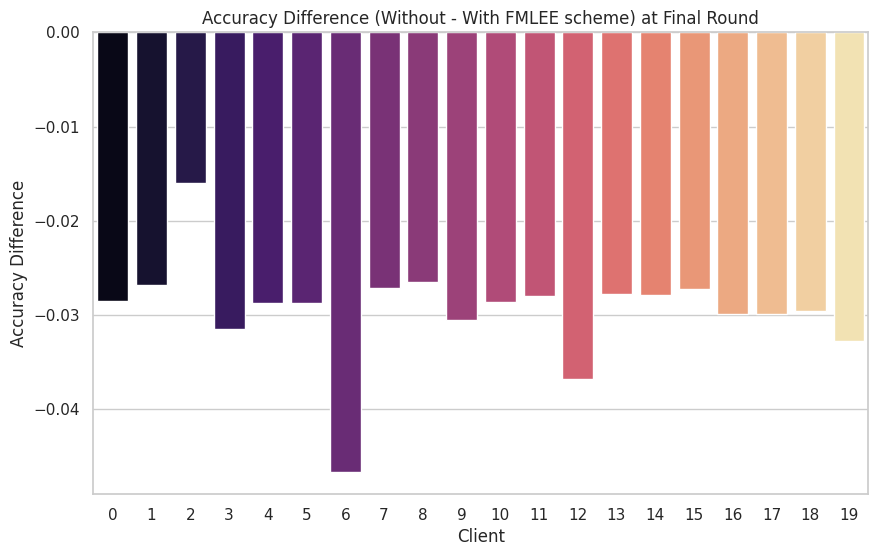

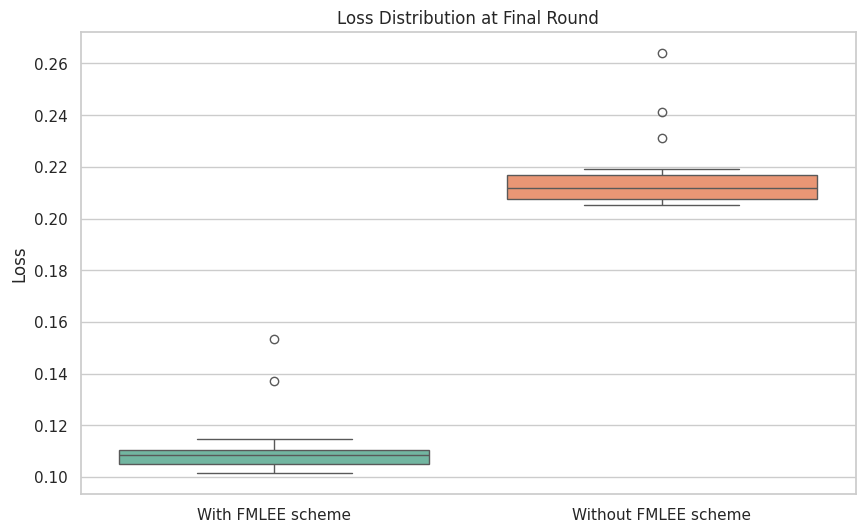

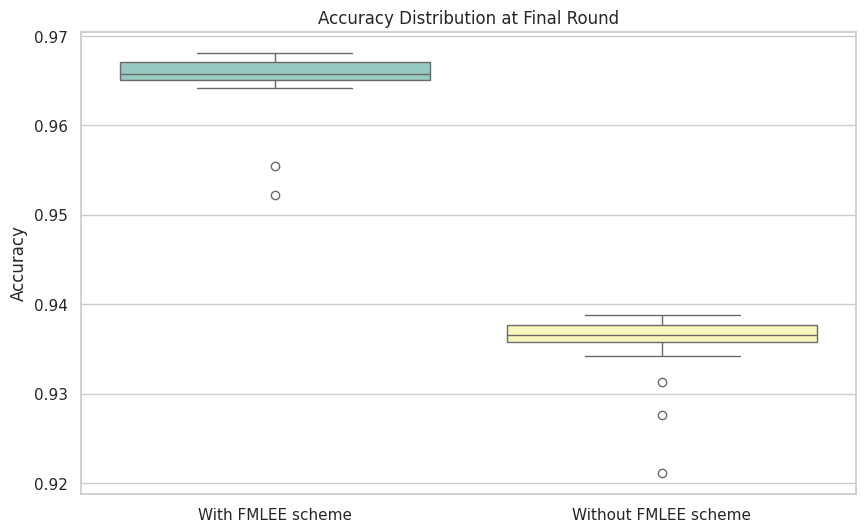

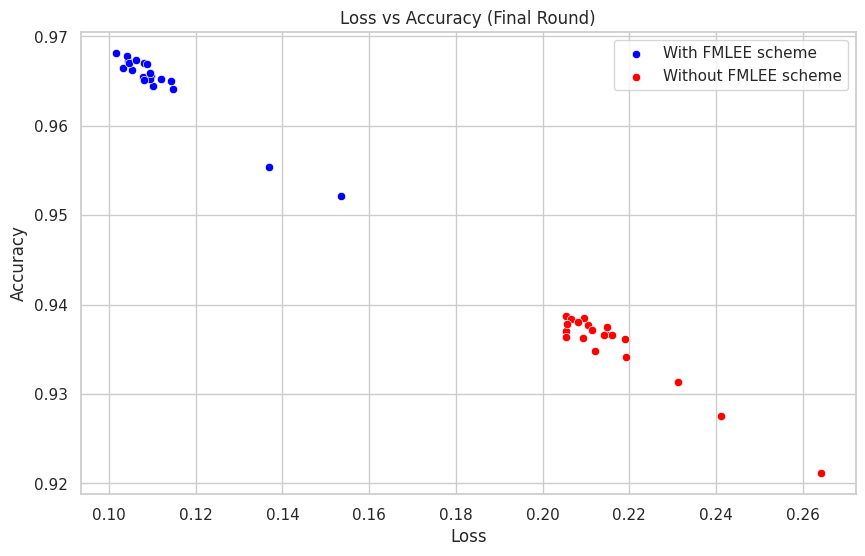

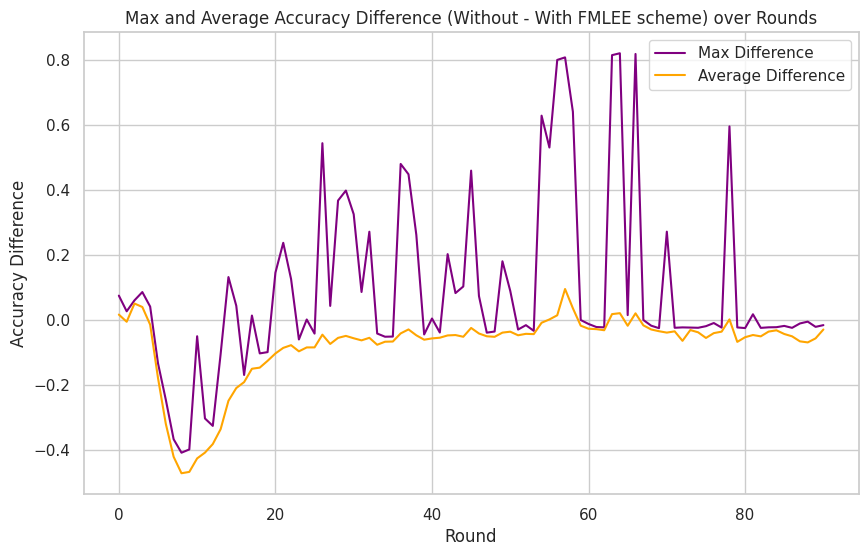

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predefined data lists a, b, c, and d
# a: accuracy_without_fmlee
# b: loss_without_fmlee
# c: accuracy_with_fmlee
# d: loss_with_fmlee

# Convert lists of lists to numpy arrays for easier manipulation
loss_with_fmlee = np.array(d)[:, :91]
accuracy_with_fmlee = np.array(c)[:, :91]
loss_without_fmlee = np.array(b)[:, :91]
accuracy_without_fmlee = np.array(a)[:, :91]

# Calculate average loss and accuracy per round
avg_loss_with_fmlee = np.mean(loss_with_fmlee, axis=0)
avg_accuracy_with_fmlee = np.mean(accuracy_with_fmlee, axis=0)
avg_loss_without_fmlee = np.mean(loss_without_fmlee, axis=0)
avg_accuracy_without_fmlee = np.mean(accuracy_without_fmlee, axis=0)

# Line Plot for Average Loss per Round
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_loss_with_fmlee, label="With FMLEE scheme", color="blue")
sns.lineplot(data=avg_loss_without_fmlee, label="Without FMLEE scheme", color="red")
plt.title("Average Loss per Round")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Line Plot for Average Accuracy per Round
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_accuracy_with_fmlee, label="With FMLEE scheme", color="blue")
sns.lineplot(data=avg_accuracy_without_fmlee, label="Without FMLEE scheme", color="red")
plt.title("Average Accuracy per Round")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Bar Plot for Loss Difference at Final Round (round 90)
final_round = 90
loss_diff = loss_without_fmlee[:, final_round] - loss_with_fmlee[:, final_round]
accuracy_diff = (
    accuracy_without_fmlee[:, final_round] - accuracy_with_fmlee[:, final_round]
)

plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(20), y=loss_diff, palette="viridis")
plt.title("Loss Difference (Without - With FMLEE scheme) at Final Round")
plt.xlabel("Client")
plt.ylabel("Loss Difference")
plt.show()

# Bar Plot for Accuracy Difference at Final Round (round 90)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(20), y=accuracy_diff, palette="magma")
plt.title("Accuracy Difference (Without - With FMLEE scheme) at Final Round")
plt.xlabel("Client")
plt.ylabel("Accuracy Difference")
plt.show()

# Box Plot for Loss Distribution at Final Round
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=[loss_with_fmlee[:, final_round], loss_without_fmlee[:, final_round]],
    palette="Set2",
)
plt.xticks([0, 1], ["With FMLEE scheme", "Without FMLEE scheme"])
plt.title("Loss Distribution at Final Round")
plt.ylabel("Loss")
plt.show()

# Box Plot for Accuracy Distribution at Final Round
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=[accuracy_with_fmlee[:, final_round], accuracy_without_fmlee[:, final_round]],
    palette="Set3",
)
plt.xticks([0, 1], ["With FMLEE scheme", "Without FMLEE scheme"])
plt.title("Accuracy Distribution at Final Round")
plt.ylabel("Accuracy")
plt.show()

# Scatter Plot for Loss vs Accuracy at Final Round
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=loss_with_fmlee[:, final_round],
    y=accuracy_with_fmlee[:, final_round],
    color="blue",
    label="With FMLEE scheme",
)
sns.scatterplot(
    x=loss_without_fmlee[:, final_round],
    y=accuracy_without_fmlee[:, final_round],
    color="red",
    label="Without FMLEE scheme",
)
plt.title("Loss vs Accuracy (Final Round)")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Calculate difference in accuracy over rounds
accuracy_diff_over_rounds = accuracy_without_fmlee - accuracy_with_fmlee

# Calculate max and average difference
max_accuracy_diff = np.max(accuracy_diff_over_rounds, axis=0)
avg_accuracy_diff = np.mean(accuracy_diff_over_rounds, axis=0)

# Plot max and average difference of accuracy over rounds
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=np.arange(accuracy_diff_over_rounds.shape[1]),
    y=max_accuracy_diff,
    label="Max Difference",
    color="purple",
)
sns.lineplot(
    x=np.arange(accuracy_diff_over_rounds.shape[1]),
    y=avg_accuracy_diff,
    label="Average Difference",
    color="orange",
)
plt.title(
    "Max and Average Accuracy Difference (Without - With FMLEE scheme) over Rounds"
)
plt.xlabel("Round")
plt.ylabel("Accuracy Difference")
plt.legend()
plt.show()

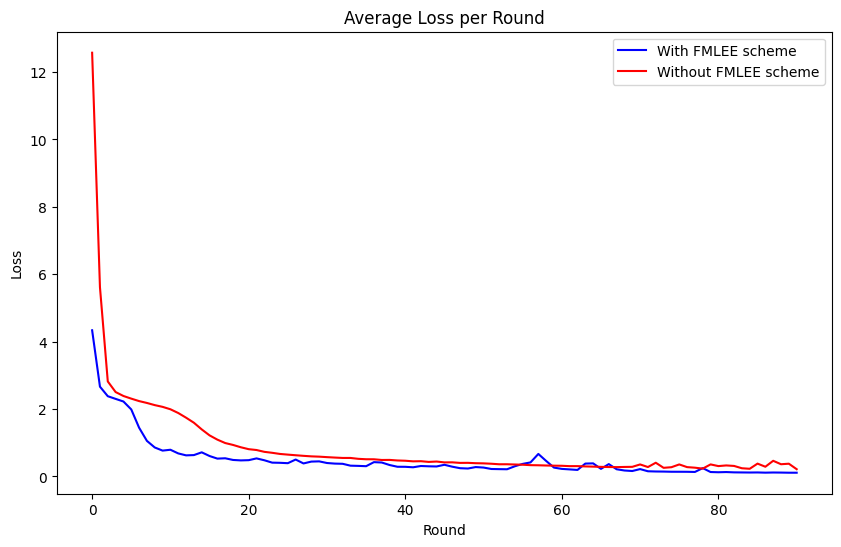

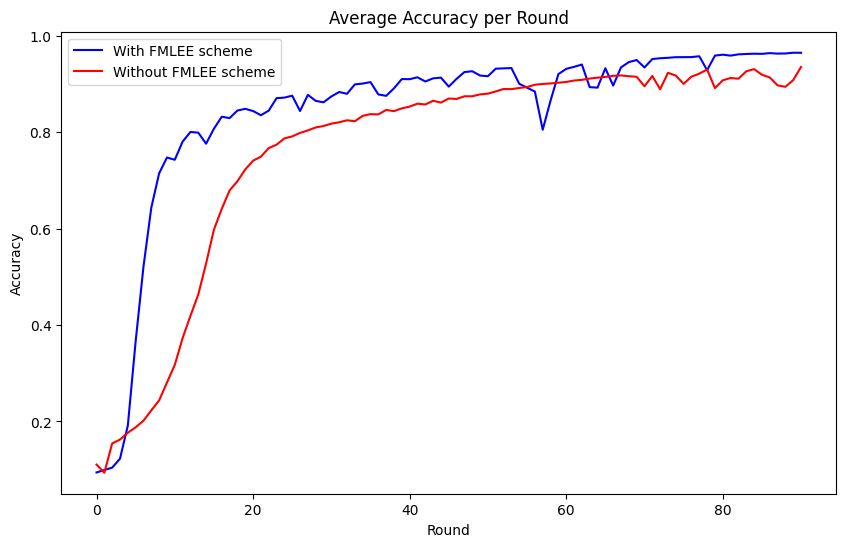

/tmp/ipykernel_2098917/986152602.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(20), y=loss_diff, palette="viridis")


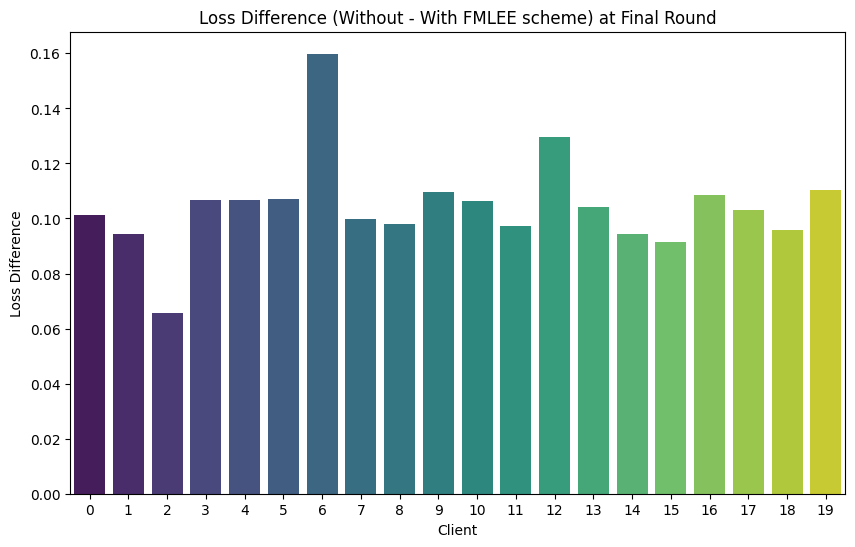

/tmp/ipykernel_2098917/986152602.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(20), y=accuracy_diff, palette="magma")


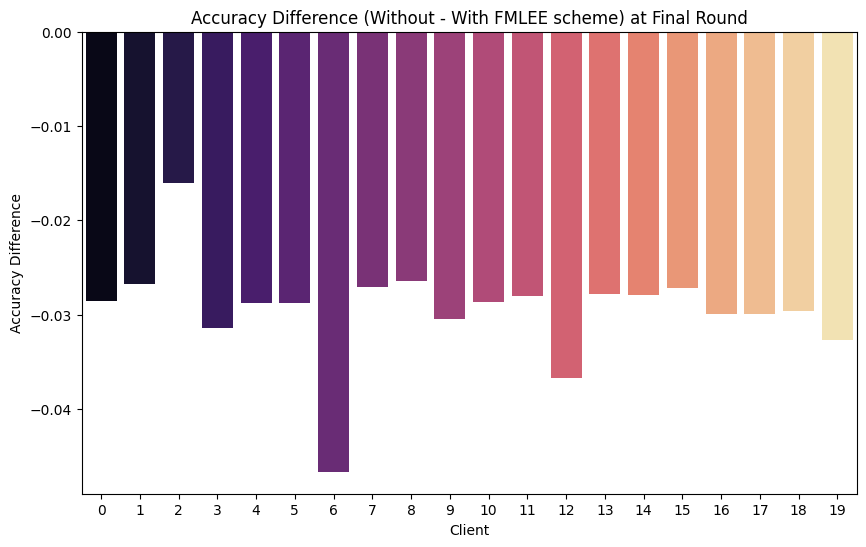

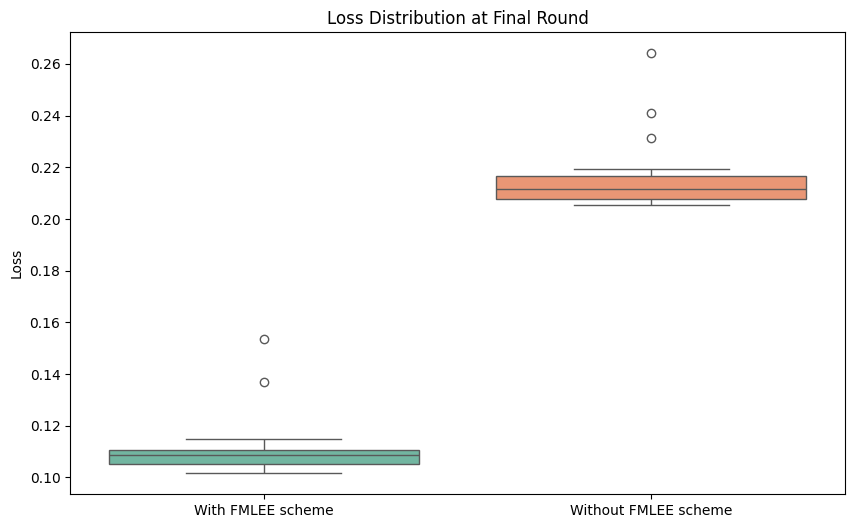

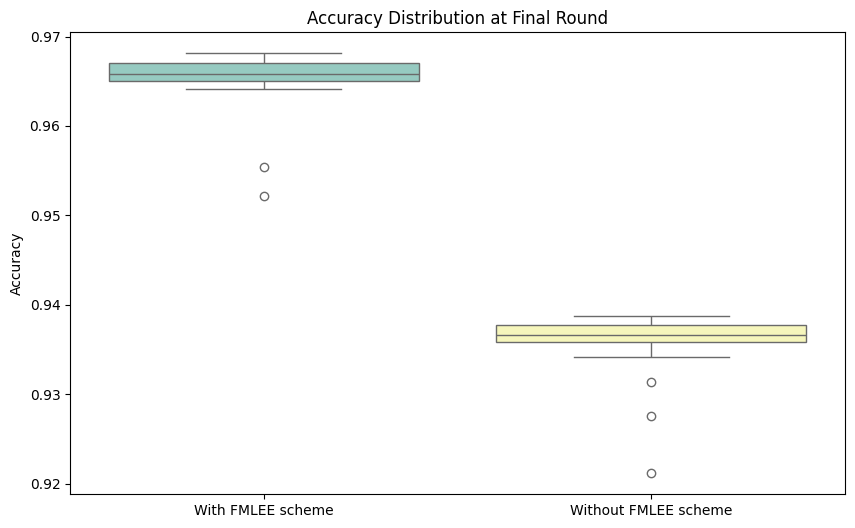

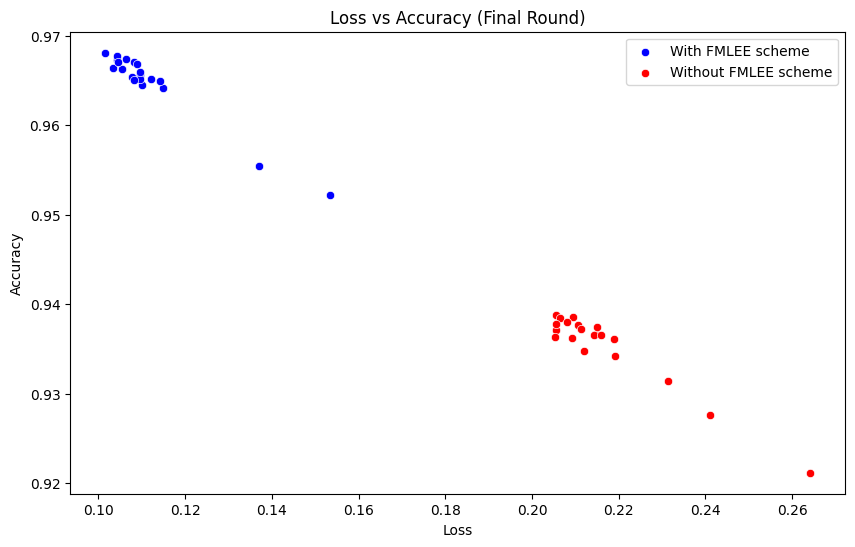

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predefined data lists a, b, c, and d
# a: accuracy_without_fmlee
# b: loss_without_fmlee
# c: accuracy_with_fmlee
# d: loss_with_fmlee

# Convert lists of lists to numpy arrays for easier manipulation
loss_with_fmlee = np.array(d)[:, :91]
accuracy_with_fmlee = np.array(c)[:, :91]
loss_without_fmlee = np.array(b)[:, :91]
accuracy_without_fmlee = np.array(a)[:, :91]

# Calculate average loss and accuracy per round
avg_loss_with_fmlee = np.mean(loss_with_fmlee, axis=0)
avg_accuracy_with_fmlee = np.mean(accuracy_with_fmlee, axis=0)
avg_loss_without_fmlee = np.mean(loss_without_fmlee, axis=0)
avg_accuracy_without_fmlee = np.mean(accuracy_without_fmlee, axis=0)

# Line Plot for Average Loss per Round
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_loss_with_fmlee, label="With FMLEE scheme", color="blue")
sns.lineplot(data=avg_loss_without_fmlee, label="Without FMLEE scheme", color="red")
plt.title("Average Loss per Round")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Line Plot for Average Accuracy per Round
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_accuracy_with_fmlee, label="With FMLEE scheme", color="blue")
sns.lineplot(data=avg_accuracy_without_fmlee, label="Without FMLEE scheme", color="red")
plt.title("Average Accuracy per Round")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Bar Plot for Loss Difference at Final Round (round 90)
final_round = 90
loss_diff = loss_without_fmlee[:, final_round] - loss_with_fmlee[:, final_round]
accuracy_diff = (
    accuracy_without_fmlee[:, final_round] - accuracy_with_fmlee[:, final_round]
)

plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(20), y=loss_diff, palette="viridis")
plt.title("Loss Difference (Without - With FMLEE scheme) at Final Round")
plt.xlabel("Client")
plt.ylabel("Loss Difference")
plt.show()

# Bar Plot for Accuracy Difference at Final Round (round 90)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(20), y=accuracy_diff, palette="magma")
plt.title("Accuracy Difference (Without - With FMLEE scheme) at Final Round")
plt.xlabel("Client")
plt.ylabel("Accuracy Difference")
plt.show()

# Box Plot for Loss Distribution at Final Round
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=[loss_with_fmlee[:, final_round], loss_without_fmlee[:, final_round]],
    palette="Set2",
)
plt.xticks([0, 1], ["With FMLEE scheme", "Without FMLEE scheme"])
plt.title("Loss Distribution at Final Round")
plt.ylabel("Loss")
plt.show()

# Box Plot for Accuracy Distribution at Final Round
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=[accuracy_with_fmlee[:, final_round], accuracy_without_fmlee[:, final_round]],
    palette="Set3",
)
plt.xticks([0, 1], ["With FMLEE scheme", "Without FMLEE scheme"])
plt.title("Accuracy Distribution at Final Round")
plt.ylabel("Accuracy")
plt.show()

# Scatter Plot for Loss vs Accuracy at Final Round
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=loss_with_fmlee[:, final_round],
    y=accuracy_with_fmlee[:, final_round],
    color="blue",
    label="With FMLEE scheme",
)
sns.scatterplot(
    x=loss_without_fmlee[:, final_round],
    y=accuracy_without_fmlee[:, final_round],
    color="red",
    label="Without FMLEE scheme",
)
plt.title("Loss vs Accuracy (Final Round)")
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

/tmp/ipykernel_2098917/3609018384.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="No. of Parameters", data=df, palette="viridis")


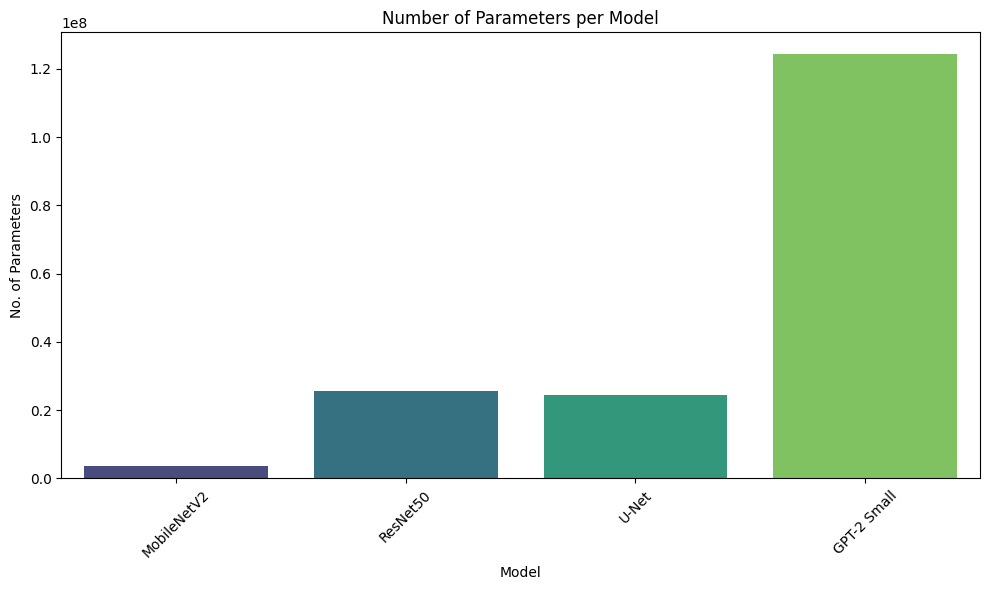

/tmp/ipykernel_2098917/3609018384.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Size (MB)", data=df, palette="viridis")


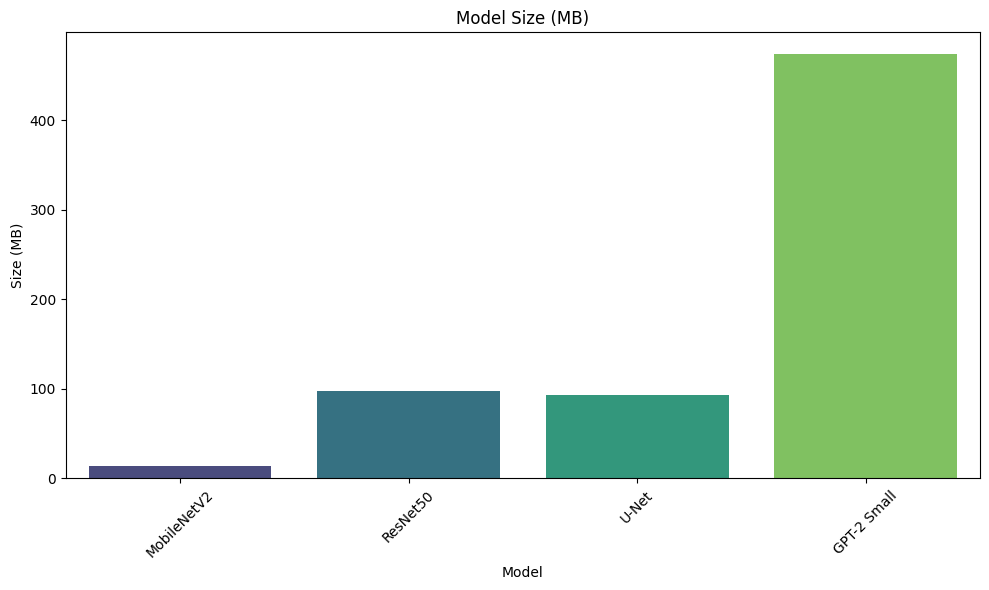

/tmp/ipykernel_2098917/3609018384.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Encryption Time (s)", data=df, palette="viridis")


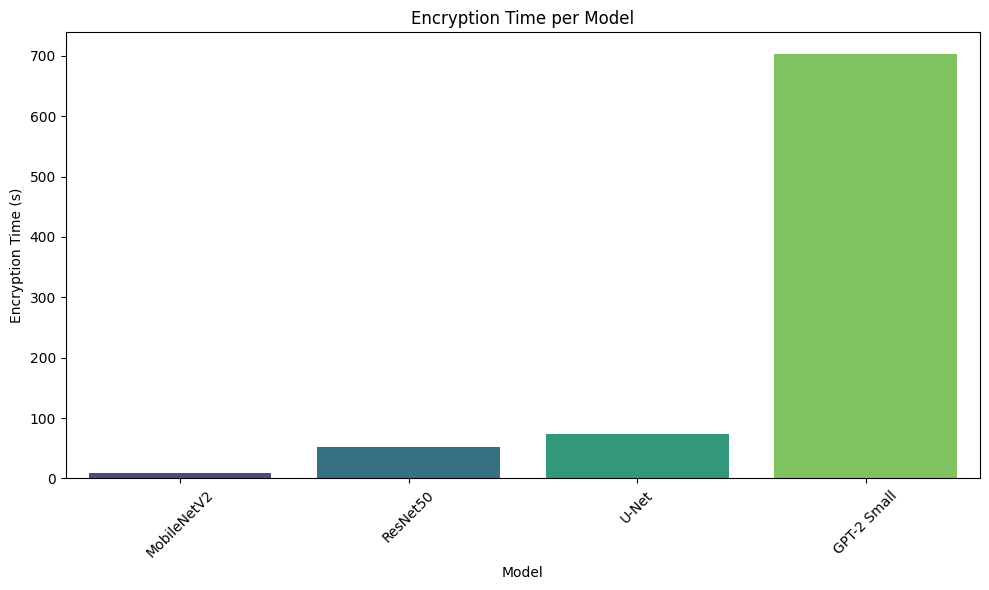

/tmp/ipykernel_2098917/3609018384.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Aggregation Time (s)", data=df, palette="viridis")


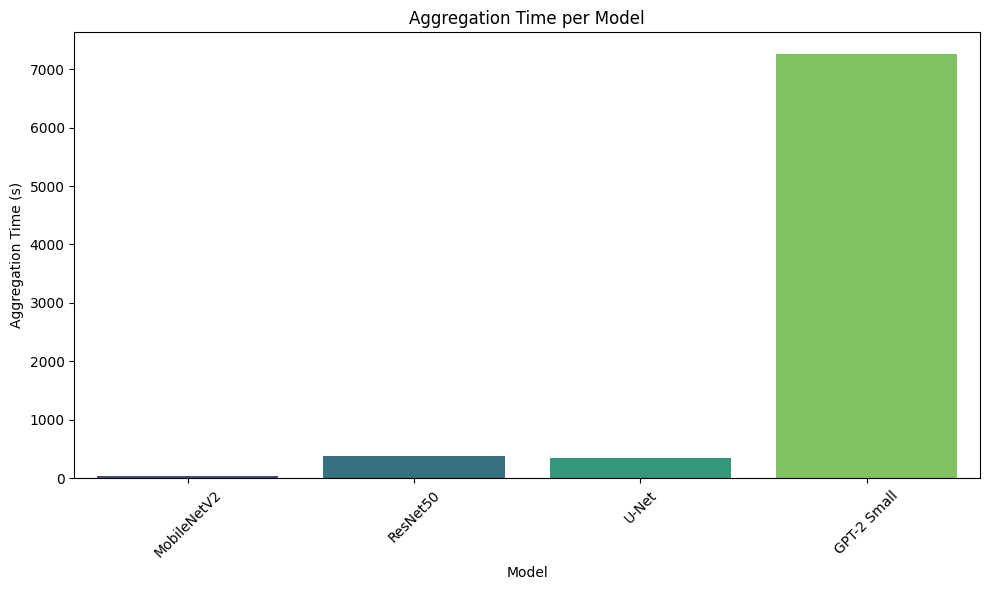

/tmp/ipykernel_2098917/3609018384.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Decryption Time (s)", data=df, palette="viridis")


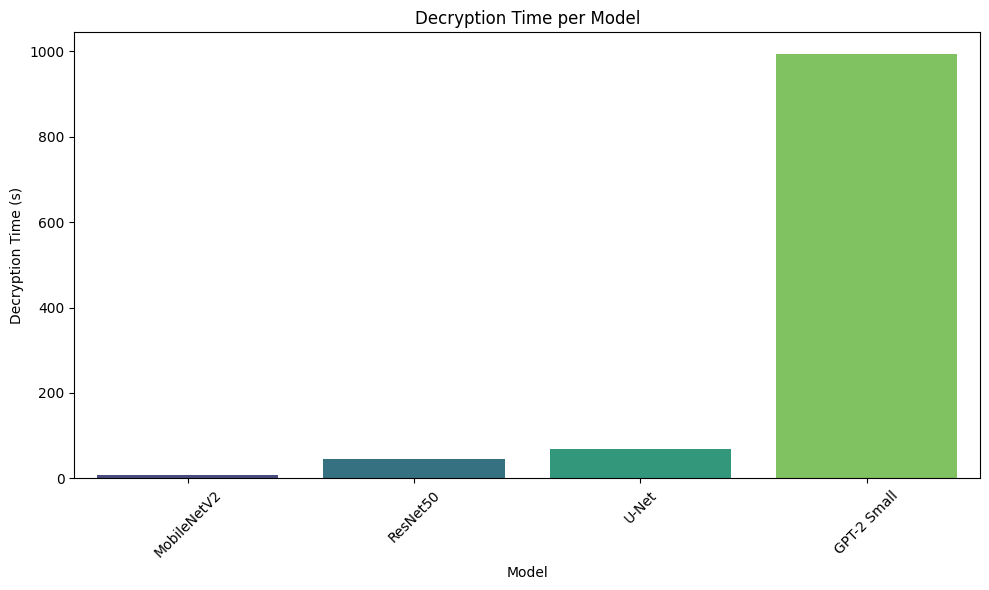

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ["MobileNetV2", "ResNet50", "U-Net", "GPT-2 Small"]
params = [3504872, 25557032, 24436369, 124439808]
size_mb = [13.60, 97.80, 93.38, 474.75]
encryption_time = [8.93, 51.34, 73.42, 703.87]
aggregation_time = [41.97, 379.41, 356.98, 7264.64]
decryption_time = [8.49, 45.88, 69.95, 994.67]

# Create DataFrame
data = {
    "Model": models,
    "No. of Parameters": params,
    "Size (MB)": size_mb,
    "Encryption Time (s)": encryption_time,
    "Aggregation Time (s)": aggregation_time,
    "Decryption Time (s)": decryption_time,
}
df = pd.DataFrame(data)

# Plot No. of Parameters
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="No. of Parameters", data=df, palette="viridis")
plt.title("Number of Parameters per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Size (MB)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Size (MB)", data=df, palette="viridis")
plt.title("Model Size (MB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Encryption Time (s)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Encryption Time (s)", data=df, palette="viridis")
plt.title("Encryption Time per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Aggregation Time (s)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Aggregation Time (s)", data=df, palette="viridis")
plt.title("Aggregation Time per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Decryption Time (s)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Decryption Time (s)", data=df, palette="viridis")
plt.title("Decryption Time per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

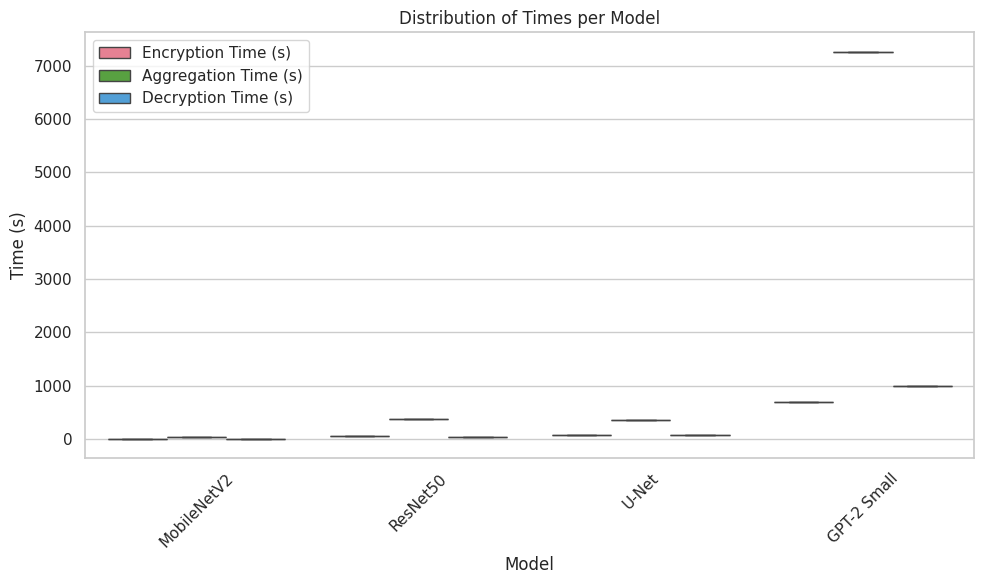

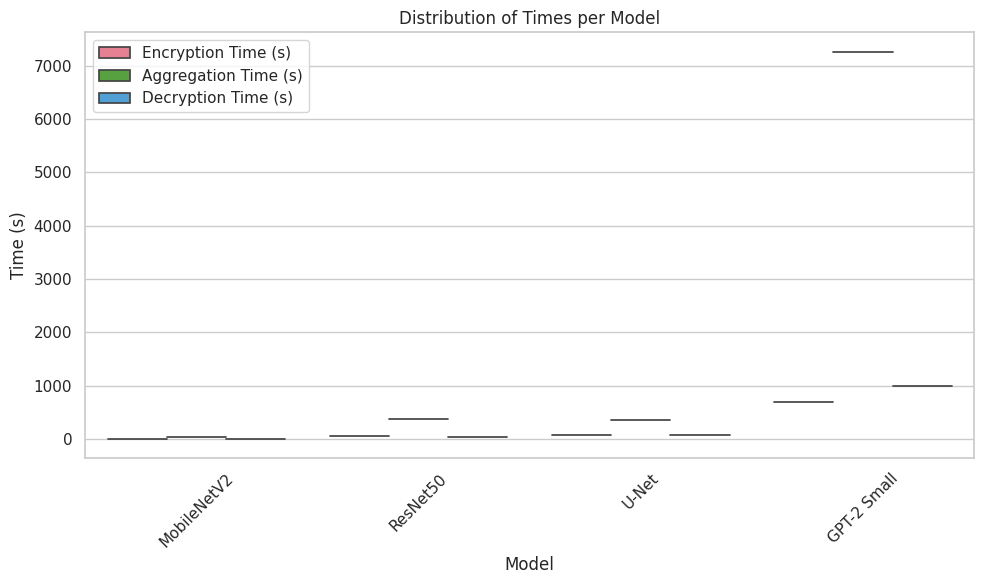

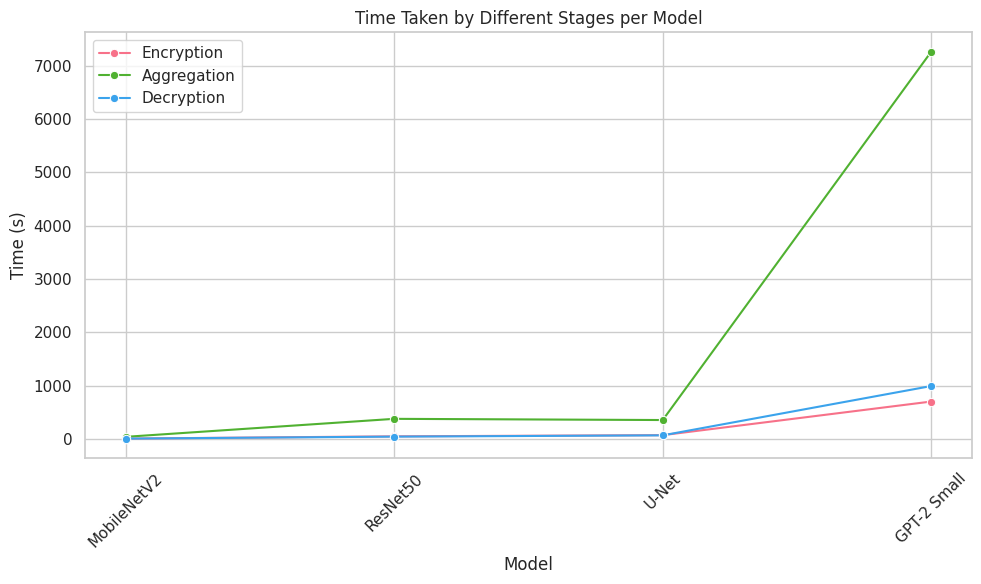

/tmp/ipykernel_2098917/3718048118.py:78: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=size_mb, y=encryption_time, hue=models, s=100, palette=palette)


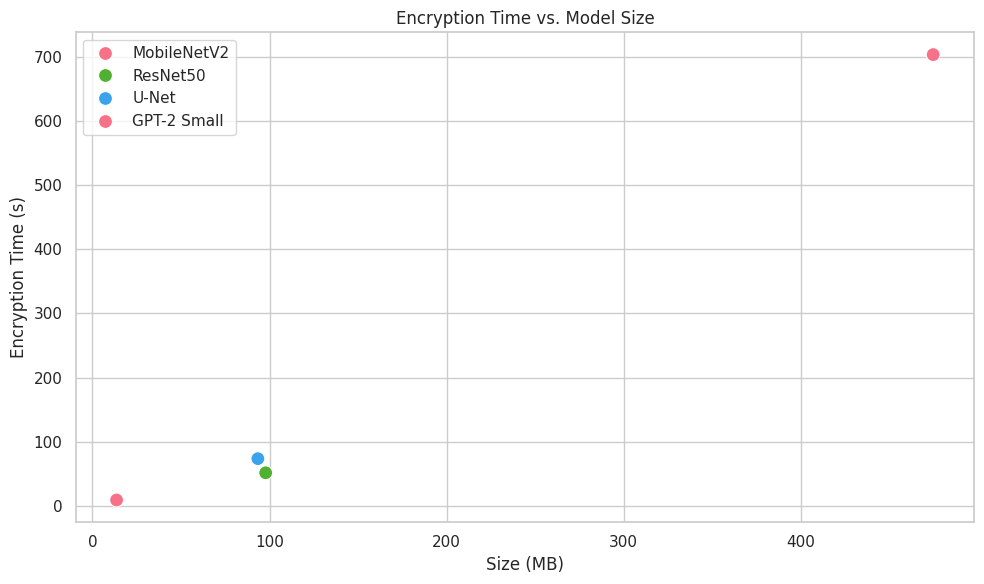

/tmp/ipykernel_2098917/3718048118.py:87: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=size_mb, y=aggregation_time, hue=models, s=100, palette=palette)


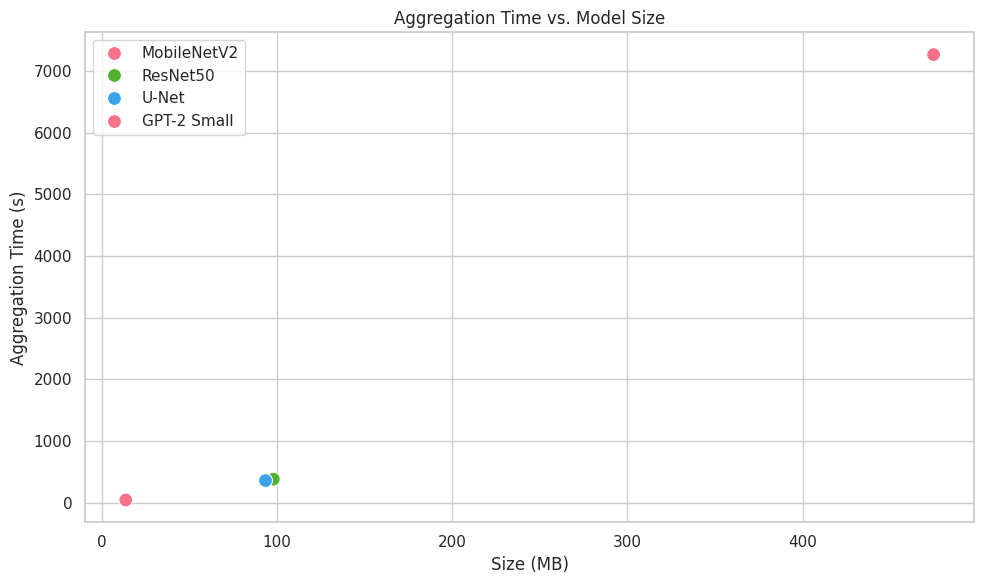

/tmp/ipykernel_2098917/3718048118.py:96: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=size_mb, y=decryption_time, hue=models, s=100, palette=palette)


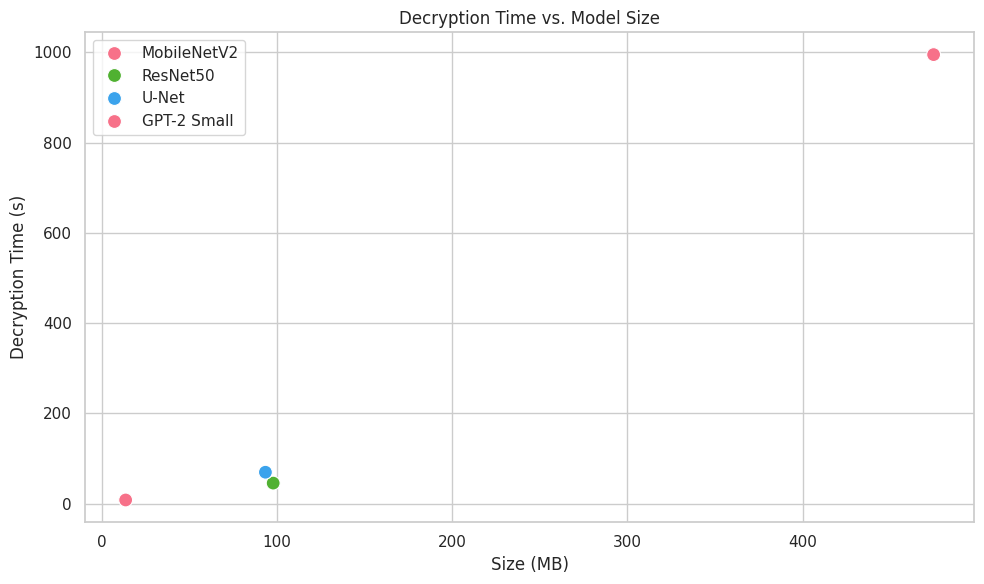

/tmp/ipykernel_2098917/3718048118.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="No. of Parameters", data=df, palette="viridis")


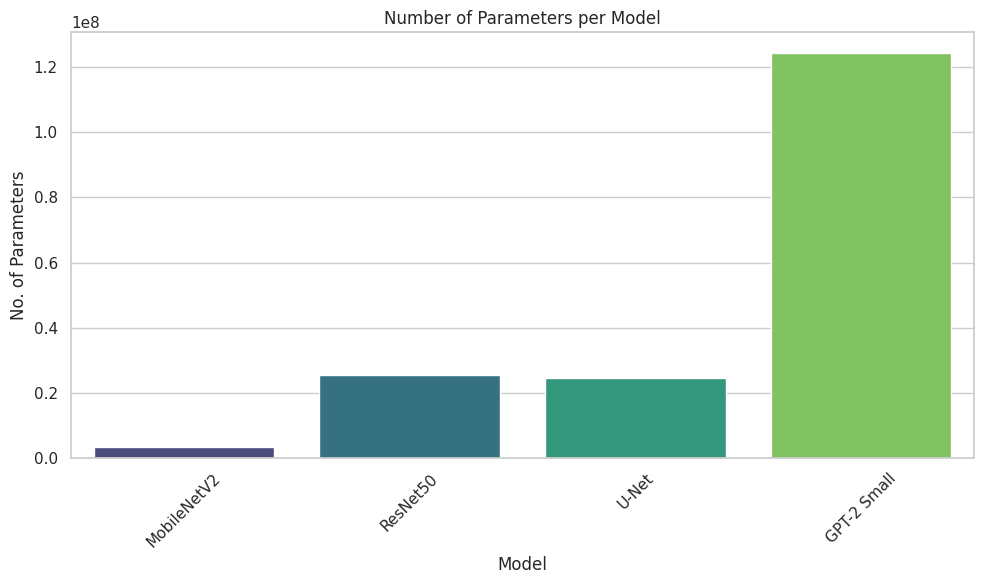

/tmp/ipykernel_2098917/3718048118.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Size (MB)", data=df, palette="viridis")


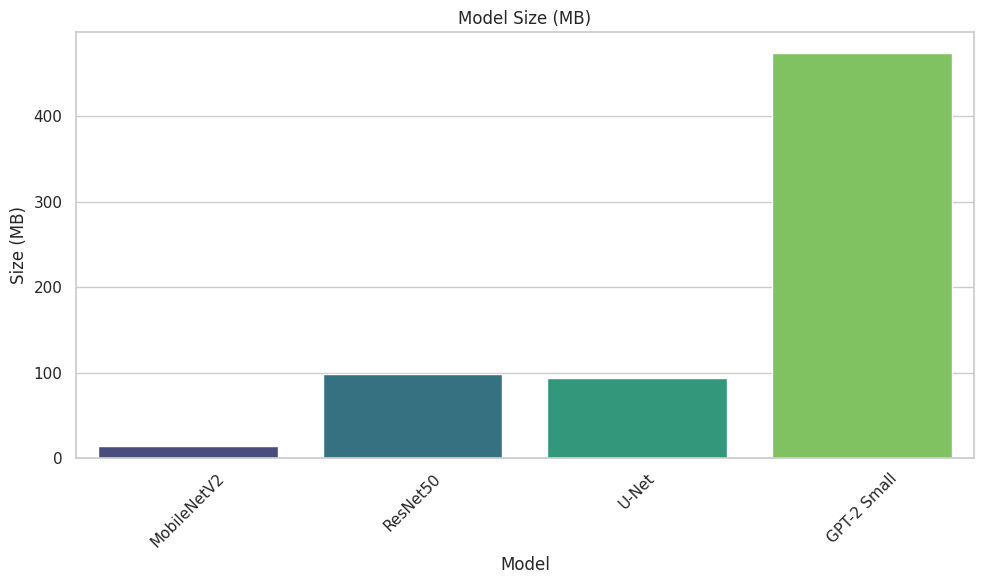

/tmp/ipykernel_2098917/3718048118.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Encryption Time (s)", data=df, palette="viridis")


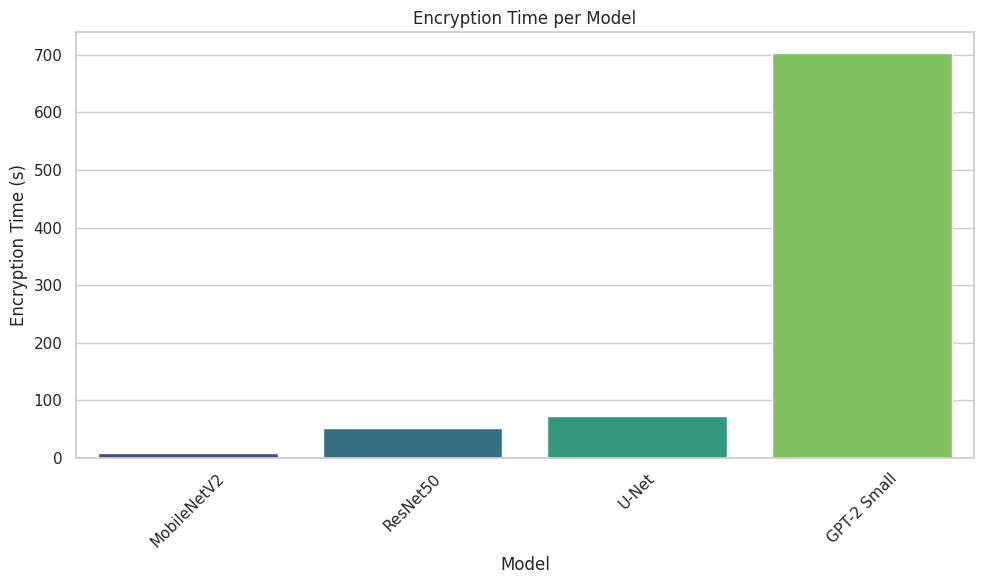

/tmp/ipykernel_2098917/3718048118.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Aggregation Time (s)", data=df, palette="viridis")


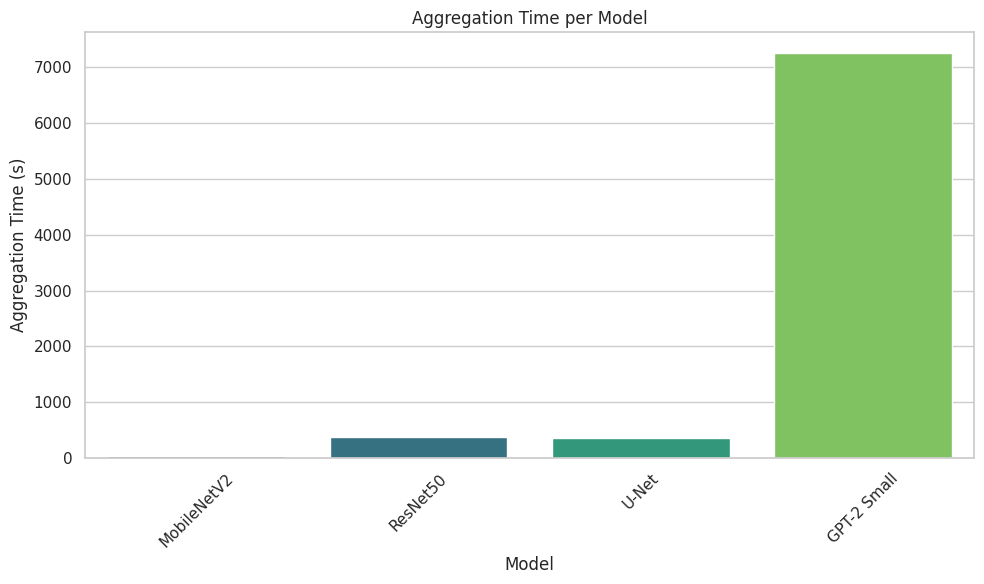

/tmp/ipykernel_2098917/3718048118.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Decryption Time (s)", data=df, palette="viridis")


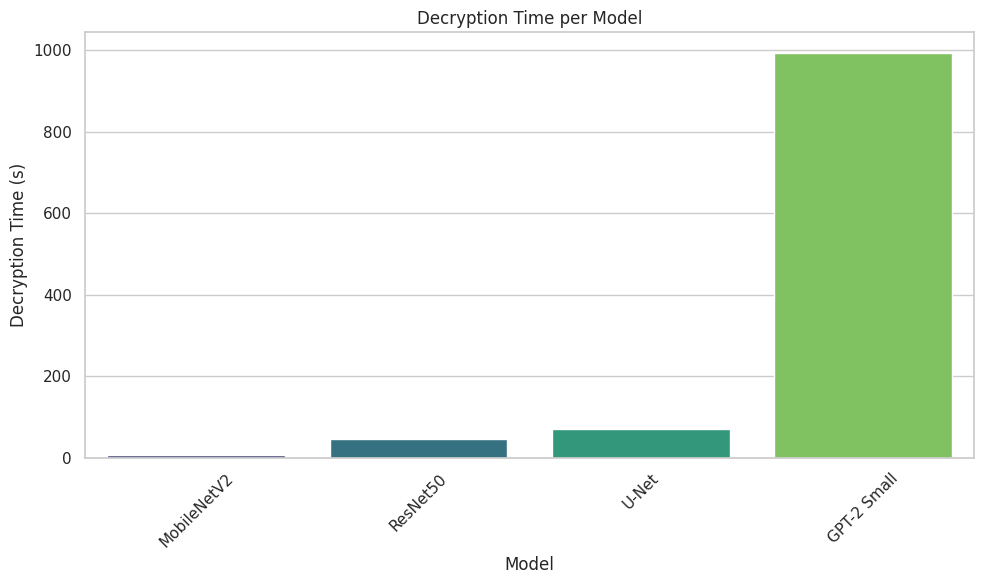

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ["MobileNetV2", "ResNet50", "U-Net", "GPT-2 Small"]
params = [3504872, 25557032, 24436369, 124439808]
size_mb = [13.60, 97.80, 93.38, 474.75]
encryption_time = [8.93, 51.34, 73.42, 703.87]
aggregation_time = [41.97, 379.41, 356.98, 7264.64]
decryption_time = [8.49, 45.88, 69.95, 994.67]

# Create DataFrame
data = {
    "Model": models,
    "No. of Parameters": params,
    "Size (MB)": size_mb,
    "Encryption Time (s)": encryption_time,
    "Aggregation Time (s)": aggregation_time,
    "Decryption Time (s)": decryption_time,
}
df = pd.DataFrame(data)

# Melt the DataFrame for times
df_melted = df.melt(
    id_vars=["Model"],
    value_vars=["Encryption Time (s)", "Aggregation Time (s)", "Decryption Time (s)"],
    var_name="Metric",
    value_name="Time (s)",
)

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 3)

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="Time (s)", hue="Metric", data=df_melted, palette=palette)
plt.title("Distribution of Times per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="Model", y="Time (s)", hue="Metric", data=df_melted, split=True, palette=palette
)
plt.title("Distribution of Times per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

# Line Plot Data Preparation
df_line = pd.DataFrame(
    {
        "Model": models * 3,
        "Time (s)": encryption_time + aggregation_time + decryption_time,
        "Stage": ["Encryption"] * 4 + ["Aggregation"] * 4 + ["Decryption"] * 4,
    }
)

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Model", y="Time (s)", hue="Stage", marker="o", data=df_line, palette=palette
)
plt.title("Time Taken by Different Stages per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

# Scatter Plot for Encryption Time vs. Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x=size_mb, y=encryption_time, hue=models, s=100, palette=palette)
plt.title("Encryption Time vs. Model Size")
plt.xlabel("Size (MB)")
plt.ylabel("Encryption Time (s)")
plt.tight_layout()
plt.show()

# Scatter Plot for Aggregation Time vs. Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x=size_mb, y=aggregation_time, hue=models, s=100, palette=palette)
plt.title("Aggregation Time vs. Model Size")
plt.xlabel("Size (MB)")
plt.ylabel("Aggregation Time (s)")
plt.tight_layout()
plt.show()

# Scatter Plot for Decryption Time vs. Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x=size_mb, y=decryption_time, hue=models, s=100, palette=palette)
plt.title("Decryption Time vs. Model Size")
plt.xlabel("Size (MB)")
plt.ylabel("Decryption Time (s)")
plt.tight_layout()
plt.show()

# Bar Plot for Number of Parameters
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="No. of Parameters", data=df, palette="viridis")
plt.title("Number of Parameters per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot for Size (MB)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Size (MB)", data=df, palette="viridis")
plt.title("Model Size (MB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot for Encryption Time (s)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Encryption Time (s)", data=df, palette="viridis")
plt.title("Encryption Time per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot for Aggregation Time (s)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Aggregation Time (s)", data=df, palette="viridis")
plt.title("Aggregation Time per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot for Decryption Time (s)
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Decryption Time (s)", data=df, palette="viridis")
plt.title("Decryption Time per Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

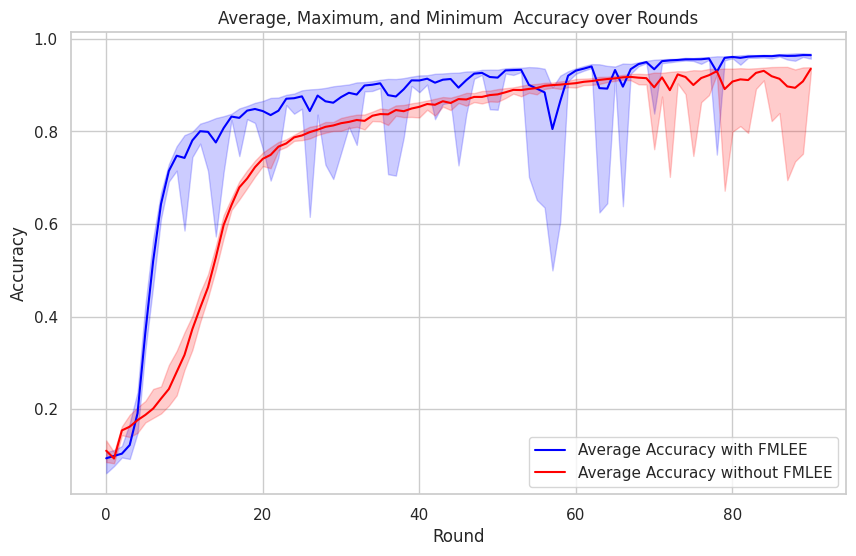

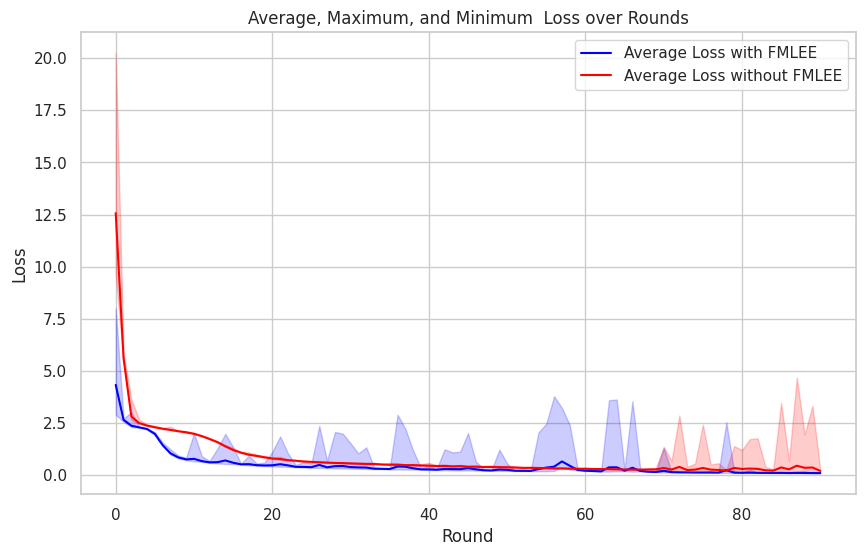

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predefined data lists a, b, c, and d
# a: accuracy_without_fmlee
# b: loss_without_fmlee
# c: accuracy_with_fmlee
# d: loss_with_fmlee

# Convert lists of lists to numpy arrays for easier manipulation
accuracy_with_fmlee = np.array(c)[:, :91]
accuracy_without_fmlee = np.array(a)[:, :91]
loss_with_fmlee = np.array(d)[:, :91]
loss_without_fmlee = np.array(b)[:, :91]

# Calculate average, max, and min (average of lowest 3 clients) accuracy per round
avg_accuracy_with_fmlee = np.mean(accuracy_with_fmlee, axis=0)
max_accuracy_with_fmlee = np.max(accuracy_with_fmlee, axis=0)
min_accuracy_with_fmlee = np.mean(np.sort(accuracy_with_fmlee, axis=0)[:3], axis=0)

avg_accuracy_without_fmlee = np.mean(accuracy_without_fmlee, axis=0)
max_accuracy_without_fmlee = np.max(accuracy_without_fmlee, axis=0)
min_accuracy_without_fmlee = np.mean(
    np.sort(accuracy_without_fmlee, axis=0)[:3], axis=0
)

# Calculate average, max, and min (average of highest 3 clients) loss per round
avg_loss_with_fmlee = np.mean(loss_with_fmlee, axis=0)
max_loss_with_fmlee = np.max(loss_with_fmlee, axis=0)
min_loss_with_fmlee = np.mean(np.sort(loss_with_fmlee, axis=0)[:3], axis=0)

avg_loss_without_fmlee = np.mean(loss_without_fmlee, axis=0)
max_loss_without_fmlee = np.max(loss_without_fmlee, axis=0)
min_loss_without_fmlee = np.mean(np.sort(loss_without_fmlee, axis=0)[:3], axis=0)

# Plot average, max, and min (average of lowest 3 clients) accuracy over rounds
plt.figure(figsize=(10, 6))

# With FMLEE scheme
plt.fill_between(
    np.arange(accuracy_with_fmlee.shape[1]),
    min_accuracy_with_fmlee,
    max_accuracy_with_fmlee,
    color="blue",
    alpha=0.2,
)
sns.lineplot(
    x=np.arange(accuracy_with_fmlee.shape[1]),
    y=avg_accuracy_with_fmlee,
    label="Average Accuracy with FMLEE",
    color="blue",
)

# Without FMLEE scheme
plt.fill_between(
    np.arange(accuracy_without_fmlee.shape[1]),
    min_accuracy_without_fmlee,
    max_accuracy_without_fmlee,
    color="red",
    alpha=0.2,
)
sns.lineplot(
    x=np.arange(accuracy_without_fmlee.shape[1]),
    y=avg_accuracy_without_fmlee,
    label="Average Accuracy without FMLEE",
    color="red",
)

plt.title(
    "Average, Maximum, and Minimum  Accuracy over Rounds"
)
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot average, max, and min (average of lowest 3 clients) loss over rounds
plt.figure(figsize=(10, 6))

# With FMLEE scheme
plt.fill_between(
    np.arange(loss_with_fmlee.shape[1]),
    min_loss_with_fmlee,
    max_loss_with_fmlee,
    color="blue",
    alpha=0.2,
)
sns.lineplot(
    x=np.arange(loss_with_fmlee.shape[1]),
    y=avg_loss_with_fmlee,
    label="Average Loss with FMLEE",
    color="blue",
)

# Without FMLEE scheme
plt.fill_between(
    np.arange(loss_without_fmlee.shape[1]),
    min_loss_without_fmlee,
    max_loss_without_fmlee,
    color="red",
    alpha=0.2,
)
sns.lineplot(
    x=np.arange(loss_without_fmlee.shape[1]),
    y=avg_loss_without_fmlee,
    label="Average Loss without FMLEE",
    color="red",
)

plt.title("Average, Maximum, and Minimum  Loss over Rounds")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from Pyfhel import Pyfhel

HE = Pyfhel()  # Creating empty Pyfhel object

ckks_params = {
    "scheme": "CKKS",
    "n": 2**14,
    "scale": 2**30,
    "qi_sizes": [60, 30, 30, 30, 60],
}

seed = 1234567890  # Set the seed value

HE.contextGen(**ckks_params)  # Generate context for CKKS scheme
HE.reseed(seed)  # Set the seed for key generation
HE.keyGen()  # Key Generation: generates a pair of public/secret keys
HE.rotateKeyGen()  # Generate rotation keys for CKKS scheme

# Encryption
pt1 = np.array([1.5, 2.3, 3.7, 4.1])
ct1 = HE.encryptFrac(pt1)

pt2 = np.array([2.1, 3.2, 4.8, 5.6])
ct2 = HE.encryptFrac(pt2)

# Homomorphic operations
ct_add = ct1 + ct2
ct_mult = ct1 * ct2

# Decryption
pt_add = HE.decryptFrac(ct_add)
pt_mult = HE.decryptFrac(ct_mult)


In [ ]:
import numpy as np
from Pyfhel import Pyfhel

HE = Pyfhel()  # Creating empty Pyfhel object
ckks_params = {
    "scheme": "CKKS",  # can also be 'ckks'
    "n": 2**14,  # Polynomial modulus degree. For CKKS, n/2 values can be
    #  encoded in a single ciphertext.
    #  Typ. 2^D for D in [10, 15]
    "scale": 2**30,  # All the encodings will use it for float->fixed point
    #  conversion: x_fix = round(x_float * scale)
    #  You can use this as default scale or use a different
    #  scale on each operation (set in HE.encryptFrac)
    "qi_sizes": [60, 30, 30, 30, 60],  # Number of bits of each prime in the chain.
    # Intermediate values should be  close to log2(scale)
    # for each operation, to have small rounding errors.
}
HE.contextGen(**ckks_params)  # Generate context for ckks scheme
HE.keyGen()  # Key Generation: generates a pair of public/secret keys
HE.rotateKeyGen()

In [ ]:
arr_x = np.array([0.1, 0.2, -0.3], dtype=np.float64)  # Always use type float64!
arr_y = np.array([-1.5, 2.3, 4.7], dtype=np.float64)

ptxt_x = HE.encodeFrac(arr_x)  # Creates a PyPtxt plaintext with the encoded arr_x
ptxt_y = HE.encodeFrac(
    arr_y
)  # plaintexts created from arrays shorter than 'n' are filled with zeros.

ctxt_x = HE.encryptPtxt(ptxt_x)  # Encrypts the plaintext ptxt_x and returns a PyCtxt
ctxt_y = HE.encryptPtxt(ptxt_y)  #  Alternatively you can use HE.encryptFrac(arr_y)

# Otherwise, a single call to `HE.encrypt` would detect the data type,
#  encode it and encrypt it
# > ctxt_x = HE.encrypt(arr_x)

print("\n2. Fixed-point Encoding & Encryption, ")
print("->\tarr_x ", arr_x, "\n\t==> ptxt_x ", ptxt_x, "\n\t==> ctxt_x ", ctxt_x)
print("->\tarr_y ", arr_y, "\n\t==> ptxt_y ", ptxt_y, "\n\t==> ctxt_y ", ctxt_y)

In [ ]:
arr_x = np.array([0.1, 0.2, -0.3], dtype=np.float64)  # Always use type float64!
arr_y = np.array([-1.5, 2.3, 4.7], dtype=np.float64)

ptxt_x = HE.encodeFrac(arr_x)  # Creates a PyPtxt plaintext with the encoded arr_x
ptxt_y = HE.encodeFrac(
    arr_y
)  # plaintexts created from arrays shorter than 'n' are filled with zeros.

ctxt_x = HE.encryptPtxt(ptxt_x)  # Encrypts the plaintext ptxt_x and returns a PyCtxt
ctxt_y = HE.encryptPtxt(ptxt_y)  #  Alternatively you can use HE.encryptFrac(arr_y)

# Otherwise, a single call to `HE.encrypt` would detect the data type,
#  encode it and encrypt it
# > ctxt_x = HE.encrypt(arr_x)

print("\n2. Fixed-point Encoding & Encryption, ")
print("->\tarr_x ", arr_x, "\n\t==> ptxt_x ", ptxt_x, "\n\t==> ctxt_x ", ctxt_x)
print("->\tarr_y ", arr_y, "\n\t==> ptxt_y ", ptxt_y, "\n\t==> ctxt_y ", ctxt_y)

In [ ]:
# Ciphertext-ciphertext ops:
ccSum = ctxt_x + ctxt_y  # Calls HE.add(ctxt_x, ctxt_y, in_new_ctxt=True)
#  `ctxt_x += ctxt_y` for inplace operation
ccSub = ctxt_x - ctxt_y  # Calls HE.sub(ctxt_x, ctxt_y, in_new_ctxt=True)
#  `ctxt_x -= ctxt_y` for inplace operation
ccMul = ctxt_x * ctxt_y  # Calls HE.multiply(ctxt_x, ctxt_y, in_new_ctxt=True)
#  `ctxt_x *= ctxt_y` for inplace operation
cSq = ctxt_x**2  # Calls HE.square(ctxt_x, in_new_ctxt=True)
#  `ctxt_x **= 2` for inplace operation
cNeg = -ctxt_x  # Calls HE.negate(ctxt_x, in_new_ctxt=True)
#
# cPow  = ctxt_x**3          # pow Not supported in CKKS
cRotR = ctxt_x >> 2  # Calls HE.rotate(ctxt_x, k=2, in_new_ctxt=True)
#  `ctxt_x >>= 2` for inplace operation
cRotL = ctxt_x << 2  # Calls HE.rotate(ctxt_x, k=-2, in_new_ctxt=True)
#  `ctxt_x <<= 2` for inplace operation

# Ciphetext-plaintext ops
cpSum = ctxt_x + ptxt_y  # Calls HE.add_plain(ctxt_x, ptxt_y, in_new_ctxt=True)
# `ctxt_x += ctxt_y` for inplace operation
cpSub = ctxt_x - ptxt_y  # Calls HE.sub_plain(ctxt_x, ptxt_y, in_new_ctxt=True)
# `ctxt_x -= ctxt_y` for inplace operation
cpMul = ctxt_x * ptxt_y  # Calls HE.multiply_plain(ctxt_x, ptxt_y, in_new_ctxt=True)
# `ctxt_x *= ctxt_y` for inplace operation


print("3. Secure operations")
print(" Ciphertext-ciphertext: ")
print("->\tctxt_x + ctxt_y = ccSum: ", ccSum)
print("->\tctxt_x - ctxt_y = ccSub: ", ccSub)
print("->\tctxt_x * ctxt_y = ccMul: ", ccMul)
print(" Single ciphertext: ")
print("->\tctxt_x**2      = cSq  : ", cSq)
print("->\t- ctxt_x       = cNeg : ", cNeg)
print("->\tctxt_x >> 4    = cRotR: ", cRotR)
print("->\tctxt_x << 4    = cRotL: ", cRotL)
print(" Ciphertext-plaintext: ")
print("->\tctxt_x + ptxt_y = cpSum: ", cpSum)
print("->\tctxt_x - ptxt_y = cpSub: ", cpSub)
print("->\tctxt_x * ptxt_y = cpMul: ", cpMul)

In [ ]:
print("\n4. Relinearization-> Right after each multiplication.")
print(f"ccMul before relinearization (size {ccMul.size()}): {ccMul}")
HE.relinKeyGen()
~ccMul  # Equivalent to HE.relinearize(ccMul). Relin always happens in-place.
print(f"ccMul after relinearization (size {ccMul.size()}): {ccMul}")

In [ ]:
#  1. Mean
c_mean = (ctxt_x + ctxt_y) / 2
#  2. MSE
c_mse_1 = ~((ctxt_x - c_mean) ** 2)
c_mse_2 = ~((ctxt_y - c_mean) ** 2)
c_mse = (c_mse_1 + c_mse_2) / 3
#  3. Cumulative sum
c_mse += c_mse << 1
c_mse += c_mse << 2  # element 0 contains the result
print("\n5. Rescaling & Mod Switching.")
print("->\tMean: ", c_mean)
print("->\tMSE_1: ", c_mse_1)
print("->\tMSE_2: ", c_mse_2)
print("->\tMSE: ", c_mse)

In [ ]:
r_x = HE.decryptFrac(ctxt_x)
r_y = HE.decryptFrac(ctxt_y)
rccSum = HE.decryptFrac(ccSum)
rccSub = HE.decryptFrac(ccSub)
rccMul = HE.decryptFrac(ccMul)
rcSq = HE.decryptFrac(cSq)
rcNeg = HE.decryptFrac(cNeg)
rcRotR = HE.decryptFrac(cRotR)
rcRotL = HE.decryptFrac(cRotL)
rcpSum = HE.decryptFrac(cpSum)
rcpSub = HE.decryptFrac(cpSub)
rcpMul = HE.decryptFrac(cpMul)
rmean = HE.decryptFrac(c_mean)
rmse = HE.decryptFrac(c_mse)

# Note: results are approximate! if you increase the decimals, you will notice
#  the errors
_r = lambda x: np.round(x, decimals=3)
print("6. Decrypting results")
print(" Original ciphertexts: ")
print("   ->\tctxt_x --(decr)--> ", _r(r_x))
print("   ->\tctxt_y --(decr)--> ", _r(r_y))
print(" Ciphertext-ciphertext Ops: ")
print("   ->\tctxt_x + ctxt_y = ccSum --(decr)--> ", _r(rccSum))
print("   ->\tctxt_x - ctxt_y = ccSub --(decr)--> ", _r(rccSub))
print("   ->\tctxt_x * ctxt_y = ccMul --(decr)--> ", _r(rccMul))
print(" Single ciphertext: ")
print("   ->\tctxt_x**2      = cSq   --(decr)--> ", _r(rcSq))
print("   ->\t- ctxt_x       = cNeg  --(decr)--> ", _r(rcNeg))
print("   ->\tctxt_x >> 4    = cRotR --(decr)--> ", _r(rcRotR))
print("   ->\tctxt_x << 4    = cRotL --(decr)--> ", _r(rcRotL))
print(" Ciphertext-plaintext ops: ")
print("   ->\tctxt_x + ptxt_y = cpSum --(decr)--> ", _r(rcpSum))
print("   ->\tctxt_x - ptxt_y = cpSub --(decr)--> ", _r(rcpSub))
print("   ->\tctxt_x * ptxt_y = cpMul --(decr)--> ", _r(rcpMul))
print(" Mean Squared error: ")
print("   ->\tmean(ctxt_x, ctxt_y) = c_mean --(decr)--> ", _r(rmean))
print("   ->\tmse(ctxt_x, ctxt_y)  = c_mse  --(decr)--> ", _r(rmse))

In [ ]:
from olm import Account, OutboundGroupSession, InboundGroupSession, OlmGroupSessionError

In [ ]:
from olm import Account, OutboundSession, InboundSession

# Create Alice's account
alice = Account()

# Create Bob's account
bob = Account()

# Generate one-time keys for Bob's account
bob.generate_one_time_keys(1)

# Get Bob's identity key and one-time key
bob_identity_key = bob.identity_keys["curve25519"]
bob_one_time_key = list(bob.one_time_keys["curve25519"].values())[0]

# Create an outbound session for Alice
alice_outbound = OutboundSession(alice, bob_identity_key, bob_one_time_key)

# Encrypt the initial message using Alice's outbound session
initial_plaintext = "Hello, Bob!"
initial_ciphertext = alice_outbound.encrypt(initial_plaintext)

# Create an inbound session for Bob using the initial ciphertext
bob_inbound = InboundSession(bob, initial_ciphertext)

# Decrypt the initial message using Bob's inbound session
decrypted_initial_plaintext = bob_inbound.decrypt(initial_ciphertext)
print("Decrypted initial message:", decrypted_initial_plaintext)

# Encrypt a response from Bob to Alice
response_plaintext = "Hello, Alice!"
response_ciphertext = bob_inbound.encrypt(response_plaintext)

# Decrypt the response using Alice's outbound session
decrypted_response = alice_outbound.decrypt(response_ciphertext)
print("Decrypted response:", decrypted_response)

In [ ]:
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

# Generate a Diffie-Hellman parameter set
dh_parameters = dh.generate_parameters(
    generator=2, key_size=2048, backend=default_backend()
)

# Alice's private and public keys
alice_private_key = dh_parameters.generate_private_key()
alice_public_key = alice_private_key.public_key()

# Bob's private and public keys
bob_private_key = dh_parameters.generate_private_key()
bob_public_key = bob_private_key.public_key()

# Alice sends her public key to Bob
bob_received_alice_public_key = alice_public_key

# Bob sends his public key to Alice
alice_received_bob_public_key = bob_public_key

# Alice computes the shared secret key
alice_shared_secret = alice_private_key.exchange(bob_received_alice_public_key)

# Bob computes the shared secret key
bob_shared_secret = bob_private_key.exchange(alice_received_bob_public_key)

# Derive a symmetric key from the shared secret key
alice_symmetric_key = alice_shared_secret[:16]  # 128-bit AES key
bob_symmetric_key = bob_shared_secret[:16]  # 128-bit AES key

# Encrypt data using AES
cipher = Cipher(
    algorithms.AES(alice_symmetric_key),
    modes.GCM(b"\x00" * 12),
    backend=default_backend(),
)
encryptor = cipher.encryptor()
ct = encryptor.update(b"Hello, World!") + encryptor.finalize()
tag = encryptor.tag

# Decrypt data using AES
cipher = Cipher(
    algorithms.AES(bob_symmetric_key),
    modes.GCM(b"\x00" * 12, tag),
    backend=default_backend(),
)
decryptor = cipher.decryptor()
pt = decryptor.update(ct) + decryptor.finalize()

print("Decrypted plaintext:", pt.decode())

In [ ]:
import socket
import threading
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes


def generate_diffie_hellman_parameters():
    parameters = dh.generate_parameters(generator=2, key_size=2048)
    return parameters


def generate_diffie_hellman_keys(parameters):
    private_key = parameters.generate_private_key()
    public_key = private_key.public_key()
    return private_key, public_key


def derive_key(private_key, peer_public_key):
    shared_key = private_key.exchange(peer_public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b"handshake data",
    ).derive(shared_key)
    return derived_key


def encrypt_message(key, message):
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    encryptor = cipher.encryptor()
    padded_message = message + b" " * (16 - len(message) % 16)
    ciphertext = encryptor.update(padded_message) + encryptor.finalize()
    return ciphertext


def decrypt_message(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    decryptor = cipher.decryptor()
    padded_message = decryptor.update(ciphertext) + decryptor.finalize()
    message = padded_message.rstrip(b" ")
    return message


def handle_client(client_socket, address):
    print(f"Connected to client: {address}")

    # Generate Diffie-Hellman parameters and keys
    parameters = generate_diffie_hellman_parameters()
    server_private_key, server_public_key = generate_diffie_hellman_keys(parameters)

    # Send server's public key to the client
    client_socket.send(
        server_public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo,
        )
    )

    # Receive client's public key
    client_public_key_pem = client_socket.recv(2048)
    client_public_key = serialization.load_pem_public_key(client_public_key_pem)

    # Derive shared key using Diffie-Hellman
    shared_key = derive_key(server_private_key, client_public_key)

    while True:
        # Receive encrypted message from the client
        encrypted_message = client_socket.recv(1024)
        if not encrypted_message:
            break

        # Decrypt the message using the shared key
        decrypted_message = decrypt_message(shared_key, encrypted_message)
        print(f"Received message from {address}: {decrypted_message.decode()}")

        # Encrypt a response using the shared key and send it back to the client
        response = "Server received your message.".encode()
        encrypted_response = encrypt_message(shared_key, response)
        client_socket.send(encrypted_response)

    client_socket.close()


def start_server():
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind(("localhost", 12345))
    server_socket.listen(1)
    print("Server is listening on localhost:12345")

    while True:
        client_socket, address = server_socket.accept()
        client_thread = threading.Thread(
            target=handle_client, args=(client_socket, address)
        )
        client_thread.start()


def start_client():
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect(("localhost", 12345))
    print("Connected to server")

    # Receive server's public key
    server_public_key_pem = client_socket.recv(2048)
    server_public_key = serialization.load_pem_public_key(server_public_key_pem)

    # Generate client's Diffie-Hellman keys
    parameters = dh.DHParameterNumbers(
        server_public_key.public_numbers().parameter_numbers.p,
        server_public_key.public_numbers().parameter_numbers.g,
    ).parameters()
    client_private_key, client_public_key = generate_diffie_hellman_keys(parameters)

    # Send client's public key to the server
    client_socket.send(
        client_public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo,
        )
    )

    # Derive shared key using Diffie-Hellman
    shared_key = derive_key(client_private_key, server_public_key)

    while True:
        # Get user input and encrypt the message using the shared key
        message = input("Enter a message (or press Enter to quit): ")
        if not message:
            break
        encrypted_message = encrypt_message(shared_key, message.encode())
        client_socket.send(encrypted_message)

        # Receive encrypted response from the server and decrypt it
        encrypted_response = client_socket.recv(1024)
        decrypted_response = decrypt_message(shared_key, encrypted_response)
        print(f"Server response: {decrypted_response.decode()}")

    client_socket.close()


if __name__ == "__main__":
    while True:
        choice = input(
            'Enter "s" to start the server, "c" to start a client, or "q" to quit: '
        )
        if choice == "s":
            start_server()
        elif choice == "c":
            start_client()
        elif choice == "q":
            break
        else:
            print("Invalid choice. Please try again.")

In [ ]:
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes


def generate_diffie_hellman_parameters():
    parameters = dh.generate_parameters(generator=2, key_size=2048)
    return parameters


def generate_diffie_hellman_keys(parameters):
    private_key = parameters.generate_private_key()
    public_key = private_key.public_key()
    return private_key, public_key


def derive_key(private_key, peer_public_key):
    shared_key = private_key.exchange(peer_public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b"handshake data",
    ).derive(shared_key)
    return derived_key


def encrypt_message(key, message):
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    encryptor = cipher.encryptor()
    padded_message = message + b" " * (16 - len(message) % 16)
    ciphertext = encryptor.update(padded_message) + encryptor.finalize()
    return ciphertext


def decrypt_message(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    decryptor = cipher.decryptor()
    padded_message = decryptor.update(ciphertext) + decryptor.finalize()
    message = padded_message.rstrip(b" ")
    return message


def simulate_communication():
    # Generate Diffie-Hellman parameters
    parameters = generate_diffie_hellman_parameters()

    # Generate Alice's Diffie-Hellman keys
    alice_private_key, alice_public_key = generate_diffie_hellman_keys(parameters)

    # Generate Bob's Diffie-Hellman keys
    bob_private_key, bob_public_key = generate_diffie_hellman_keys(parameters)

    # Alice derives the shared key
    alice_shared_key = derive_key(alice_private_key, bob_public_key)

    # Bob derives the shared key
    bob_shared_key = derive_key(bob_private_key, alice_public_key)

    # Alice encrypts a message using the shared key
    alice_message = "Hello, Bob!".encode()
    alice_encrypted_message = encrypt_message(alice_shared_key, alice_message)

    # Bob decrypts Alice's message using the shared key
    bob_decrypted_message = decrypt_message(bob_shared_key, alice_encrypted_message)
    print("Bob received:", bob_decrypted_message.decode())

    # Bob encrypts a response using the shared key
    bob_response = "Hi, Alice!".encode()
    bob_encrypted_response = encrypt_message(bob_shared_key, bob_response)

    # Alice decrypts Bob's response using the shared key
    alice_decrypted_response = decrypt_message(alice_shared_key, bob_encrypted_response)
    print("Alice received:", alice_decrypted_response.decode())


if __name__ == "__main__":
    simulate_communication()

In [ ]:
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes


def generate_diffie_hellman_parameters():
    parameters = dh.generate_parameters(generator=2, key_size=2048)
    return parameters


def generate_diffie_hellman_keys(parameters):
    private_key = parameters.generate_private_key()
    public_key = private_key.public_key()
    return private_key, public_key


def derive_key(private_key, peer_public_key):
    shared_key = private_key.exchange(peer_public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b"handshake data",
    ).derive(shared_key)
    return derived_key


def encrypt_message(key, message):
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    encryptor = cipher.encryptor()
    padded_message = message + b" " * (16 - len(message) % 16)
    ciphertext = encryptor.update(padded_message) + encryptor.finalize()
    return ciphertext


def decrypt_message(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    decryptor = cipher.decryptor()
    padded_message = decryptor.update(ciphertext) + decryptor.finalize()
    message = padded_message.rstrip(b" ")
    return message


def simulate_communication(num_clients):
    # Generate Diffie-Hellman parameters
    parameters = generate_diffie_hellman_parameters()

    # Generate server's Diffie-Hellman keys
    server_private_key, server_public_key = generate_diffie_hellman_keys(parameters)

    # Generate clients' Diffie-Hellman keys
    client_keys = [generate_diffie_hellman_keys(parameters) for _ in range(num_clients)]

    # Derive shared keys between the server and each client
    shared_keys = [
        derive_key(server_private_key, client_public_key)
        for _, client_public_key in client_keys
    ]

    # Simulate communication between the server and clients
    for i in range(num_clients):
        print(f"Communication with Client {i+1}:")

        # Server encrypts a message using the shared key
        server_message = f"Hello, Client {i+1}!".encode()
        server_encrypted_message = encrypt_message(shared_keys[i], server_message)

        # Client decrypts the server's message using the shared key
        client_private_key = client_keys[i][0]
        client_shared_key = derive_key(client_private_key, server_public_key)
        client_decrypted_message = decrypt_message(
            client_shared_key, server_encrypted_message
        )
        print(f"Client {i+1} received:", client_decrypted_message.decode())

        # Client encrypts a response using the shared key
        client_response = f"Hi, Server! This is Client {i+1}.".encode()
        client_encrypted_response = encrypt_message(client_shared_key, client_response)

        # Server decrypts the client's response using the shared key
        server_decrypted_response = decrypt_message(
            shared_keys[i], client_encrypted_response
        )
        print("Server received:", server_decrypted_response.decode())

        print()


if __name__ == "__main__":
    num_clients = int(input("Enter the number of clients: "))
    simulate_communication(num_clients)

In [ ]:
import Pyfhel

# Data encoding and encryption
encoded_data = encode_data(input_data)
encrypted_data = pyfhel.encrypt(encoded_data)

# Initialization
num_clusters = k
initial_centroids = initialize_centroids(k, encoded_data)
encrypted_centroids = pyfhel.encrypt(initial_centroids)

# Iterative clustering
converged = False
while not converged:
    cluster_assignments = []
    new_centroids = [[] for _ in range(num_clusters)]

    # Assign data points to clusters
    for data_point in encrypted_data:
        distances = [
            pyfhel.distance(data_point, centroid) for centroid in encrypted_centroids
        ]
        cluster_idx = pyfhel.argmin(distances)
        cluster_assignments.append(cluster_idx)
        new_centroids[cluster_idx].append(data_point)

    # Update centroids
    new_encrypted_centroids = []
    for cluster in new_centroids:
        if cluster:
            centroid = pyfhel.mean(cluster)
            new_encrypted_centroids.append(centroid)
        else:
            new_encrypted_centroids.append(encrypted_centroids[cluster_idx])

    # Check for convergence
    converged = check_convergence(encrypted_centroids, new_encrypted_centroids)
    encrypted_centroids = new_encrypted_centroids

# Decryption and result interpretation
decrypted_centroids = [pyfhel.decrypt(centroid) for centroid in encrypted_centroids]
decrypted_assignments = [
    pyfhel.decrypt(assignment) for assignment in cluster_assignments
]
print_clustering_results(decrypted_assignments, decrypted_centroids)

In [ ]:
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes


clients = [1 ,2, 3]
num_clients = len(clients)

In [ ]:
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
import pickle

clients = [1, 2, 3]
num_clients = len(clients)

def generate_diffie_hellman_parameters():
    parameters = dh.generate_parameters(generator=2, key_size=2048)
    return parameters


def generate_diffie_hellman_keys(parameters):
    private_key = parameters.generate_private_key()
    public_key = private_key.public_key()
    return private_key, public_key


def derive_key(private_key, peer_public_key):
    shared_key = private_key.exchange(peer_public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b"handshake data",
    ).derive(shared_key)
    return derived_key


def encrypt_message(key, message):
    serialized_obj = pickle.dumps(message)
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    encryptor = cipher.encryptor()
    padded_obj = serialized_obj + b" " * (16 - len(serialized_obj) % 16)
    ciphertext = encryptor.update(padded_obj) + encryptor.finalize()
    return ciphertext


def decrypt_message(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB())
    decryptor = cipher.decryptor()
    padded_obj = decryptor.update(ciphertext) + decryptor.finalize()
    serialized_obj = padded_obj.rstrip(b" ")
    obj = pickle.loads(serialized_obj)
    return obj

parameters = generate_diffie_hellman_parameters()

server_private_key, server_public_key = generate_diffie_hellman_keys(parameters)
client_keys = [generate_diffie_hellman_keys(parameters) for _ in range(num_clients)]
shared_keys = [
    derive_key(server_private_key, client_public_key)
    for _, client_public_key in client_keys
]

server_message = f"Hello, Clientjkhgjkh {1}!"
server_encrypted_message = encrypt_message(shared_keys[0], server_message)
print(server_encrypted_message)

In [ ]:
parameters = generate_diffie_hellman_parameters()

server_private_key, server_public_key = generate_diffie_hellman_keys(parameters)
client_keys = [generate_diffie_hellman_keys(parameters) for _ in range(num_clients)]
shared_keys = [
    derive_key(server_private_key, client_public_key)
    for _, client_public_key in client_keys
]

server_message = f"Hello, Clientjkhgjkh {1}!"
server_encrypted_message = encrypt_message(shared_keys[0], server_message)
print(server_encrypted_message)

In [ ]:
client_private_key = client_keys[0][0]
client_shared_key = derive_key(client_private_key, server_public_key)
client_decrypted_message = decrypt_message(
    client_shared_key, server_encrypted_message
)
print(f"Client {0} received:", client_decrypted_message)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
epochs = 5
clients = [1, 2, 3]
num_clients = len(clients)

# Assuming you have defined your model architecture
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)

    def forward(self, x):
        return self.fc1(x)


# Dummy encryption function (replace with actual implementation)
def encrypt_wt(weights, client_id):
    return weights


# Dummy decryption function (replace with actual implementation)
def decrypt_weights(encrypted_weights):
    return encrypted_weights


# Dummy aggregation function (replace with actual implementation)
def aggregate_wt(cwts):
    aggregated_weights = cwts[0]  # Simplified for demonstration
    for weights in cwts[1:]:
        for i in range(len(weights)):
            aggregated_weights[i] += weights[i]
    for i in range(len(aggregated_weights)):
        aggregated_weights[i] /= len(cwts)
    return aggregated_weights


# Function to train the model
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    accuracy = evaluate_model(model, train_loader)
    return model, accuracy


# Function to evaluate the model
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in data_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    return accuracy


# Initialize models, datasets, and other variables
models = [SimpleModel() for _ in range(num_clients)]
datasets = [
    DataLoader(dataset, batch_size=32, shuffle=True) for dataset in dataset_parts
]
criterion = nn.CrossEntropyLoss()
optimizers = [optim.SGD(model.parameters(), lr=0.01) for model in models]

# Encrypt initial weights
cwts = [
    encrypt_wt([param.data.clone() for param in model.parameters()], i)
    for i, model in enumerate(models)
]

for e in tqdm(range(epochs)):
    # Aggregate weights
    cwts = aggregate_wt(cwts)
    # Decrypt aggregated weights
    wts = decrypt_weights(cwts)
    # Clear the encrypted weights list
    cwts = []
    # Train each model with its respective dataset
    accuracies = []
    for wt, model, dataset, optimizer, i in zip(
        wts, models, datasets, optimizers, range(len(models))
    ):
        # Set model weights
        for param, new_param in zip(model.parameters(), wt):
            param.data.copy_(new_param)

        # Train the model
        model, accuracy = train_model(model, dataset, criterion, optimizer)
        accuracies.append(accuracy)
        print("accuracies", accuracy)

        # Get and encrypt updated weights
        wtarray = [param.data.clone() for param in model.parameters()]
        cwts.append(encrypt_wt(wtarray, i))

    print(f"Epoch {e+1}/{epochs}, Accuracies: {accuracies}")

NameError: name 'dataset_parts' is not defined

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm

# Number of clients
num_clients = 3
epochs = 10


# Sample Dataset
class SampleDataset(Dataset):
    def __init__(self, size):
        self.size = size
        self.data = torch.randn(size, 10)  # 10 features
        self.labels = torch.randint(0, 5, (size,))  # 5 classes

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


# Generate synthetic dataset
full_dataset = SampleDataset(size=3000)
dataset_parts = random_split(full_dataset, [1000, 1000, 1000])
dataloaders = [DataLoader(part, batch_size=32, shuffle=True) for part in dataset_parts]


# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)

    def forward(self, x):
        return self.fc1(x)


# Dummy encryption function (replace with actual implementation)
def encrypt_wt(weights, client_id):
    return [w.clone() for w in weights]


# Dummy decryption function (replace with actual implementation)
def decrypt_weights(encrypted_weights):
    return [w.clone() for w in encrypted_weights]


# Corrected aggregation function
def aggregate_wt(cwts):
    num_clients = len(cwts)
    aggregated_weights = [torch.zeros_like(w) for w in cwts[0]]

    for weights in cwts:
        for i, w in enumerate(weights):
            aggregated_weights[i] += w

    for i in range(len(aggregated_weights)):
        aggregated_weights[i] /= num_clients

    return aggregated_weights


# Function to train the model
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    accuracy = evaluate_model(model, train_loader)
    return model, accuracy


# Function to evaluate the model
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in data_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    return accuracy


# Initialize models, datasets, and other variables
models = [SimpleModel() for _ in range(num_clients)]
criterion = nn.CrossEntropyLoss()
optimizers = [optim.SGD(model.parameters(), lr=0.01) for model in models]

# Encrypt initial weights
cwts = [
    encrypt_wt([param.data.clone() for param in model.parameters()], i)
    for i, model in enumerate(models)
]

for e in tqdm(range(epochs)):
    # Aggregate weights
    cwts = aggregate_wt(cwts)
    # Decrypt aggregated weights
    wts = decrypt_weights(cwts)
    # Clear the encrypted weights list
    cwts = []
    # Train each model with its respective dataset
    accuracies = []
    for wt, model, dataloader, optimizer, i in zip(
        wts, models, dataloaders, optimizers, range(len(models))
    ):
        # Debug: Print shapes of weights and parameters
        for param, new_param in zip(model.parameters(), wt):
            print(f"param shape: {param.shape}, new_param shape: {new_param.shape}")

        # Set model weights
        for param, new_param in zip(model.parameters(), wt):
            if param.shape == new_param.shape:
                param.data.copy_(new_param)
            else:
                raise ValueError(
                    f"Shape mismatch: param shape {param.shape}, new_param shape {new_param.shape}"
                )

        # Train the model
        model, accuracy = train_model(model, dataloader, criterion, optimizer)
        accuracies.append(accuracy)
        print("accuracies", accuracy)

        # Get and encrypt updated weights
        wtarray = [param.data.clone() for param in model.parameters()]
        cwts.append(encrypt_wt(wtarray, i))

    print(f"Epoch {e+1}/{epochs}, Accuracies: {accuracies}")

  0%|          | 0/10 [00:00<?, ?it/s]

param shape: torch.Size([5, 10]), new_param shape: torch.Size([10])
param shape: torch.Size([5]), new_param shape: torch.Size([10])


ValueError: Shape mismatch: param shape torch.Size([5, 10]), new_param shape torch.Size([10])

In [1]:
import torch
import torch.nn as nn
import numpy as np


# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Initialize the model
model = SimpleModel()

# Get model weights as a list of NumPy arrays
weights = [param.data.numpy() for param in model.parameters()]

# Print the weights
# for i, weight in enumerate(weights):
#     print(f"Weight {i} shape: {weight.shape}")
#     print(weight)
weights[0]

array([[ 0.23092234, -0.24072152,  0.05027333,  0.160478  , -0.03642218,
        -0.20114903,  0.2855035 , -0.1988375 ,  0.06521879,  0.24452202],
       [ 0.22331414, -0.25304052, -0.03493283, -0.15063168, -0.16471407,
        -0.12465105, -0.28285986,  0.28227222,  0.25317663, -0.24842949],
       [-0.15352544,  0.12528935, -0.23829462,  0.14931229, -0.07612436,
         0.2910646 , -0.26801547, -0.2275473 , -0.3016971 ,  0.28809458],
       [ 0.19160898, -0.02669213, -0.02650805, -0.02757097,  0.06617284,
         0.31430525,  0.24564186,  0.09348659,  0.09282531,  0.261958  ],
       [ 0.03892452, -0.14820458,  0.1074753 , -0.21575932,  0.03476233,
         0.07165267, -0.2646952 , -0.1352763 ,  0.22311859, -0.22385524]],
      dtype=float32)

In [2]:
def get_weights(model):
    return [param.cpu().detach().numpy() for param in model.parameters()]

In [3]:
print(wtarray := get_weights(model))

[array([[ 0.23092234, -0.24072152,  0.05027333,  0.160478  , -0.03642218,
        -0.20114903,  0.2855035 , -0.1988375 ,  0.06521879,  0.24452202],
       [ 0.22331414, -0.25304052, -0.03493283, -0.15063168, -0.16471407,
        -0.12465105, -0.28285986,  0.28227222,  0.25317663, -0.24842949],
       [-0.15352544,  0.12528935, -0.23829462,  0.14931229, -0.07612436,
         0.2910646 , -0.26801547, -0.2275473 , -0.3016971 ,  0.28809458],
       [ 0.19160898, -0.02669213, -0.02650805, -0.02757097,  0.06617284,
         0.31430525,  0.24564186,  0.09348659,  0.09282531,  0.261958  ],
       [ 0.03892452, -0.14820458,  0.1074753 , -0.21575932,  0.03476233,
         0.07165267, -0.2646952 , -0.1352763 ,  0.22311859, -0.22385524]],
      dtype=float32), array([-0.12221324,  0.18987517, -0.30763707,  0.19206138,  0.30669737],
      dtype=float32), array([[ 0.18580586, -0.39679396,  0.25478312, -0.37008   ,  0.03028554],
       [ 0.02669882,  0.1924318 , -0.06256127, -0.22779536,  0.27843192]

In [4]:
def load_weights(model, weights):
    with torch.no_grad():
        for param, weight in zip(model.parameters(), weights):
            param.copy_(torch.tensor(weight))
    return model

In [5]:
print(model := load_weights(model, wtarray))

SimpleModel(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)


In [9]:
import numpy as np
from Pyfhel import Pyfhel

HE = Pyfhel()
ckks_params = {
    "scheme": "CKKS",
    "n": 2**14,  # Polynomial modulus degree. For CKKS, n/2 values can be
    "scale": 2**30,  # All the encodings will use it for float->fixed point
    "qi_sizes": [60, 30, 30, 30, 60],  # Number of bits of each prime in the chain.
}
HE.contextGen(**ckks_params)  # Generate context for ckks scheme
HE.keyGen()  # Key Generation: generates a pair of public/secret keys
HE.rotateKeyGen()

In [10]:
def encrypt_wt(wtarray, i):
    cwt = []
    for layer in wtarray:
        flat_array = layer.astype(np.float64).flatten()

        chunks = np.array_split(flat_array, (len(flat_array) + 2**10 - 1) // 2**10)
        clayer = []
        for chunk in chunks:
            ptxt = HE.encodeFrac(chunk)
            ctxt = HE.encryptPtxt(ptxt)
            clayer.append(ctxt)
        cwt.append(clayer.copy())
    # ciphertext = encrypt_message_AES(client_shared_keys[i], cwt)
    
    return cwt

In [21]:
cwt = encrypt_wt(wtarray, 1)

In [22]:
models = [SimpleModel() for _ in range(4)]

In [23]:
def decrypt_weights(res):
    decrypted_weights = []
    for client_weights, model in zip(res, models):
        decrypted_client_weights = []
        wtarray = get_weights(model)
        for layer_weights, layer in zip(client_weights, wtarray):
            decrypted_layer_weights = []
            flat_array = layer.astype(np.float64).flatten()
            chunks = np.array_split(flat_array, (len(flat_array) + 2**10 - 1) // 2**10)
            for chunk, encrypted_chunk in zip(chunks, layer_weights):
                decrypted_chunk = HE.decryptFrac(encrypted_chunk)
                original_chunk_size = len(chunk)
                decrypted_chunk = decrypted_chunk[:original_chunk_size]
                decrypted_layer_weights.append(decrypted_chunk)
            decrypted_layer_weights = np.concatenate(decrypted_layer_weights, axis=0)
            decrypted_layer_weights = decrypted_layer_weights.reshape(layer.shape)
            decrypted_client_weights.append(decrypted_layer_weights)
        decrypted_weights.append(decrypted_client_weights)
    return decrypted_weights

In [24]:
bwt = [cwt for _ in range(4)]

In [25]:
wt = decrypt_weights(bwt)

In [28]:
load_weights(models[0], wt[0])

SimpleModel(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)